In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import joblib
import warnings

In [2]:
df = pd.read_csv("digital-eye.csv")
df.head()

Name   Age  Sex  wearables  Duration  onlineplatforms  Nature  \
0      Syeda Afiya  22.0  2.0        1.0       2.0              1.0     2.0   
1          Hemanth  24.0  1.0        1.0       2.0              2.0     2.0   
2          Kranthi  23.0  1.0        5.0       NaN              2.0     2.0   
3   Sk.M.A.Khadeer  23.0  1.0        1.0       2.0              2.0     2.0   
4  B.Shravan kumar  27.0  1.0        3.0       2.0              2.0     1.0   

   screenillumination  workingyears  hoursspentdailycurricular  ...  \
0                 2.0           1.0                        1.0  ...   
1                 1.0           2.0                        1.0  ...   
2                 3.0           3.0                        4.0  ...   
3                 1.0           1.0                        1.0  ...   
4                 1.0           1.0                        1.0  ...   

   Severityofcomplaints  RVIS  Ocularsymptomsobservedlately  \
0                     1   1.0                       13569.0   
1                     0   0.0                           6.0   
2                     2   1.0                      135679.0   
3                     1   1.0                         135.0   
4                     0   0.0                           7.0   

   Symptomsobservingatleasthalfofthetimes  Complaintsfrequency  \
0                                  1345.0                  3.0   
1                                     3.0                  1.0   
2                                 12345.0                  2.0   
3                                    23.0                  3.0   
4                                    23.0                  2.0   

   frequencyofdryeyes  Schimers1Lefteye  Schimers1righteye  Schimers2Lefteye  \
0                 2.0              12.0               13.0              16.0   
1                 1.0              25.0               28.0              30.0   
2                 1.0               8.0                6.0               9.0   
3                 1.0              13.0               14.0              15.0   
4                 3.0              34.0               32.0              35.0   

   Schimers2righteye  
0               14.0  
1               32.0  
2                8.0  
3               14.0  
4               35.0  

[5 rows x 28 columns]

In [3]:
df.tail()

Name   Age  Sex  wearables  Duration  onlineplatforms  Nature  \
295         Rahul  27.0  1.0        3.0       NaN              2.0     2.0   
296  Ganesh Nayak  27.0  1.0        1.0       2.0              1.0     2.0   
297  Nitin Sharma  24.0  1.0        3.0       NaN              1.0     2.0   
298   Mukul Saner  24.0  1.0        1.0       1.0              1.0     2.0   
299  D.Kiran goud  24.0  1.0        3.0       NaN              2.0     2.0   

     screenillumination  workingyears  hoursspentdailycurricular  ...  \
295                 3.0           1.0                        1.0  ...   
296                 3.0           1.0                        1.0  ...   
297                 3.0           1.0                        1.0  ...   
298                 3.0           1.0                        1.0  ...   
299                 2.0           1.0                        NaN  ...   

     Severityofcomplaints  RVIS  Ocularsymptomsobservedlately  \
295                     0   0.0                           1.0   
296                     0   0.0                          29.0   
297                     0   0.0                         279.0   
298                     2   0.0                          19.0   
299                     0   0.0                         139.0   

     Symptomsobservingatleasthalfofthetimes  Complaintsfrequency  \
295                                    45.0                  2.0   
296                                     3.0                  1.0   
297                                    13.0                  1.0   
298                                     3.0                  2.0   
299                                    23.0                  2.0   

     frequencyofdryeyes  Schimers1Lefteye  Schimers1righteye  \
295                 2.0              23.0               26.0   
296                 2.0              26.0               22.0   
297                 2.0              23.0               27.0   
298                 2.0              12.0               14.0   
299                 2.0              16.0               19.0   

     Schimers2Lefteye  Schimers2righteye  
295              29.0               30.0  
296              27.0               25.0  
297              28.0               29.0  
298              16.0               18.0  
299              19.0               21.0  

[5 rows x 28 columns]

In [4]:
df.nunique()

Name                                      295
Age                                        12
Sex                                         2
wearables                                   5
Duration                                    4
onlineplatforms                             5
Nature                                      4
screenillumination                          3
workingyears                                4
hoursspentdailycurricular                   4
hoursspentdailynoncurricular                4
Gadgetsused                                 3
levelofgadjetwithrespecttoeyes              4
Distancekeptbetweeneyesandgadjet            4
Avgnighttimeusageperday                     4
Blinkingduringscreenusage                   2
Difficultyinfocusingafterusingscreens       4
freqquencyofcomplaints                      3
Severityofcomplaints                        3
RVIS                                        3
Ocularsymptomsobservedlately              107
Symptomsobservingatleasthalfofthet

In [5]:
dtypes = df.dtypes
null_counts = df.isnull().sum()
output_df = pd.DataFrame({'Data Type': dtypes, 'Null Values': null_counts})
print(output_df)

                                       Data Type  Null Values
Name                                      object            0
Age                                      float64            0
Sex                                      float64            0
wearables                                float64            0
Duration                                 float64          110
onlineplatforms                          float64            5
Nature                                   float64           19
screenillumination                       float64            2
workingyears                             float64            6
hoursspentdailycurricular                float64            5
hoursspentdailynoncurricular             float64            2
Gadgetsused                              float64            0
levelofgadjetwithrespecttoeyes           float64            0
Distancekeptbetweeneyesandgadjet         float64            1
Avgnighttimeusageperday                  float64            0
Blinking

In [6]:
df.dtypes

Name                                       object
Age                                       float64
Sex                                       float64
wearables                                 float64
Duration                                  float64
onlineplatforms                           float64
Nature                                    float64
screenillumination                        float64
workingyears                              float64
hoursspentdailycurricular                 float64
hoursspentdailynoncurricular              float64
Gadgetsused                               float64
levelofgadjetwithrespecttoeyes            float64
Distancekeptbetweeneyesandgadjet          float64
Avgnighttimeusageperday                   float64
Blinkingduringscreenusage                 float64
Difficultyinfocusingafterusingscreens     float64
freqquencyofcomplaints                      int64
Severityofcomplaints                        int64
RVIS                                      float64


In [7]:
df.drop(columns=['Name'], inplace=True)

In [8]:
df.head()

Age  Sex  wearables  Duration  onlineplatforms  Nature  \
0  22.0  2.0        1.0       2.0              1.0     2.0   
1  24.0  1.0        1.0       2.0              2.0     2.0   
2  23.0  1.0        5.0       NaN              2.0     2.0   
3  23.0  1.0        1.0       2.0              2.0     2.0   
4  27.0  1.0        3.0       2.0              2.0     1.0   

   screenillumination  workingyears  hoursspentdailycurricular  \
0                 2.0           1.0                        1.0   
1                 1.0           2.0                        1.0   
2                 3.0           3.0                        4.0   
3                 1.0           1.0                        1.0   
4                 1.0           1.0                        1.0   

   hoursspentdailynoncurricular  ...  Severityofcomplaints  RVIS  \
0                           2.0  ...                     1   1.0   
1                           1.0  ...                     0   0.0   
2                           4.0  ...                     2   1.0   
3                           1.0  ...                     1   1.0   
4                           1.0  ...                     0   0.0   

   Ocularsymptomsobservedlately  Symptomsobservingatleasthalfofthetimes  \
0                       13569.0                                  1345.0   
1                           6.0                                     3.0   
2                      135679.0                                 12345.0   
3                         135.0                                    23.0   
4                           7.0                                    23.0   

   Complaintsfrequency  frequencyofdryeyes  Schimers1Lefteye  \
0                  3.0                 2.0              12.0   
1                  1.0                 1.0              25.0   
2                  2.0                 1.0               8.0   
3                  3.0                 1.0              13.0   
4                  2.0                 3.0              34.0   

   Schimers1righteye  Schimers2Lefteye  Schimers2righteye  
0               13.0              16.0               14.0  
1               28.0              30.0               32.0  
2                6.0               9.0                8.0  
3               14.0              15.0               14.0  
4               32.0              35.0               35.0  

[5 rows x 27 columns]

In [9]:
df.describe()

Age         Sex   wearables    Duration  onlineplatforms  \
count  300.000000  300.000000  300.000000  190.000000       295.000000   
mean    22.173333    1.553333    2.353333    1.568421         1.762712   
std      2.774096    0.497978    1.407750    1.014734         1.362009   
min     17.000000    1.000000    1.000000    1.000000         1.000000   
25%     20.000000    1.000000    1.000000    1.000000         1.000000   
50%     22.000000    2.000000    2.000000    1.000000         2.000000   
75%     24.000000    2.000000    3.000000    2.000000         2.000000   
max     28.000000    2.000000    5.000000   12.000000        21.000000   

           Nature  screenillumination  workingyears  \
count  281.000000          298.000000    294.000000   
mean     1.939502            1.788591      1.598639   
std      0.691715            0.724002      0.758658   
min      1.000000            1.000000      1.000000   
25%      2.000000            1.000000      1.000000   
50%      2.000000            2.000000      1.000000   
75%      2.000000            2.000000      2.000000   
max     12.000000            3.000000      4.000000   

       hoursspentdailycurricular  hoursspentdailynoncurricular  ...  \
count                 295.000000                    298.000000  ...   
mean                    1.789831                      2.214765  ...   
std                     0.963570                      1.038412  ...   
min                     1.000000                      1.000000  ...   
25%                     1.000000                      1.000000  ...   
50%                     1.000000                      2.000000  ...   
75%                     2.000000                      3.000000  ...   
max                     4.000000                      4.000000  ...   

       Severityofcomplaints        RVIS  Ocularsymptomsobservedlately  \
count            300.000000  300.000000                  2.980000e+02   
mean               0.596667    0.393333                  1.810090e+04   
std                0.674913    0.565409                  1.337288e+05   
min                0.000000    0.000000                  1.000000e+00   
25%                0.000000    0.000000                  9.000000e+00   
50%                0.000000    0.000000                  2.600000e+01   
75%                1.000000    1.000000                  2.540000e+02   
max                2.000000    4.000000                  1.457910e+06   

       Symptomsobservingatleasthalfofthetimes  Complaintsfrequency  \
count                              293.000000           300.000000   
mean                               124.170648             1.720000   
std                                759.075667             0.640025   
min                                  1.000000             1.000000   
25%                                  3.000000             1.000000   
50%                                  5.000000             2.000000   
75%                                 34.000000             2.000000   
max                              12345.000000             3.000000   

       frequencyofdryeyes  Schimers1Lefteye  Schimers1righteye  \
count          300.000000        300.000000         300.000000   
mean             2.153333         21.073333          21.560000   
std              1.381854          7.511059           7.377975   
min              1.000000          4.000000           2.000000   
25%              2.000000         15.000000          16.000000   
50%              2.000000         22.000000          22.500000   
75%              3.000000         27.000000          28.000000   
max             23.000000         35.000000          35.000000   

       Schimers2Lefteye  Schimers2righteye  
count        300.000000         300.000000  
mean          25.376667          25.733333  
std            7.105614           7.050384  
min            8.000000           6.000000  
25%           20.000000          21.750000  
50%           28.000000          28.000000  
75%         

In [10]:
df.isnull().sum()

Age                                         0
Sex                                         0
wearables                                   0
Duration                                  110
onlineplatforms                             5
Nature                                     19
screenillumination                          2
workingyears                                6
hoursspentdailycurricular                   5
hoursspentdailynoncurricular                2
Gadgetsused                                 0
levelofgadjetwithrespecttoeyes              0
Distancekeptbetweeneyesandgadjet            1
Avgnighttimeusageperday                     0
Blinkingduringscreenusage                   0
Difficultyinfocusingafterusingscreens       0
freqquencyofcomplaints                      0
Severityofcomplaints                        0
RVIS                                        0
Ocularsymptomsobservedlately                2
Symptomsobservingatleasthalfofthetimes      7
Complaintsfrequency               

Shapiro-Wilk test p-value: 0.06954798847436905


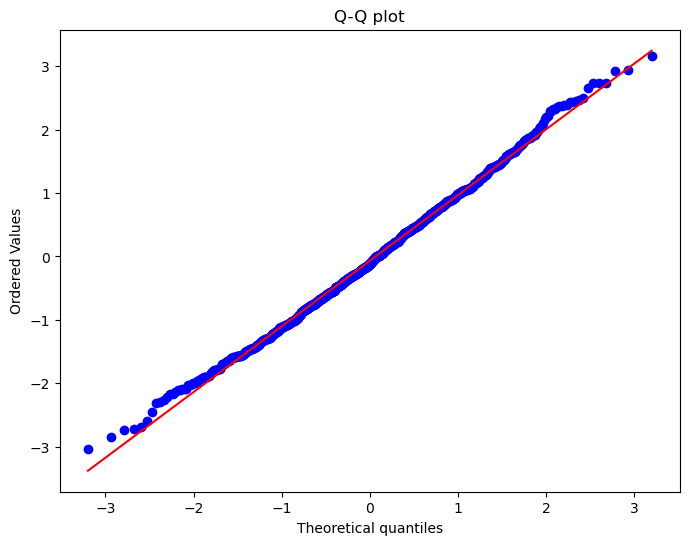

In [11]:
#This tells if we had normal distribution or not if the p value is less than 0.05 the null hypothesis is rejected 
#telling that the data is normally distributed
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Generate some example data (replace this with your actual data)
data = np.random.normal(loc=0, scale=1, size=1000)
# Shapiro-Wilk test for normality
stat, p = stats.shapiro(data)
print("Shapiro-Wilk test p-value:", p)
# Visualization: Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
# Impute missing values for numerical features using mean
numerical_features = df.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')  # Use 'mean' for mean imputation
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [13]:
df.isnull().sum()

Age                                       0
Sex                                       0
wearables                                 0
Duration                                  0
onlineplatforms                           0
Nature                                    0
screenillumination                        0
workingyears                              0
hoursspentdailycurricular                 0
hoursspentdailynoncurricular              0
Gadgetsused                               0
levelofgadjetwithrespecttoeyes            0
Distancekeptbetweeneyesandgadjet          0
Avgnighttimeusageperday                   0
Blinkingduringscreenusage                 0
Difficultyinfocusingafterusingscreens     0
freqquencyofcomplaints                    0
Severityofcomplaints                      0
RVIS                                      0
Ocularsymptomsobservedlately              0
Symptomsobservingatleasthalfofthetimes    0
Complaintsfrequency                       0
frequencyofdryeyes              

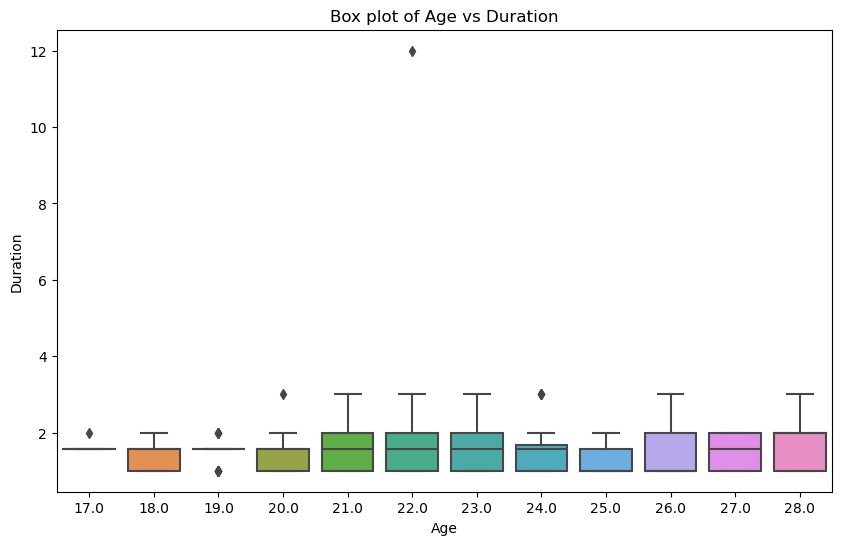

In [14]:
# Box plot for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Duration', data=df)
plt.title('Box plot of Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

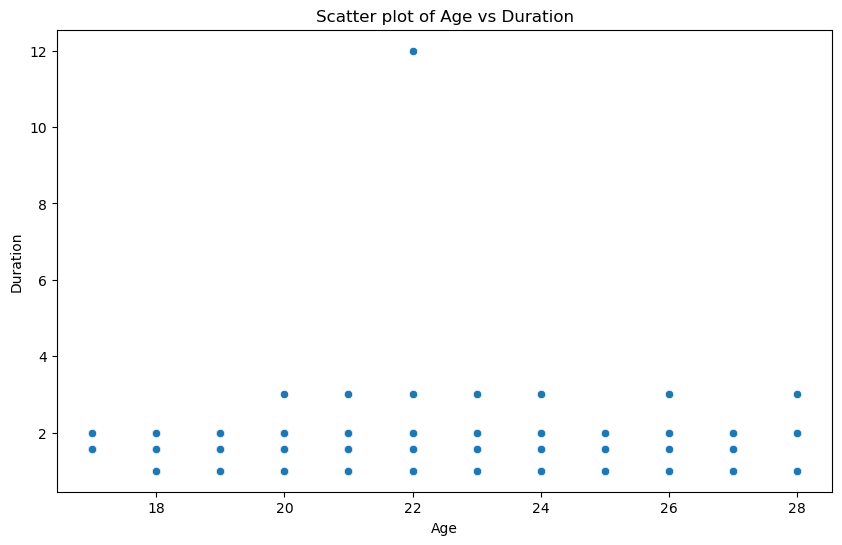

In [15]:
# Scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Duration', data=df)
plt.title('Scatter plot of Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

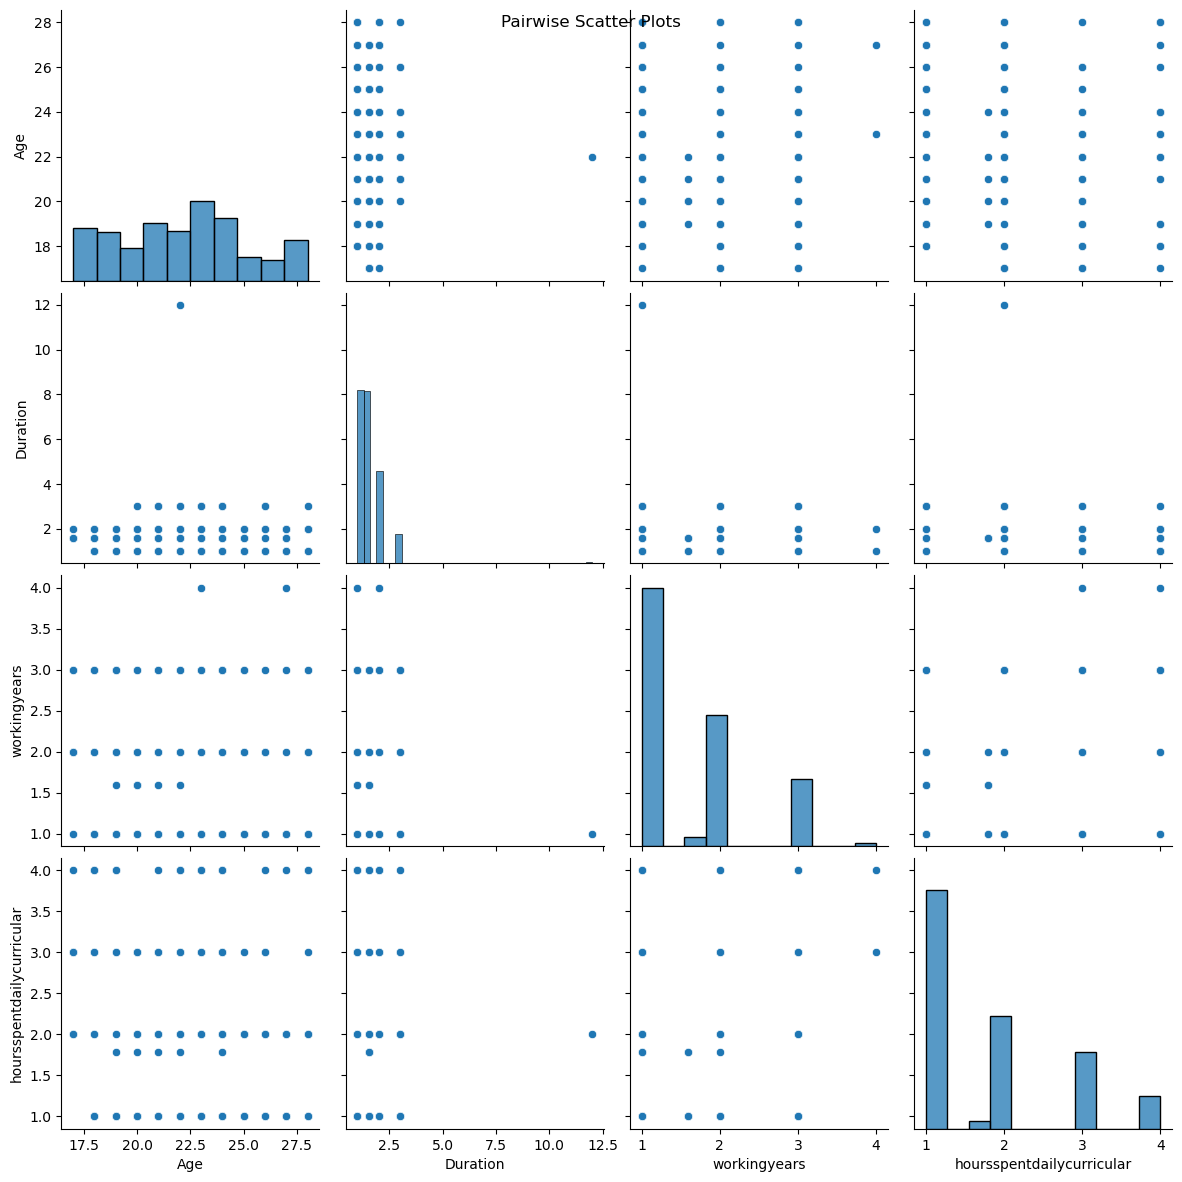

In [16]:
# Pairplot for multiple numerical variables with adjusted figure size
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Age', 'Duration', 'workingyears', 'hoursspentdailycurricular']], height=3)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

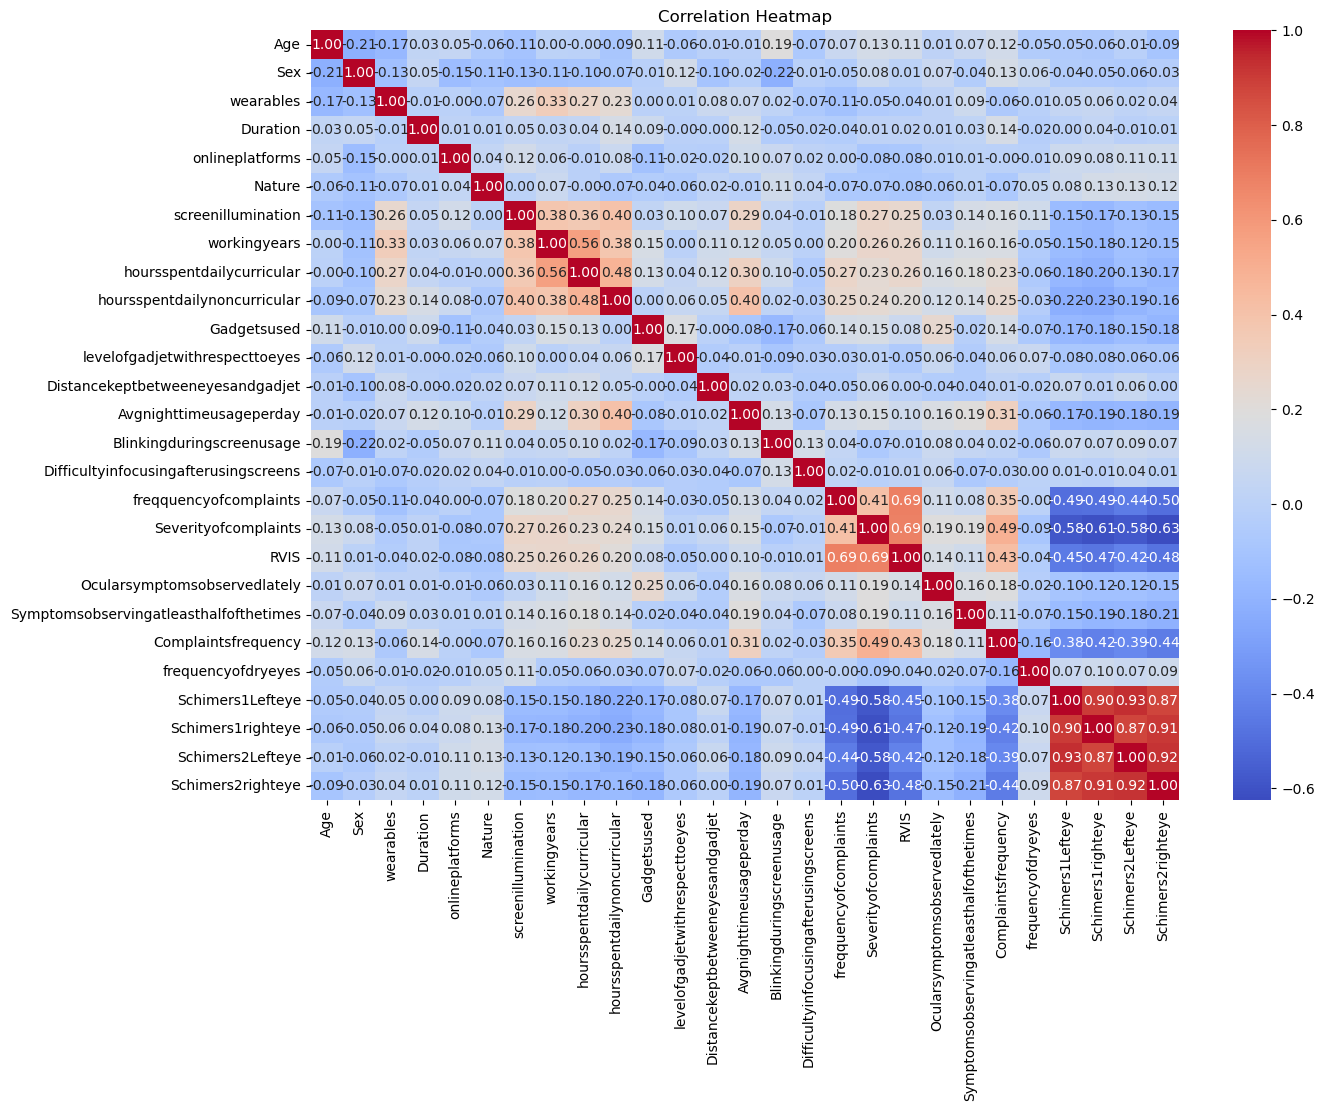

In [17]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
# Compute correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()
# Correlation heatmap for numeric columns
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

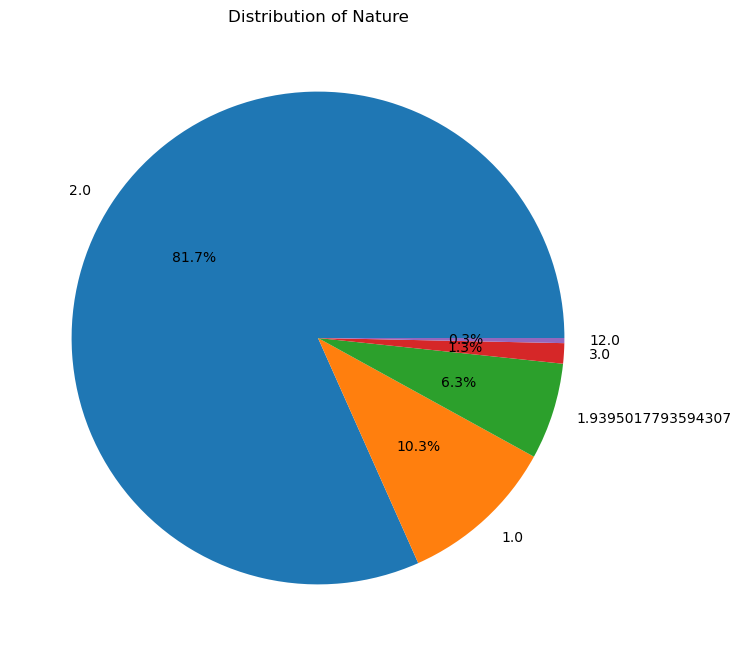

In [18]:
# Pie chart for categorical variable
plt.figure(figsize=(8, 8))
df['Nature'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Nature')
plt.ylabel('')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

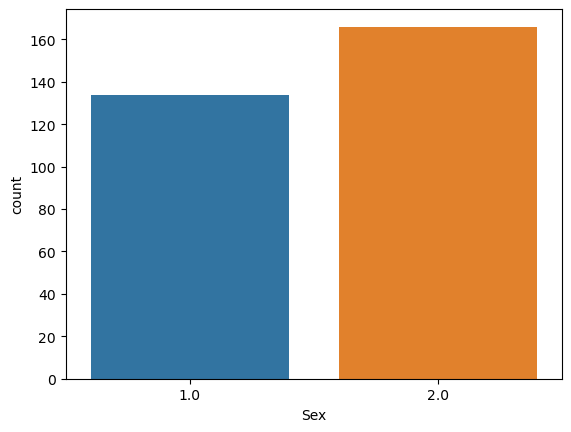

In [19]:
#  Explore gender distribution
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Duration', ylabel='Count'>

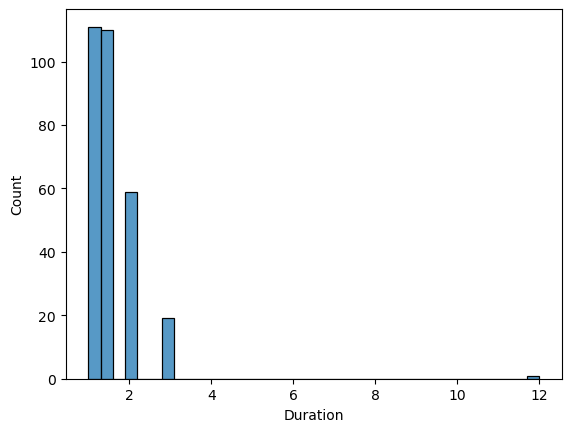

In [20]:
# Analyze screen usage duration
sns.histplot(x='Duration', data=df)

<Axes: xlabel='Nature', ylabel='hoursspentdailynoncurricular'>

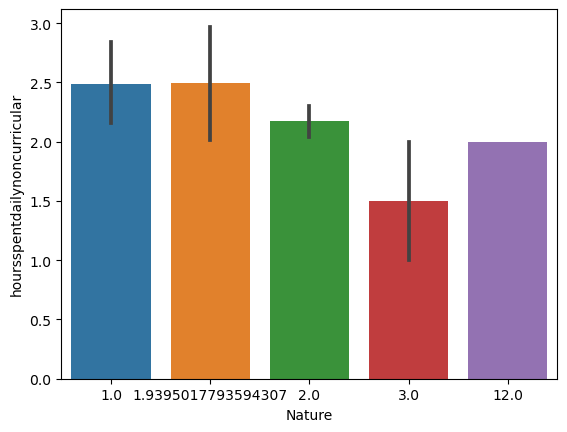

In [21]:
# Investigate screen usage by activity type
sns.barplot(x='Nature', y='hoursspentdailynoncurricular', data=df)

<Axes: xlabel='screenillumination', ylabel='frequencyofdryeyes'>

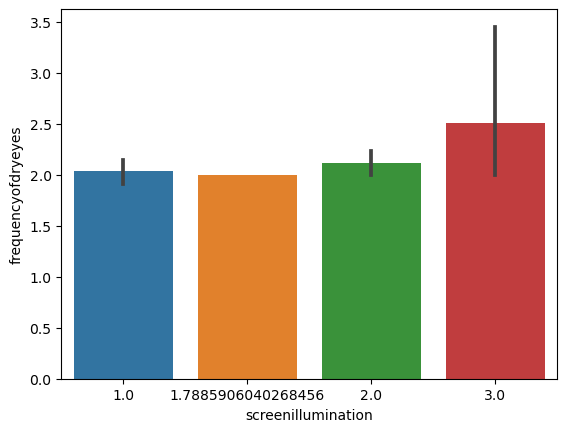

In [22]:
# Correlate screen illumination with dry eye complaints
sns.barplot(x='screenillumination', y='frequencyofdryeyes',data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers1Lefteye'>

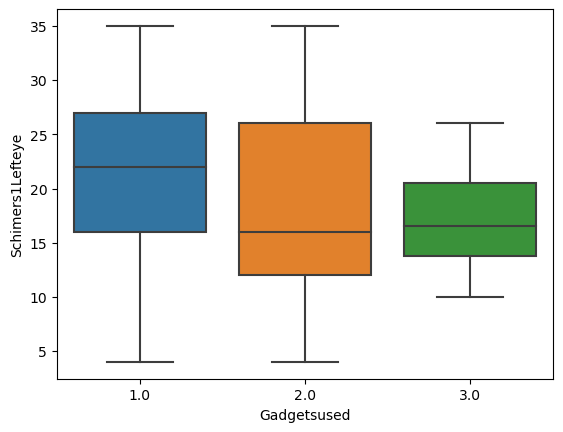

In [23]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers1Lefteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers2Lefteye'>

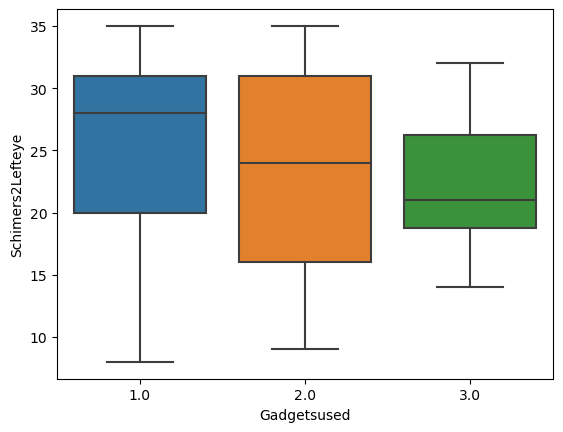

In [24]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers2Lefteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers1righteye'>

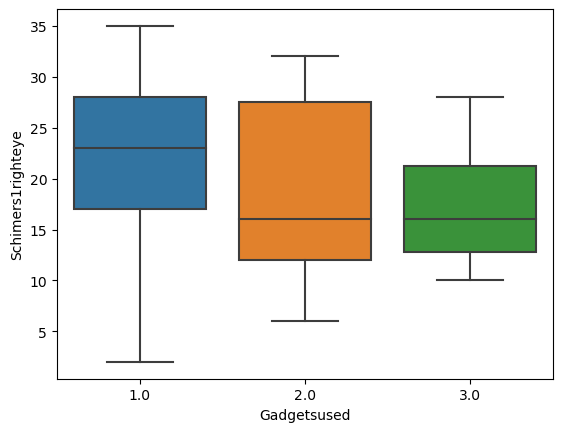

In [25]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers1righteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers2righteye'>

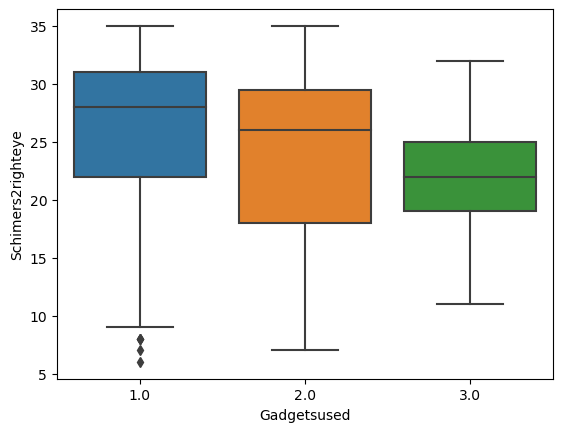

In [26]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers2righteye', data=df)

In [27]:
# Histograms for numerical variables
numerical_columns = ['Age', 'Duration', 'workingyears', 'hoursspentdailycurricular', 
                     'hoursspentdailynoncurricular', 'Avgnighttimeusageperday', 'Blinkingduringscreenusage', 
                     'Difficultyinfocusingafterusingscreens', 'freqquencyofcomplaints', 'Severityofcomplaints', 
                     'RVIS', 'frequencyofdryeyes', 'Schimers1Lefteye', 'Schimers1righteye', 
                     'Schimers2Lefteye', 'Schimers2righteye']
categorical_columns = ['Sex', 'wearables', 'onlineplatforms', 'Nature', 'Gadgetsused']

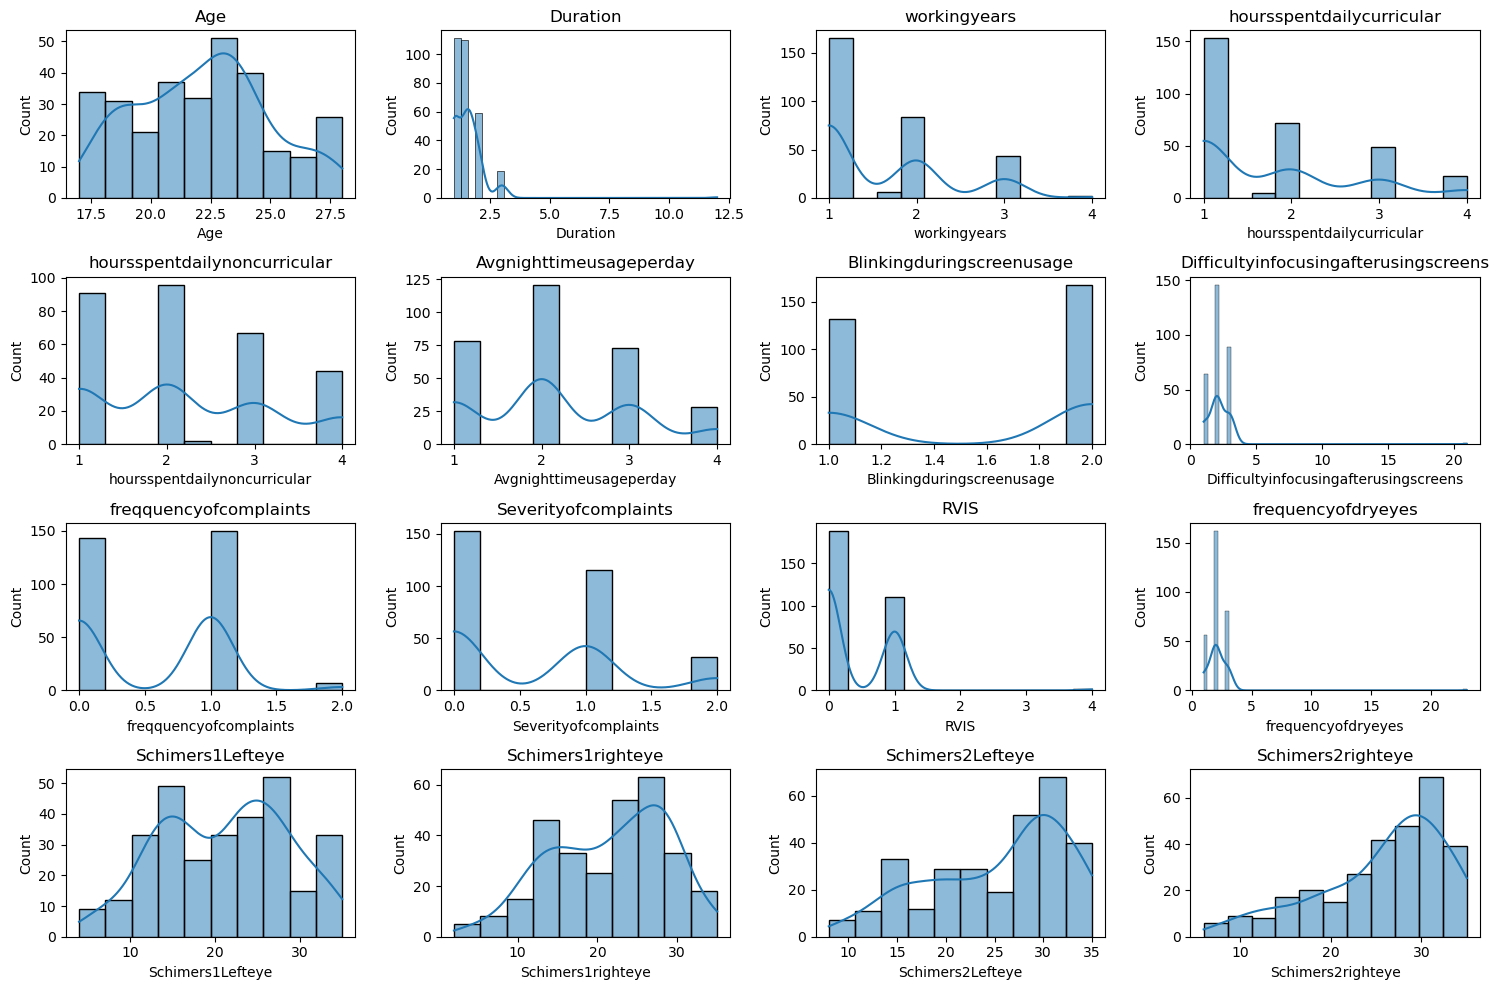

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

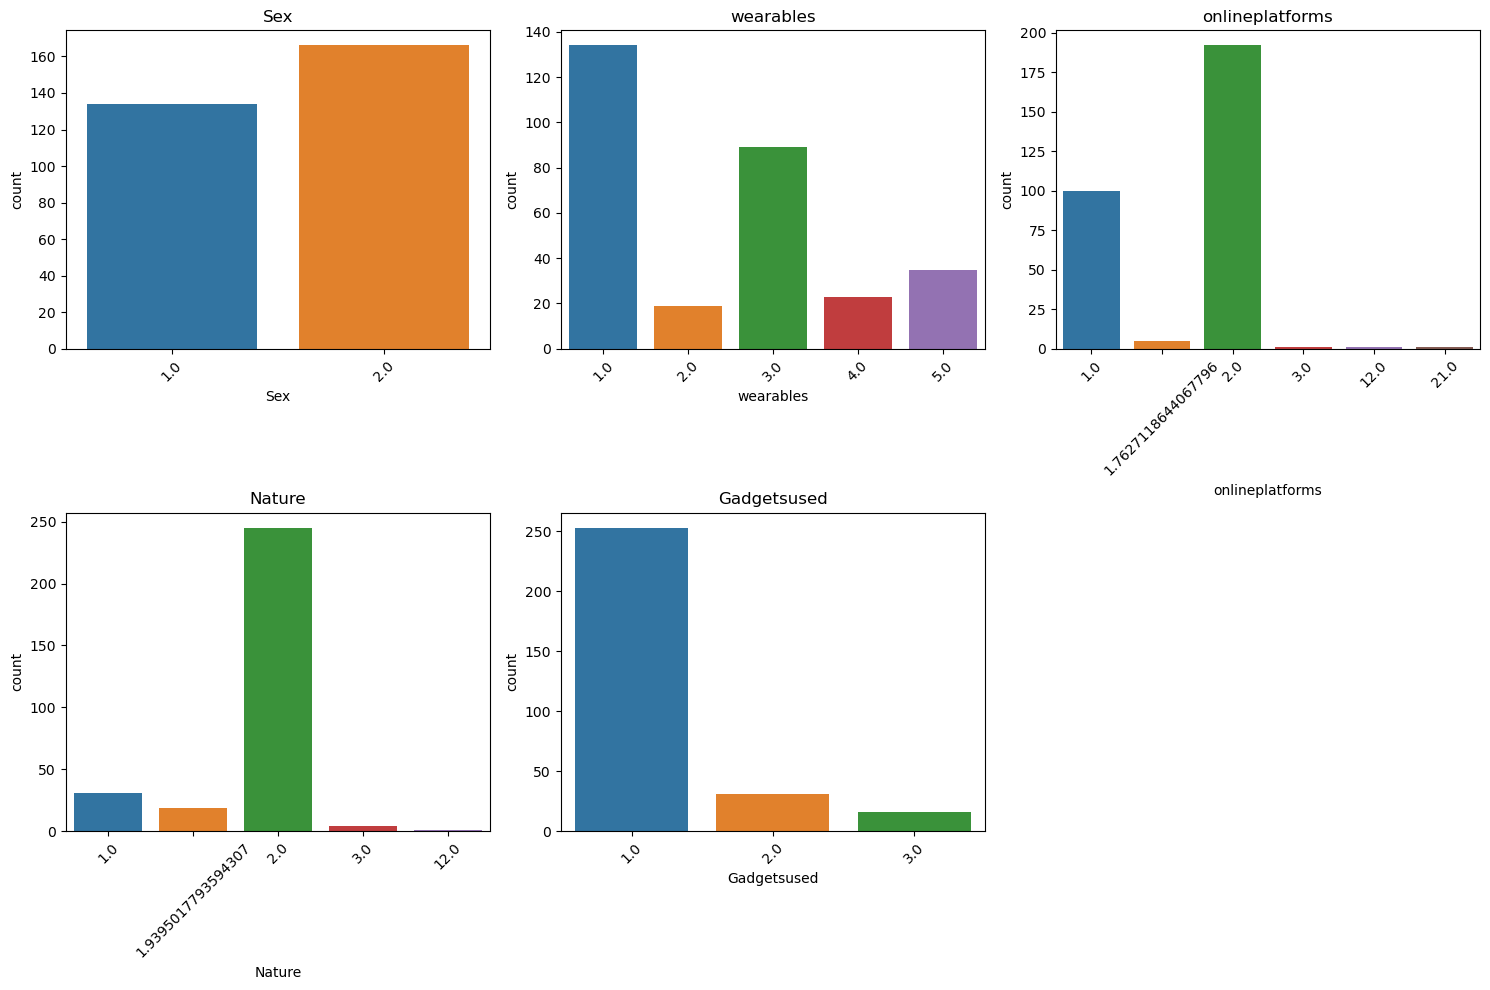

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

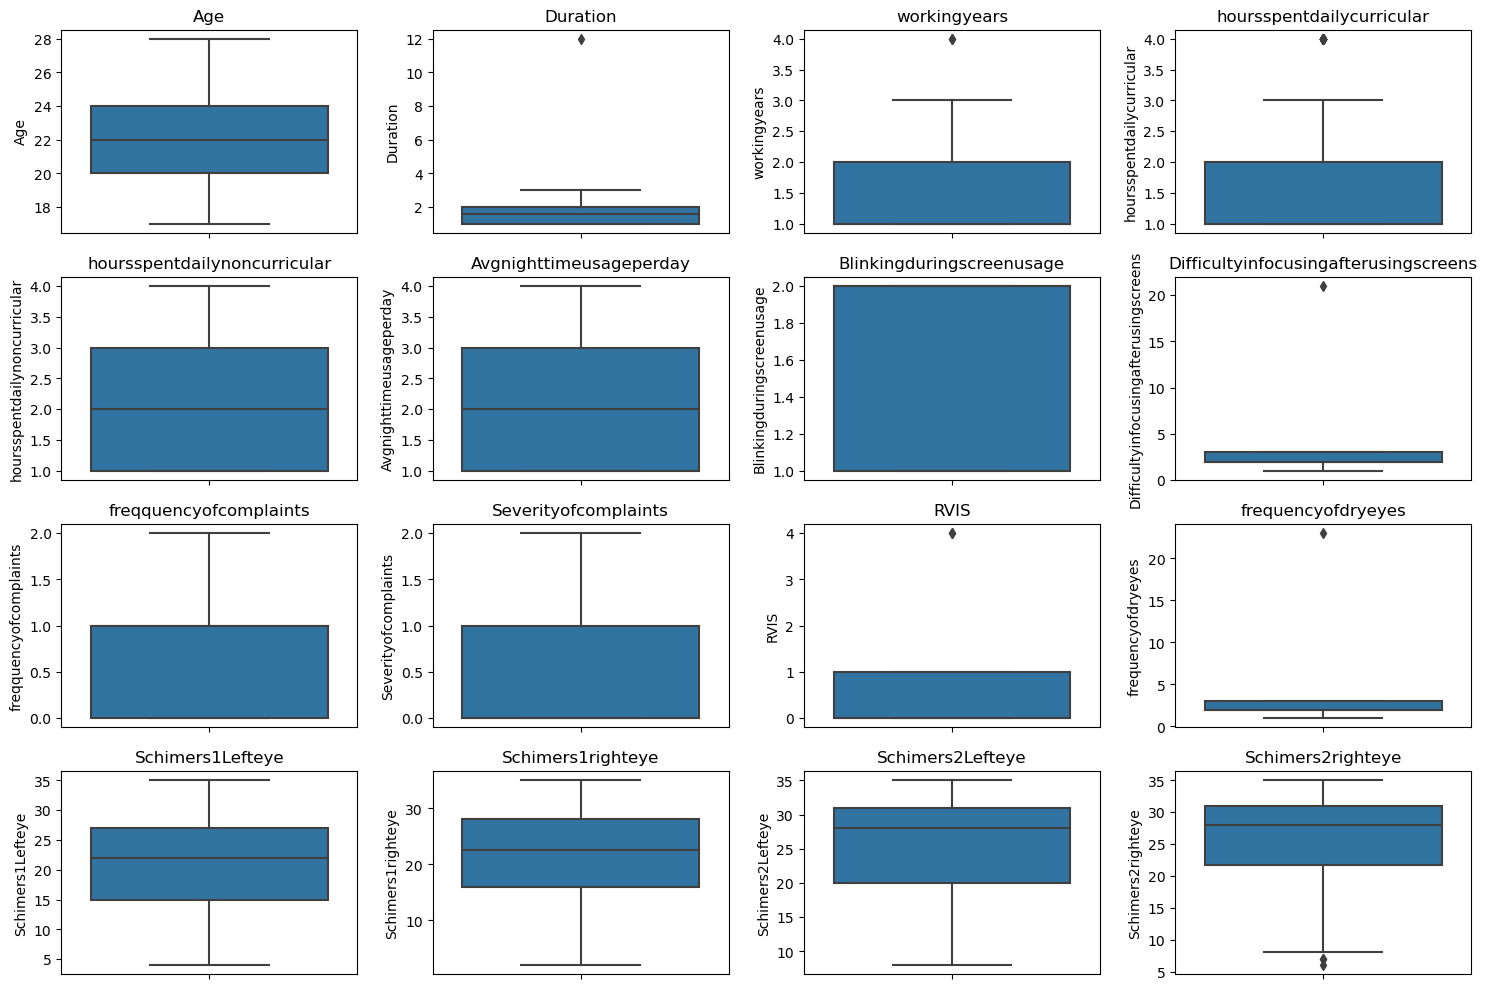

In [30]:
# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

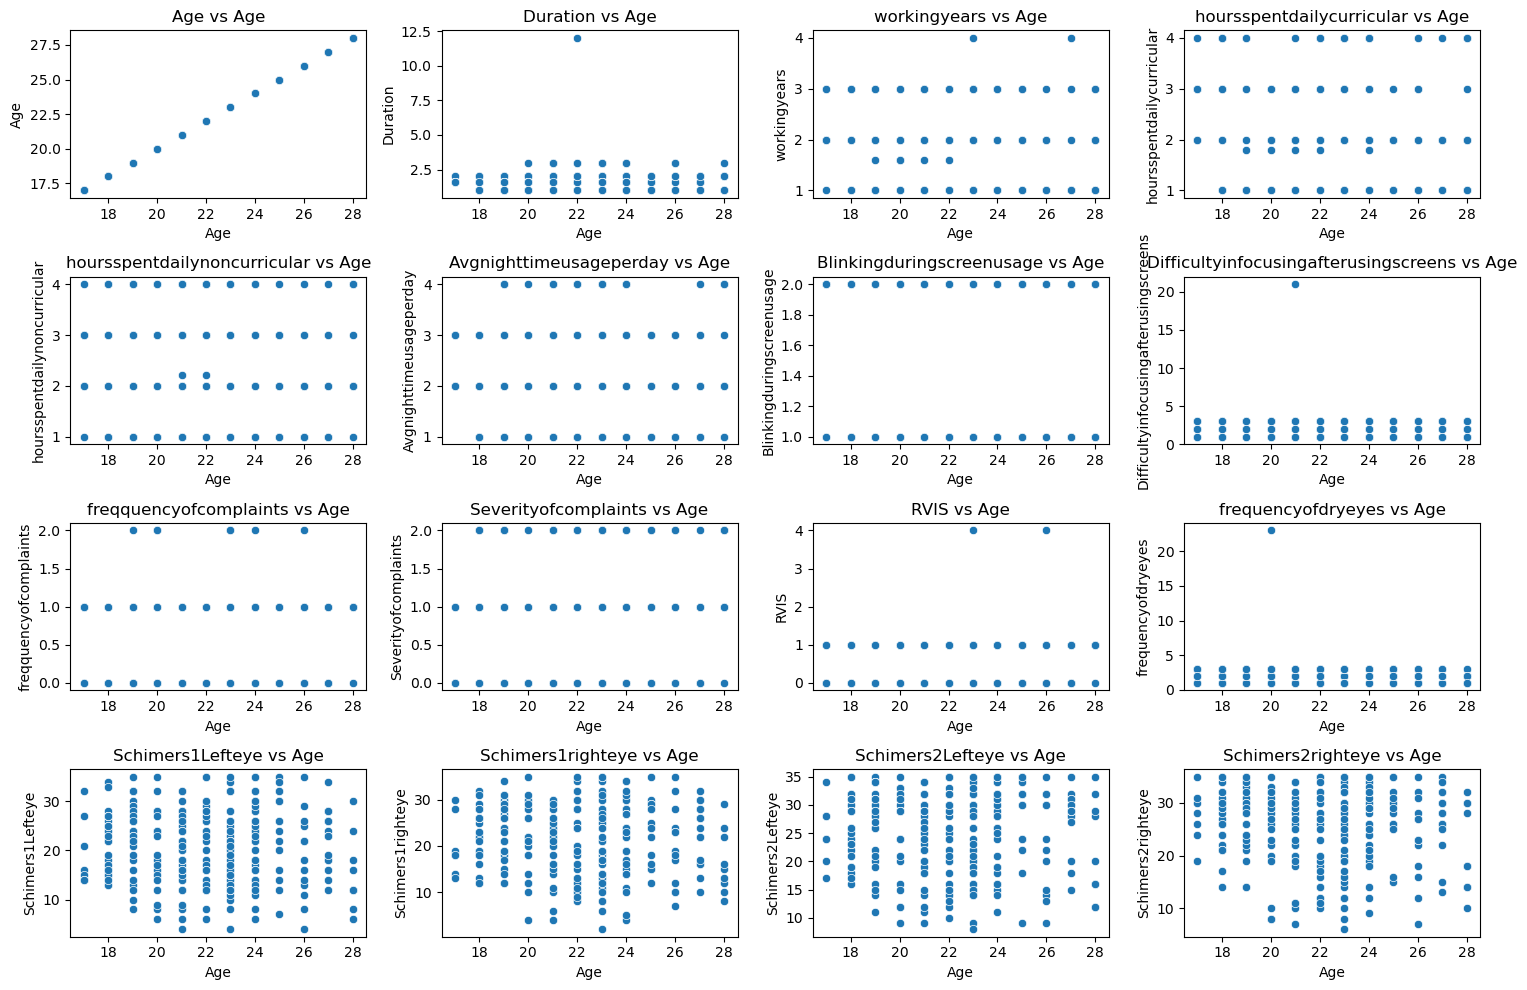

In [31]:
# Scatter plots for numerical variables against Age
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x='Age', y=col)
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()

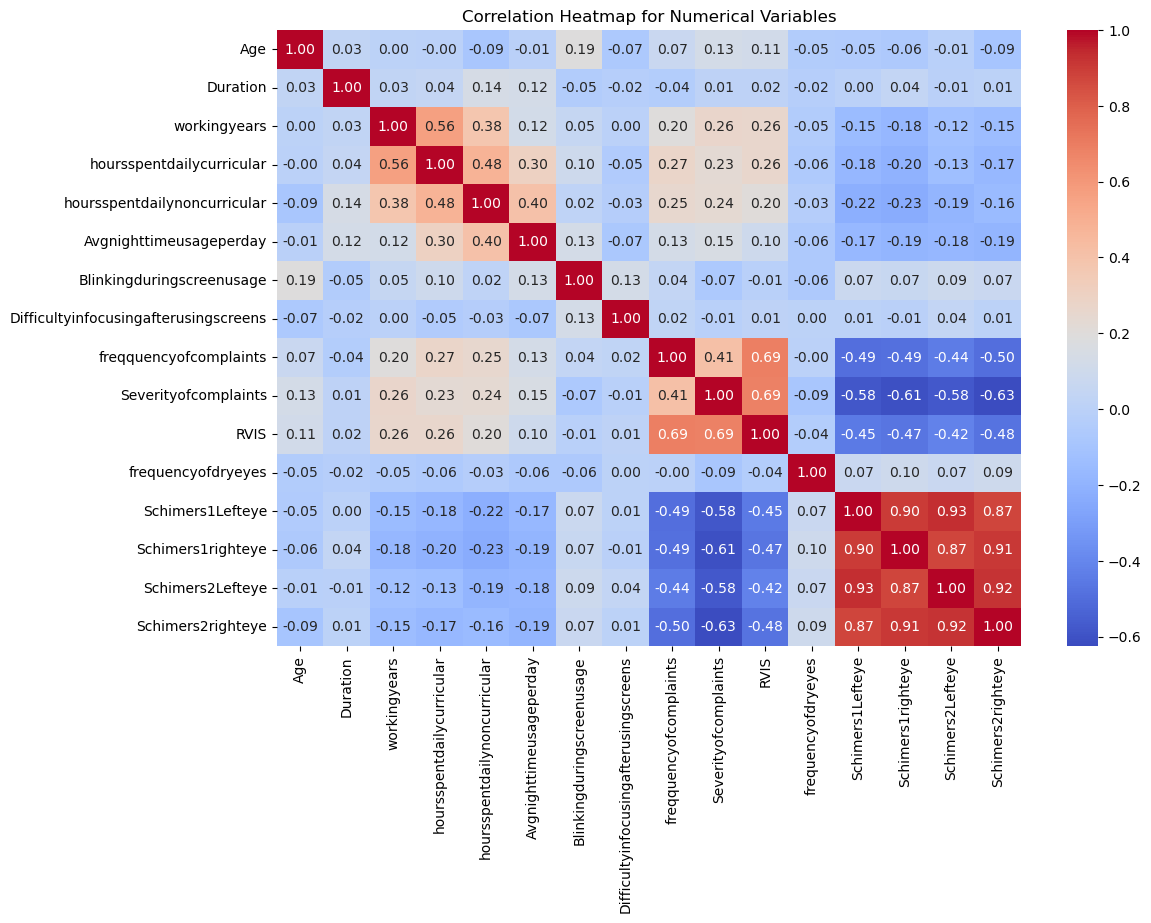

In [32]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

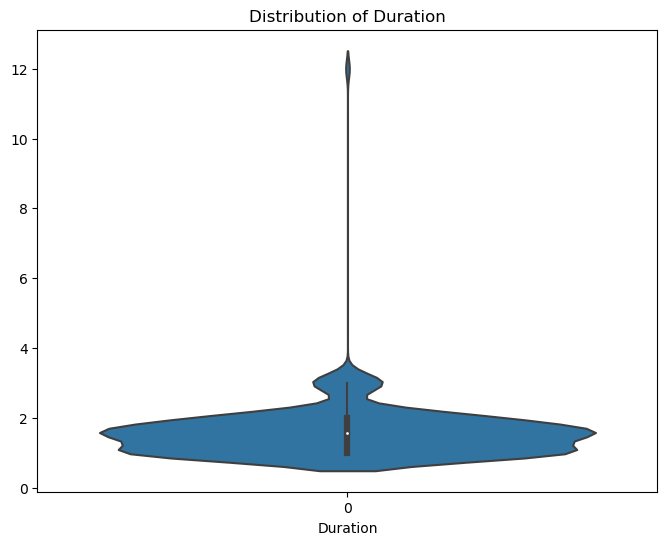

In [33]:
# Violin plot for Duration
plt.figure(figsize=(8, 6))
sns.violinplot(df['Duration'])
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.show()

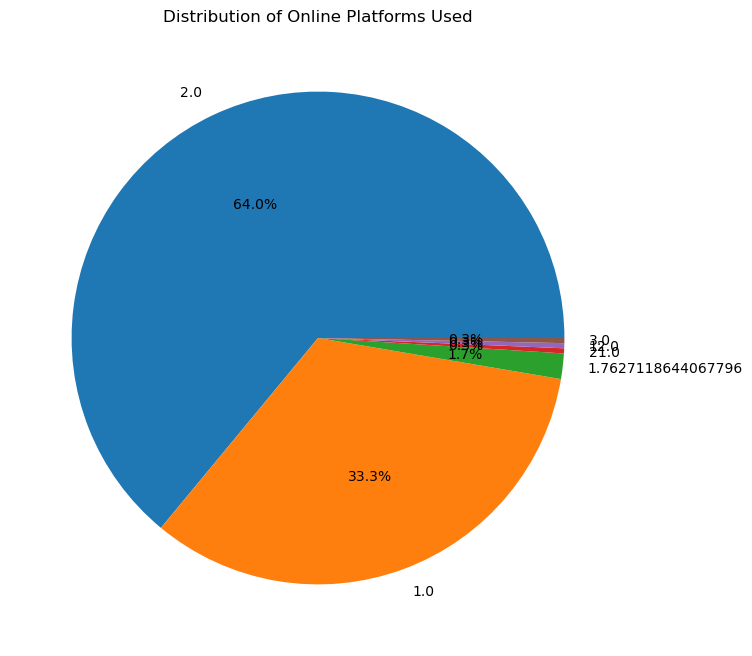

In [34]:
# Pie chart for onlineplatforms
plt.figure(figsize=(8, 8))
df['onlineplatforms'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Online Platforms Used')
plt.ylabel('')
plt.show()

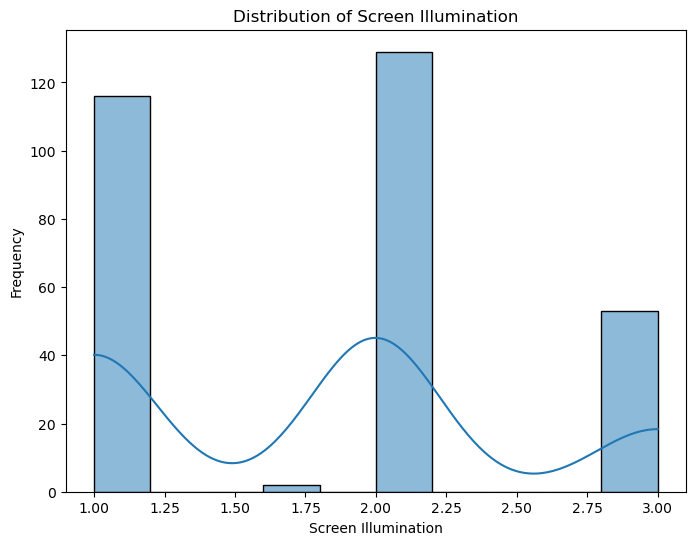

In [35]:
# Histogram for screenillumination
plt.figure(figsize=(8, 6))
sns.histplot(df['screenillumination'], kde=True)
plt.title('Distribution of Screen Illumination')
plt.xlabel('Screen Illumination')
plt.ylabel('Frequency')
plt.show()

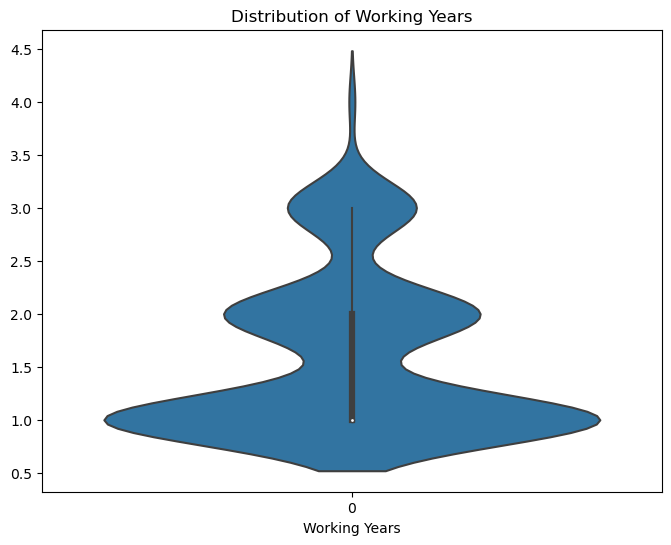

In [36]:
# Violin plot for workingyears
plt.figure(figsize=(8, 6))
sns.violinplot(df['workingyears'])
plt.title('Distribution of Working Years')
plt.xlabel('Working Years')
plt.show()

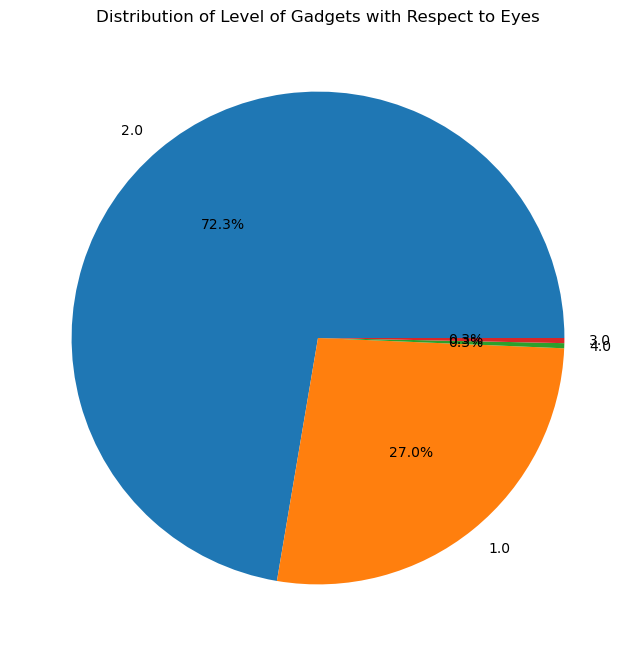

In [37]:
# Pie chart for level of gadget with respect to eyes
plt.figure(figsize=(8, 8))
df['levelofgadjetwithrespecttoeyes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Level of Gadgets with Respect to Eyes')
plt.ylabel('')
plt.show()

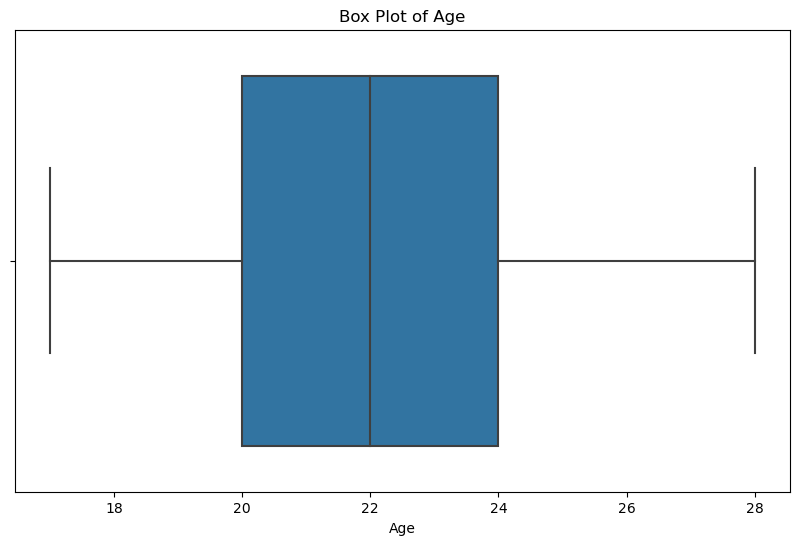

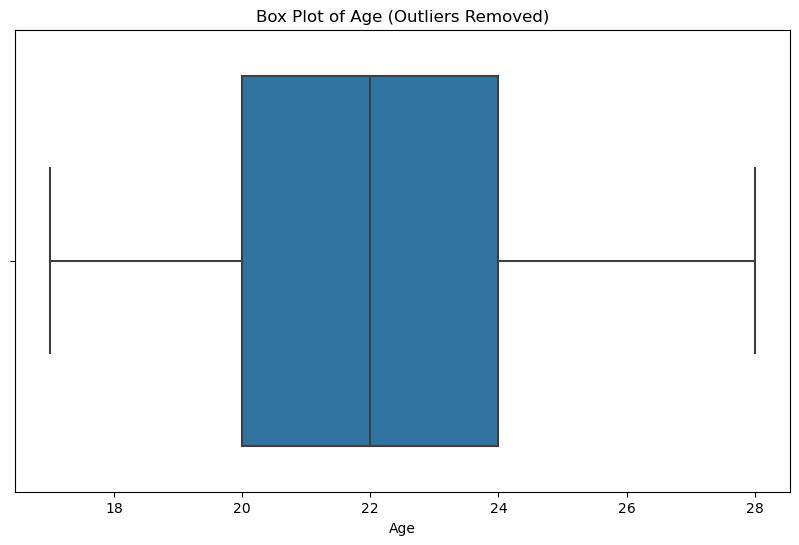

In [38]:
# Identify and visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

# Handle outliers by removing extreme values
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['Age'] >= Q1 - 1.5 * IQR) & (df['Age'] <= Q3 + 1.5 * IQR)]

# Visualize the distribution after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Age'])
plt.title('Box Plot of Age (Outliers Removed)')
plt.show()

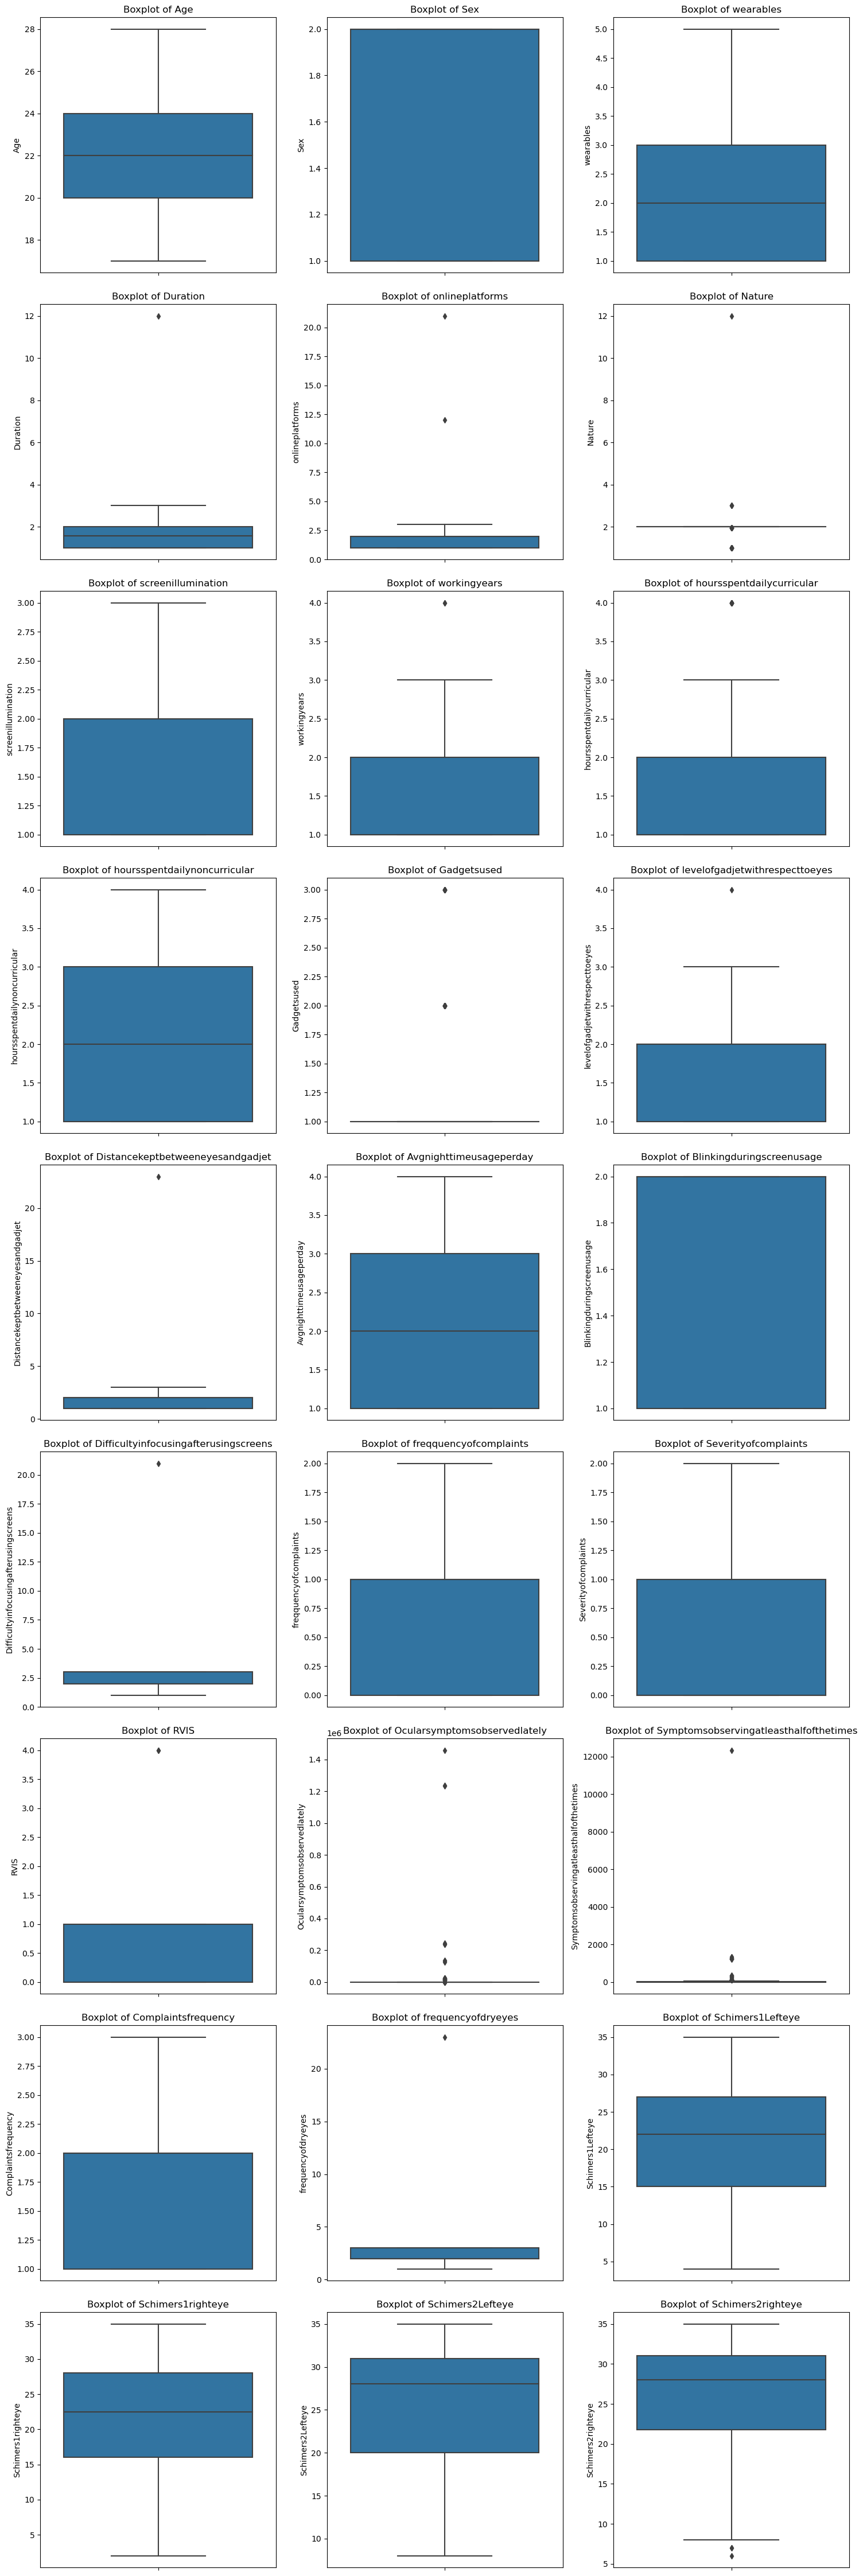

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division
# Create separate box plots for each numerical variable
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

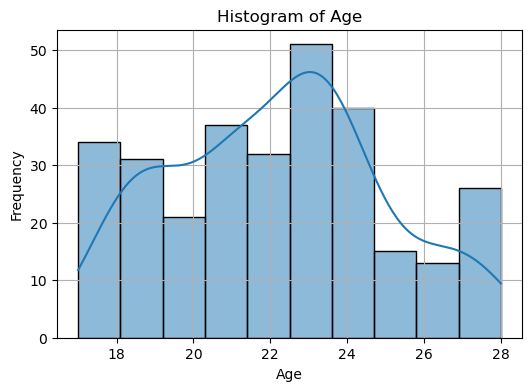

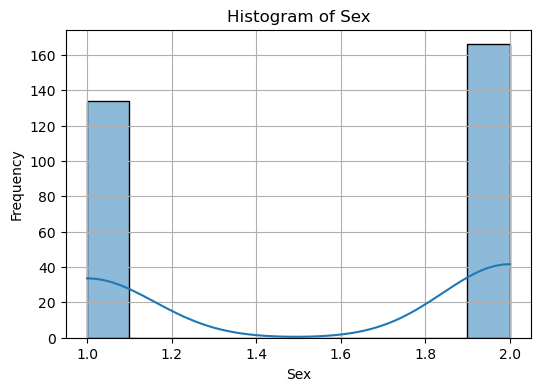

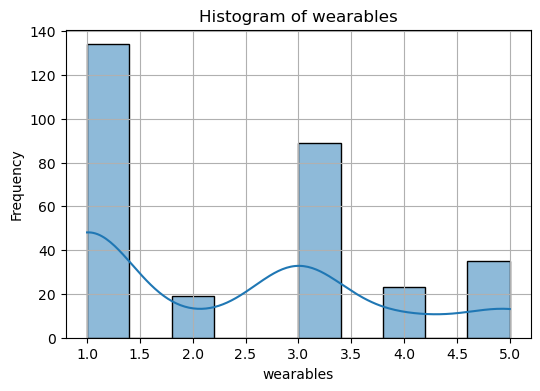

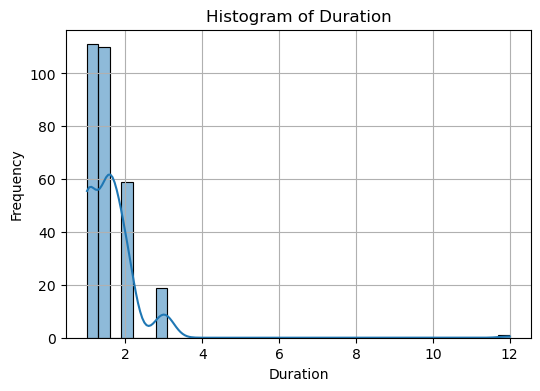

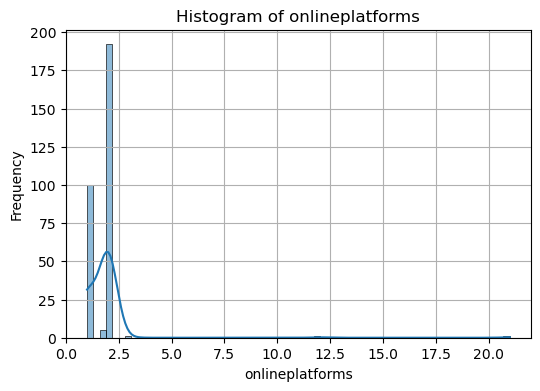

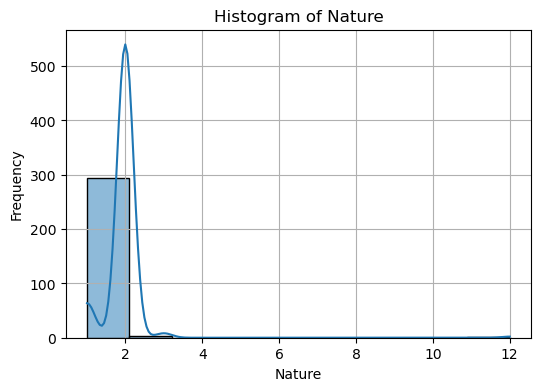

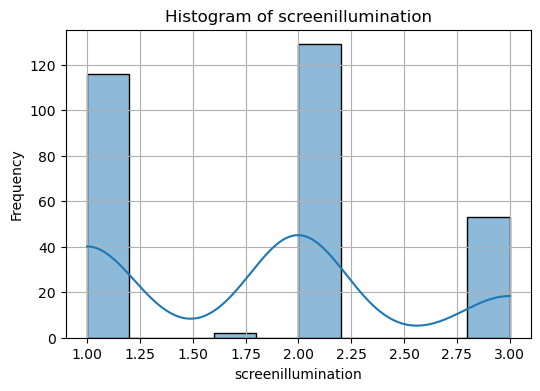

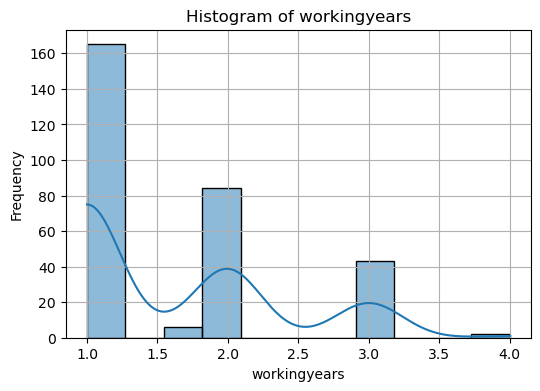

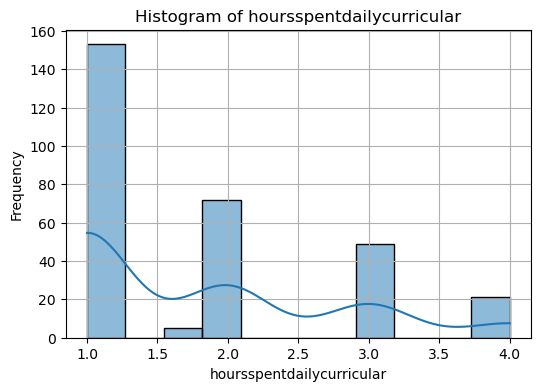

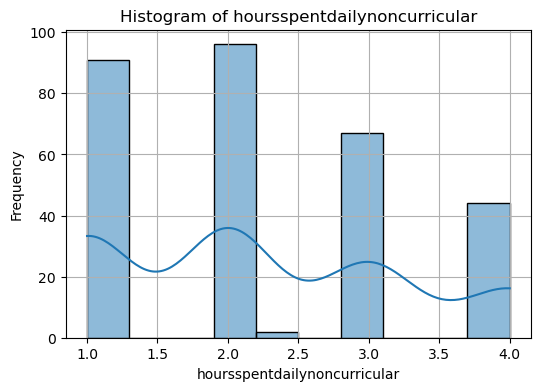

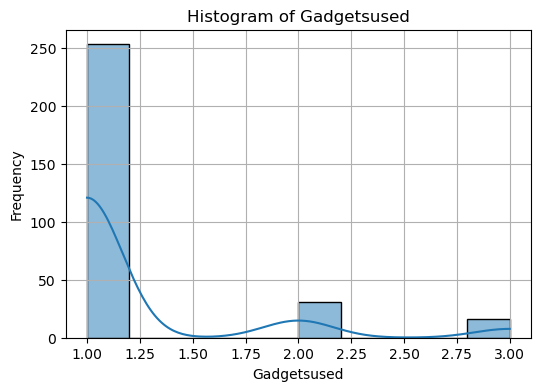

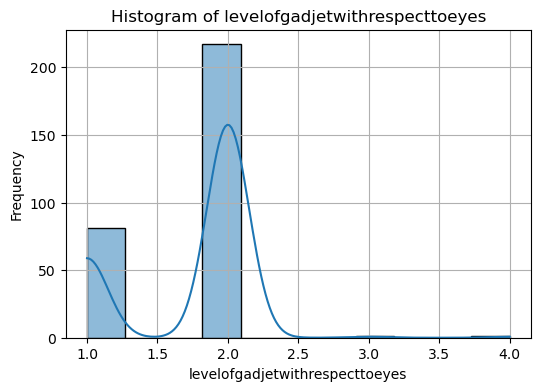

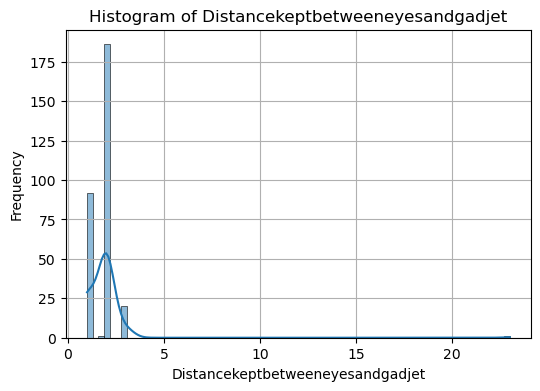

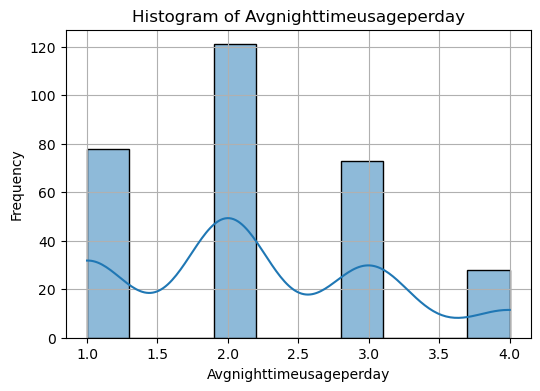

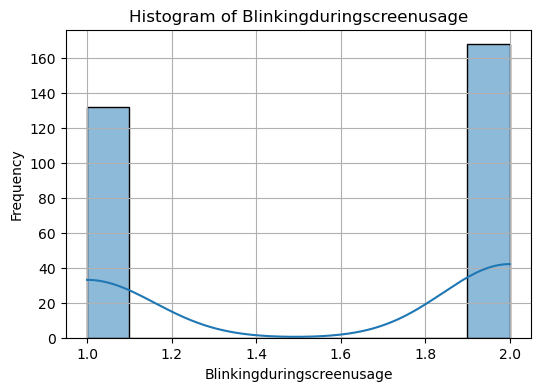

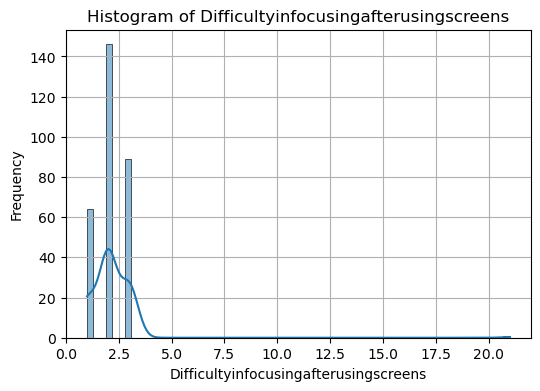

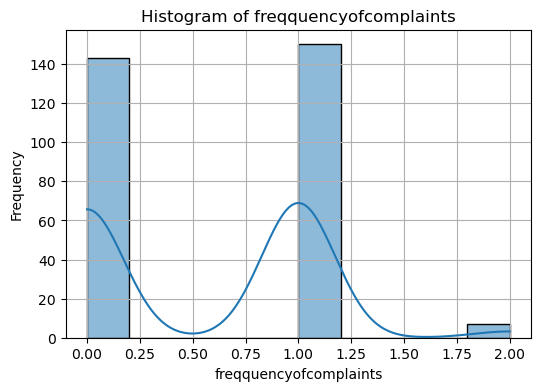

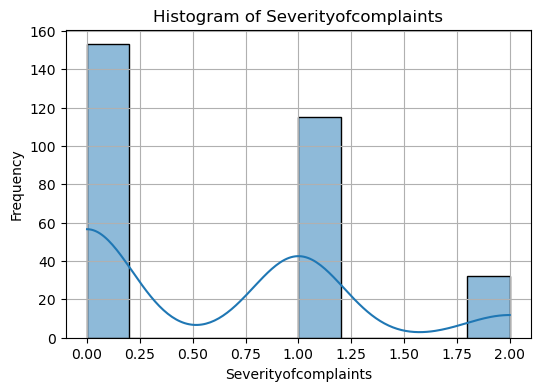

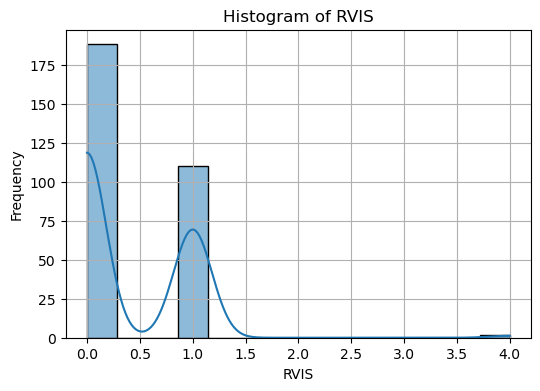

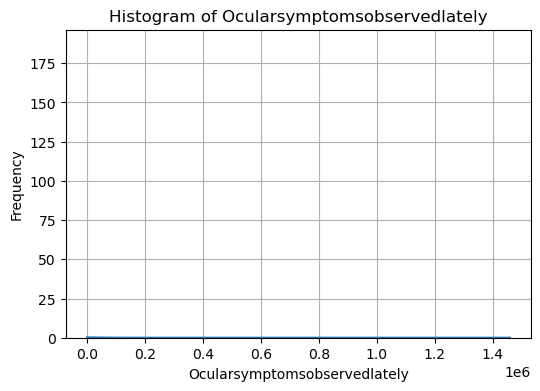

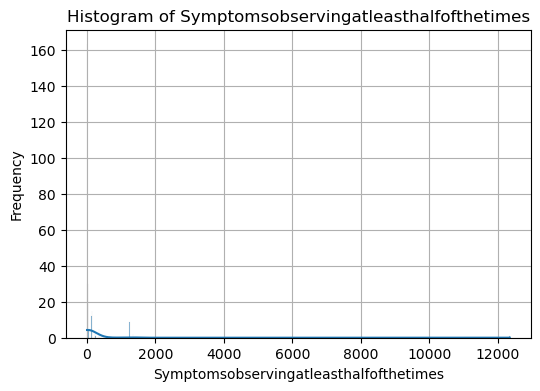

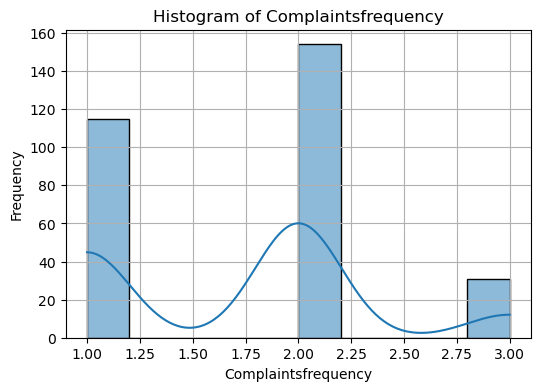

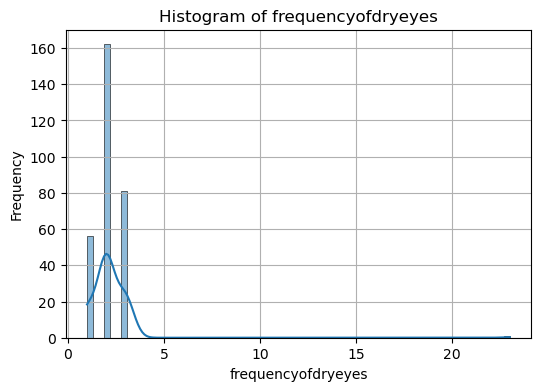

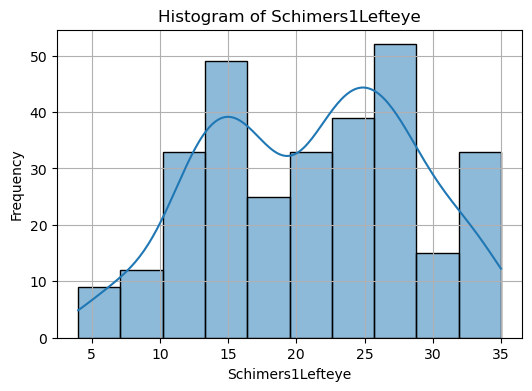

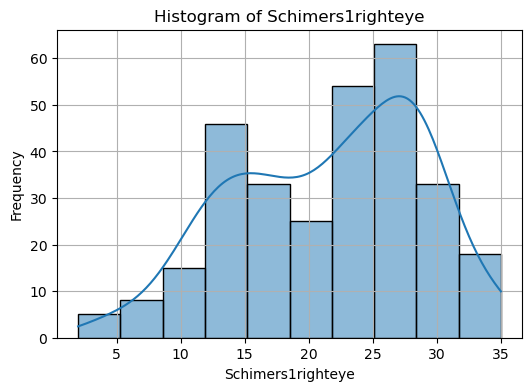

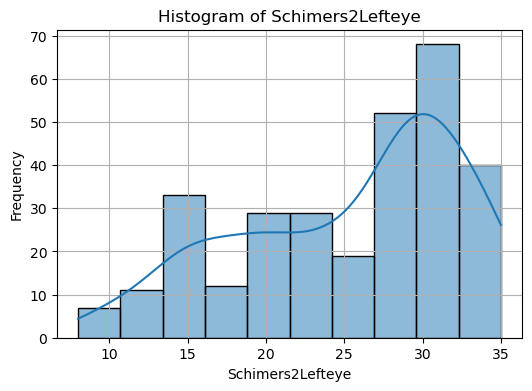

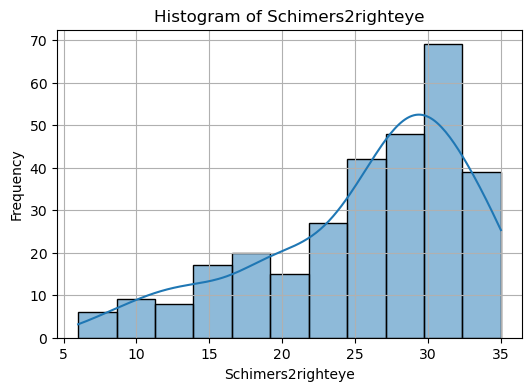

In [40]:
# Selecting only numerical columns for histogram
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Plotting histograms for each numerical variable separately
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

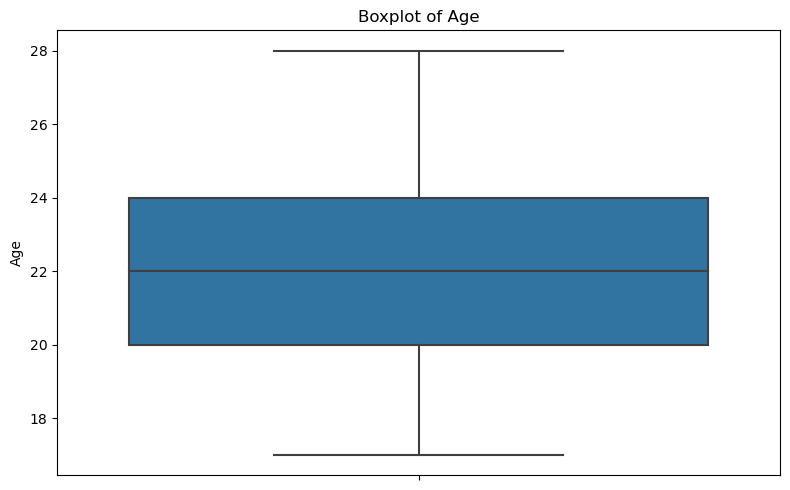

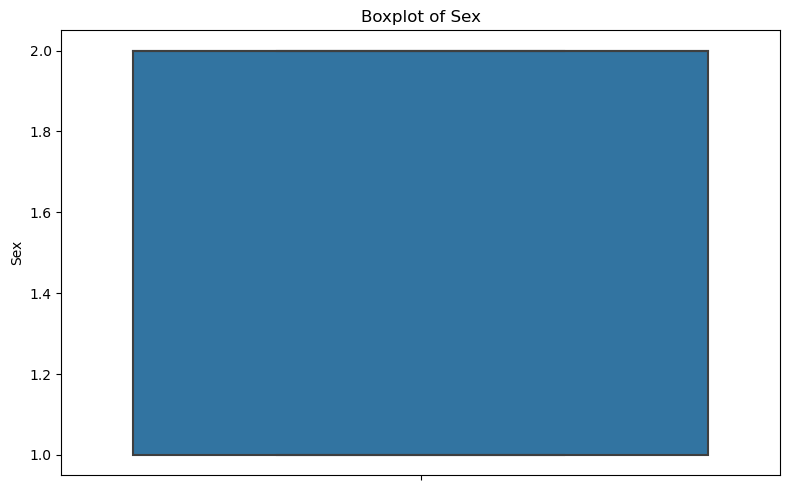

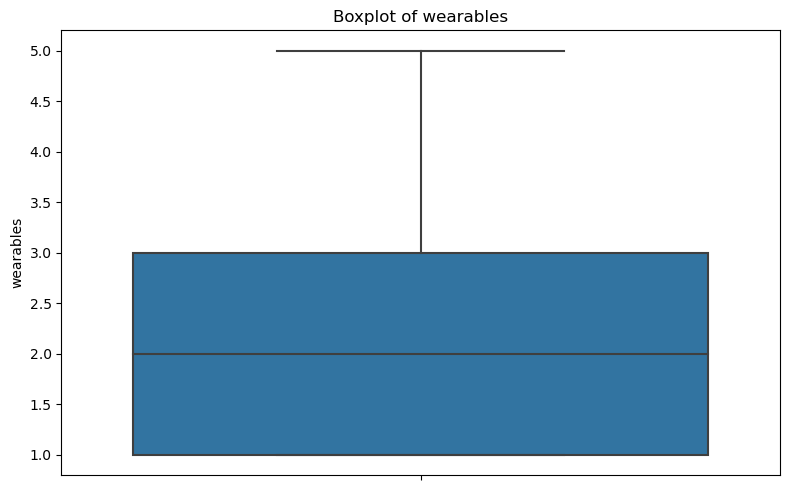

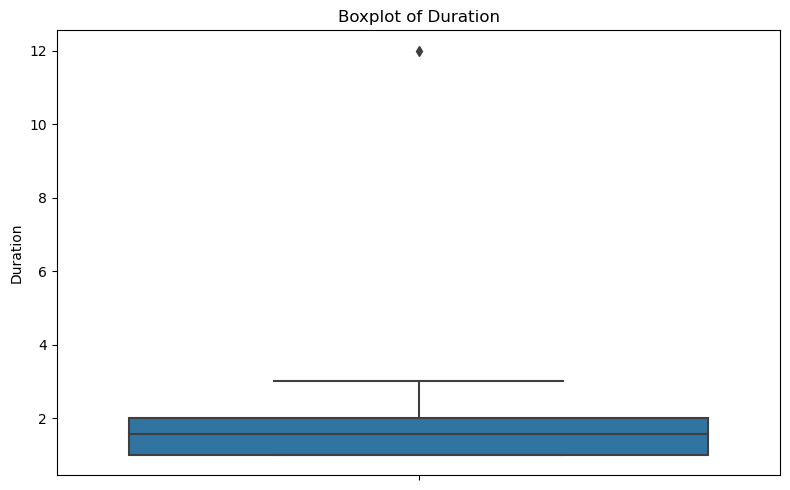

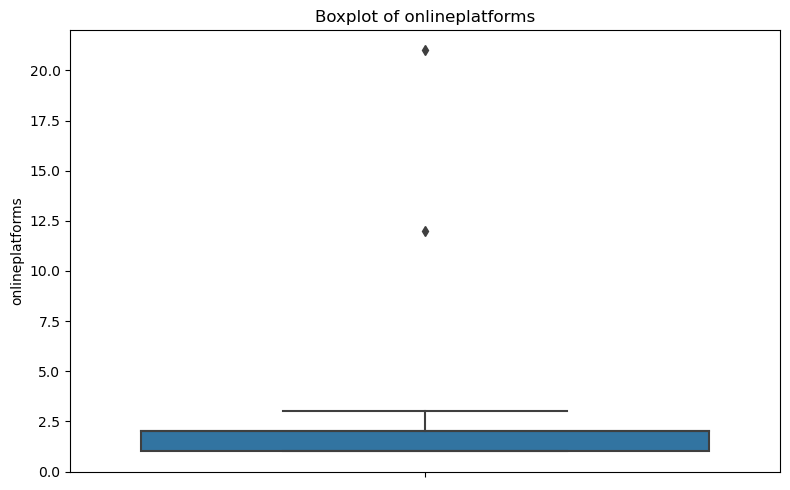

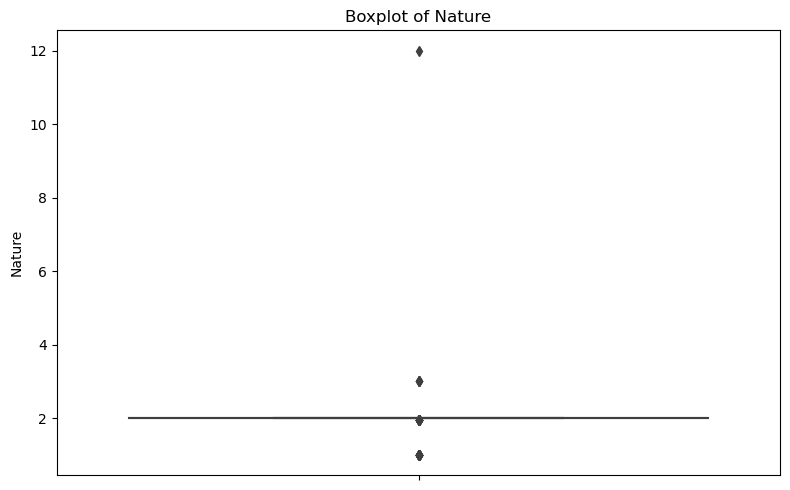

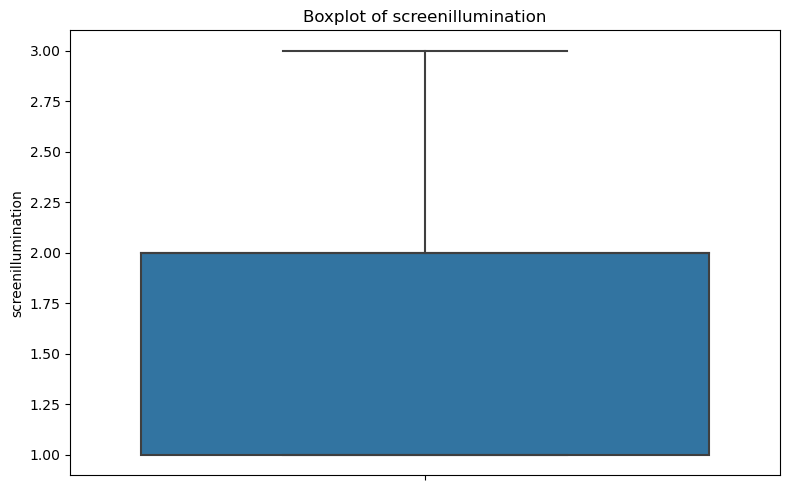

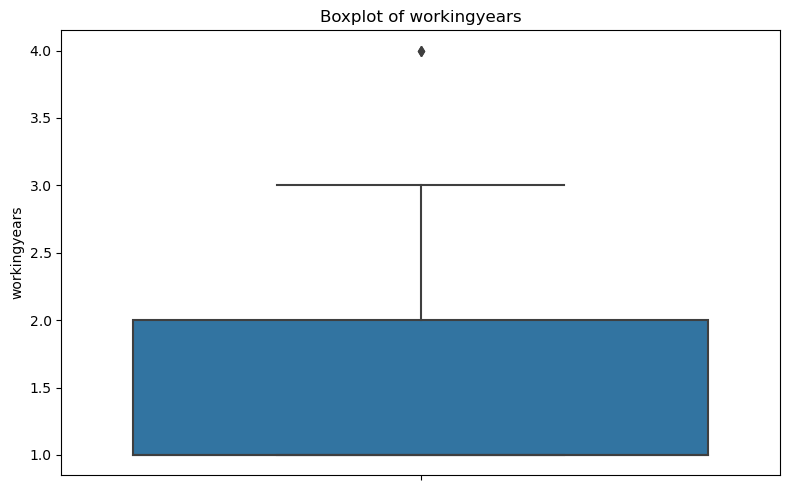

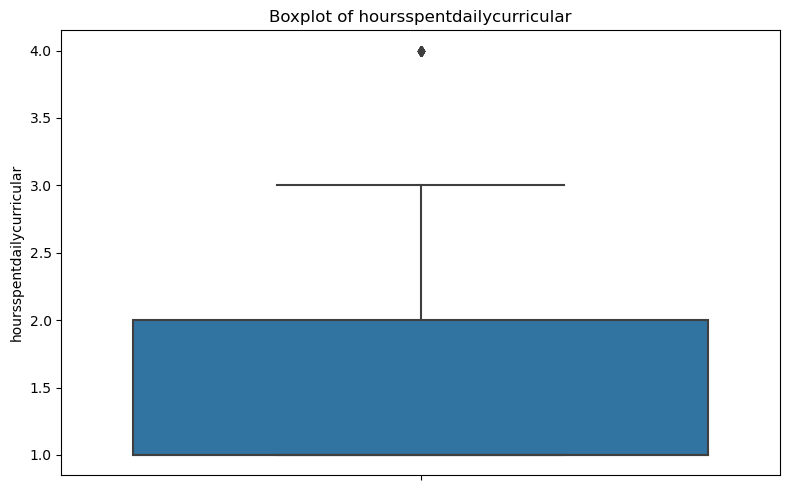

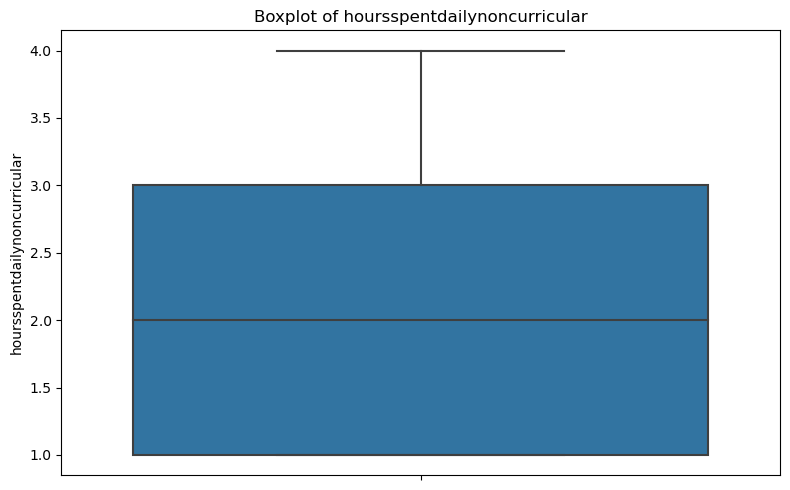

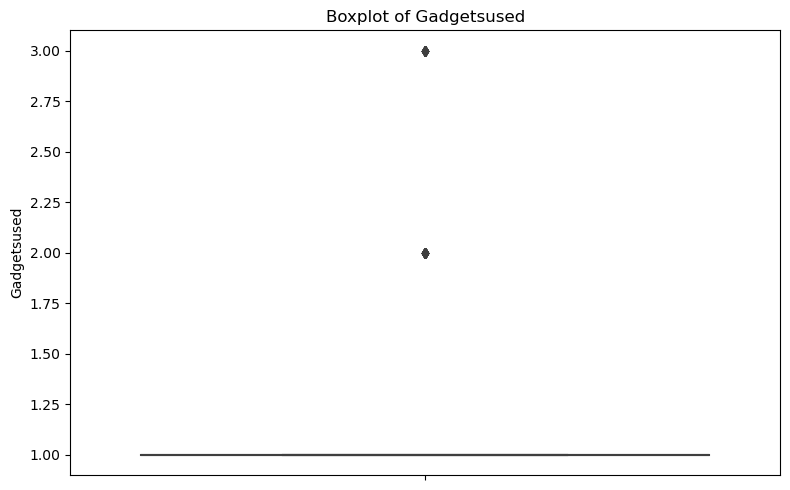

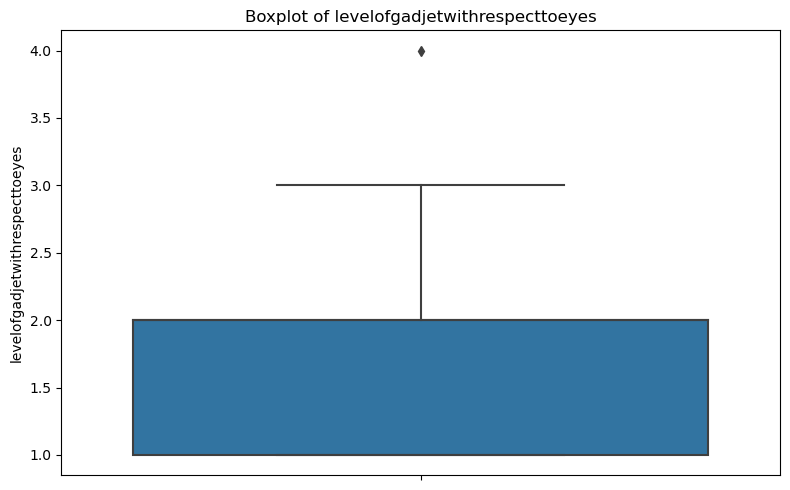

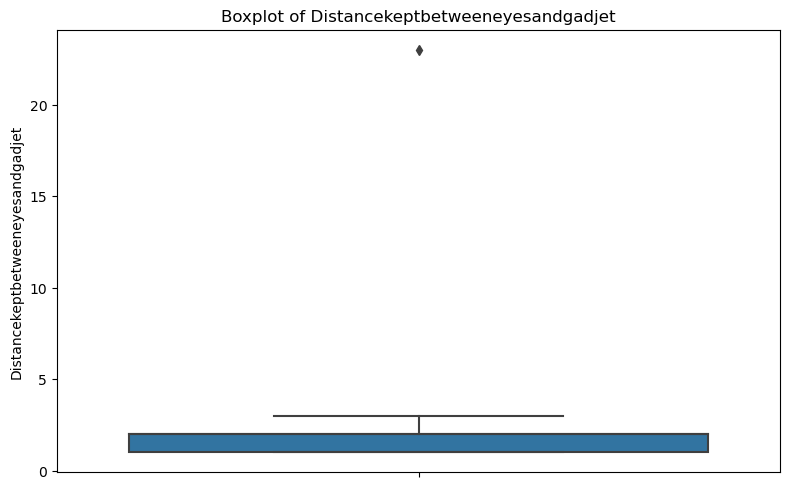

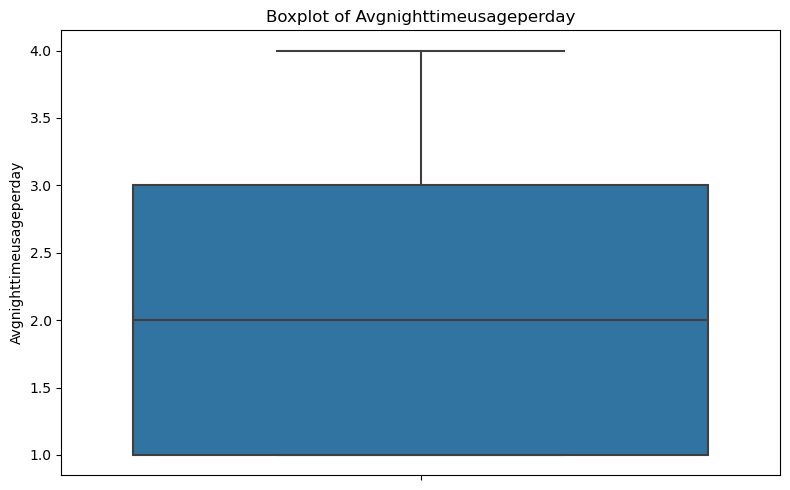

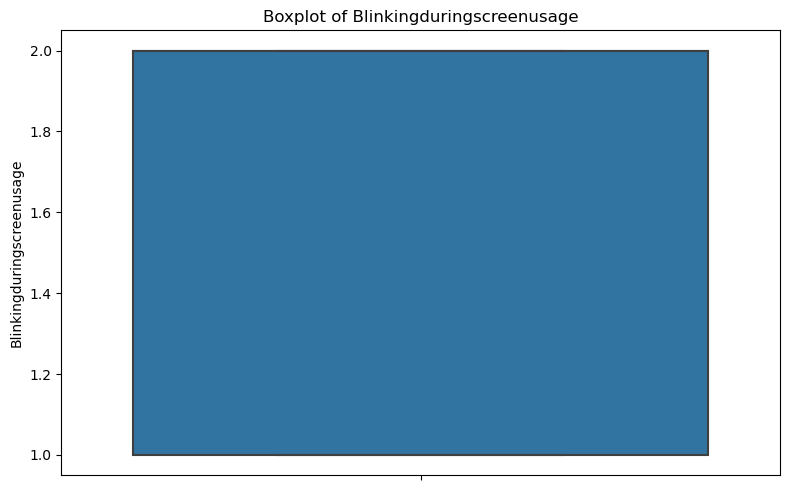

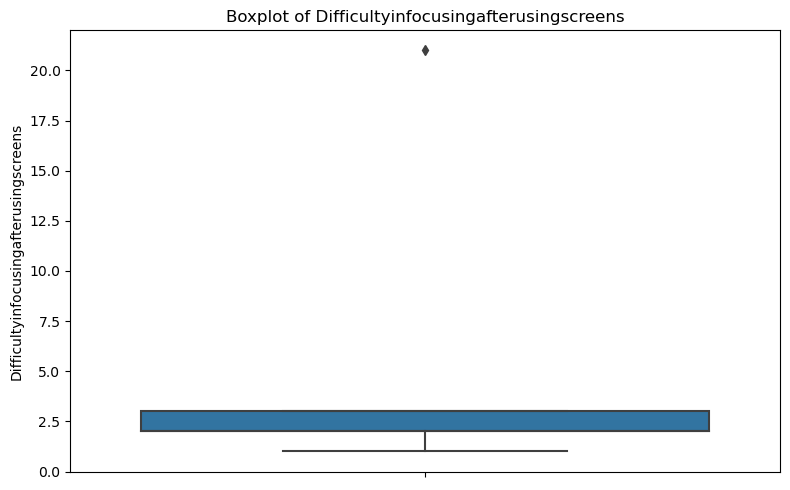

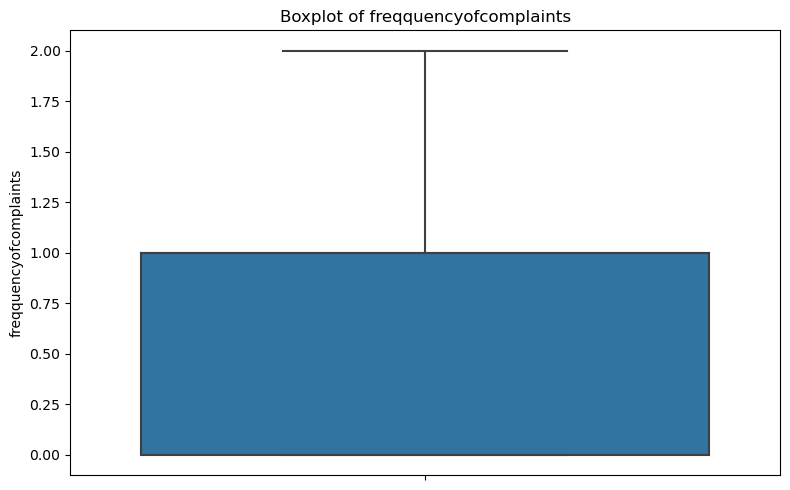

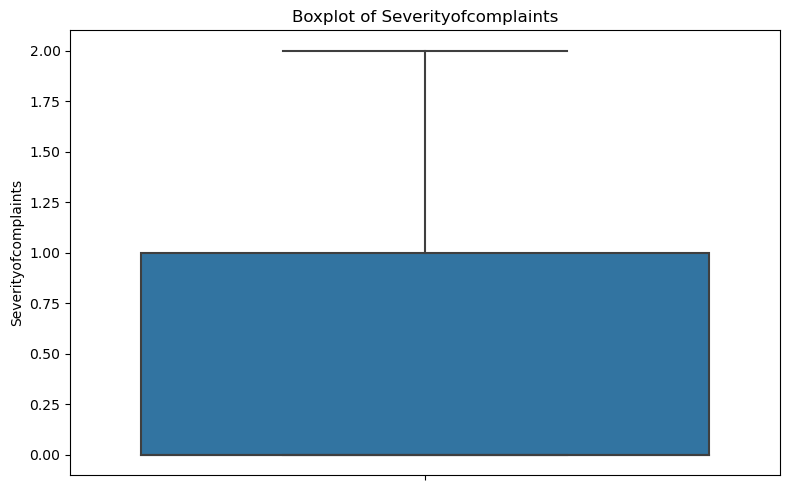

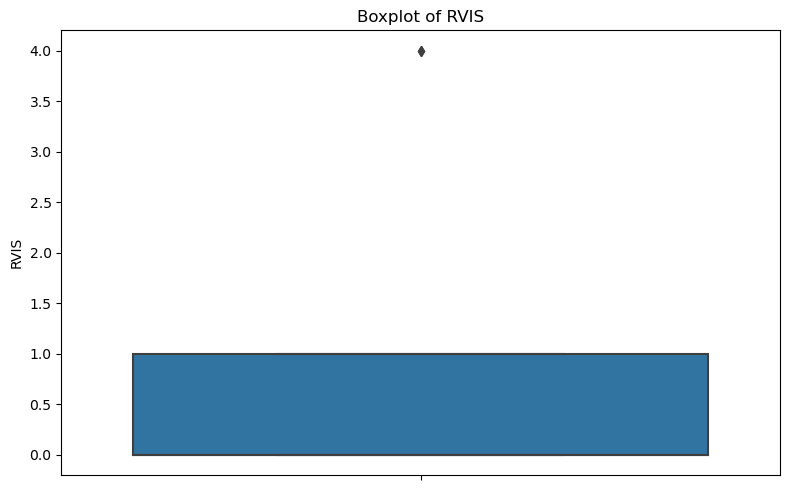

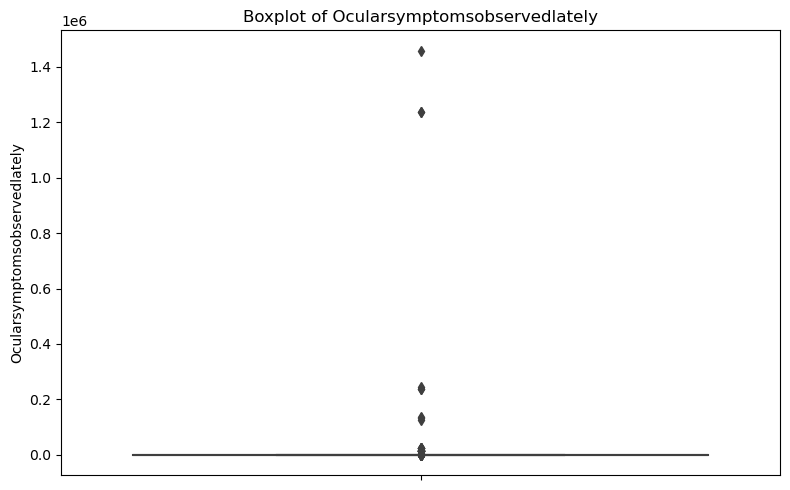

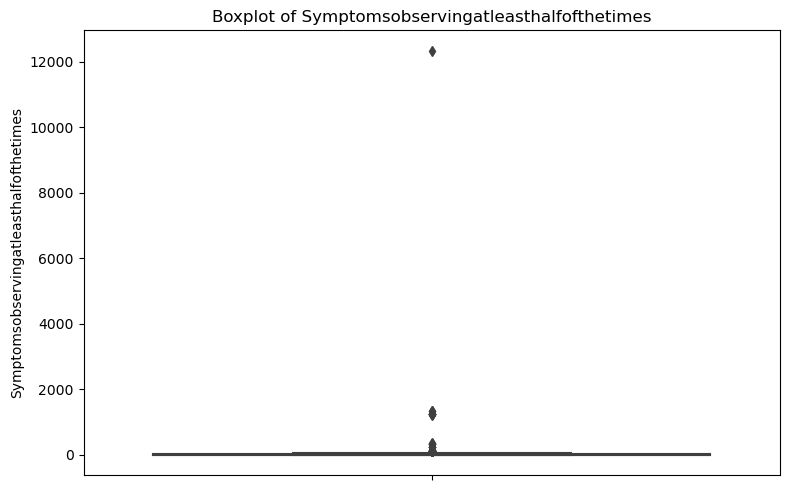

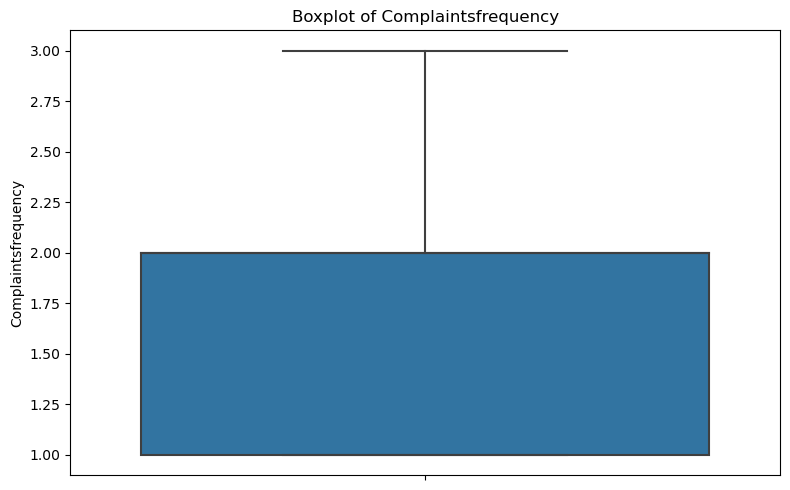

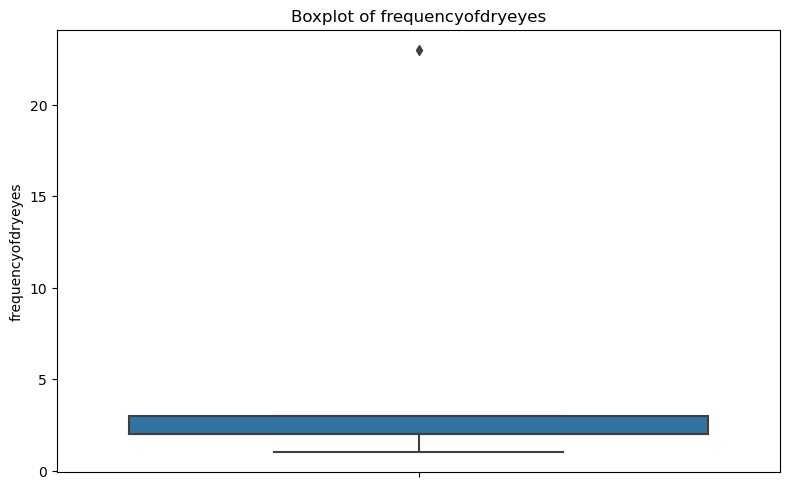

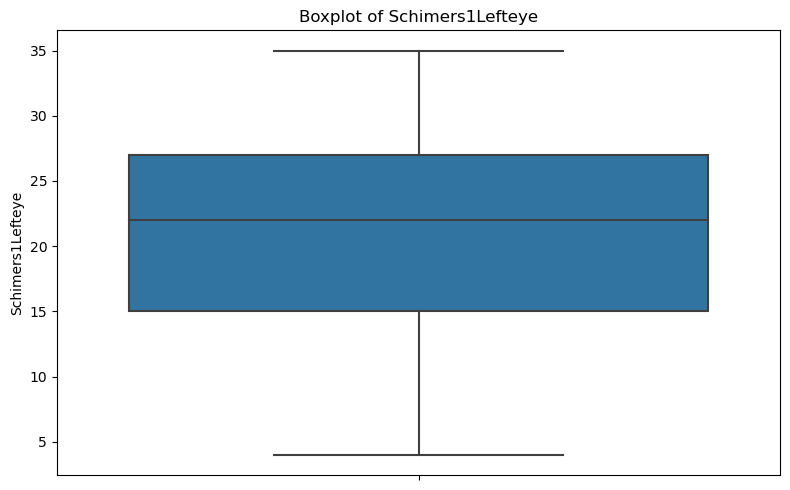

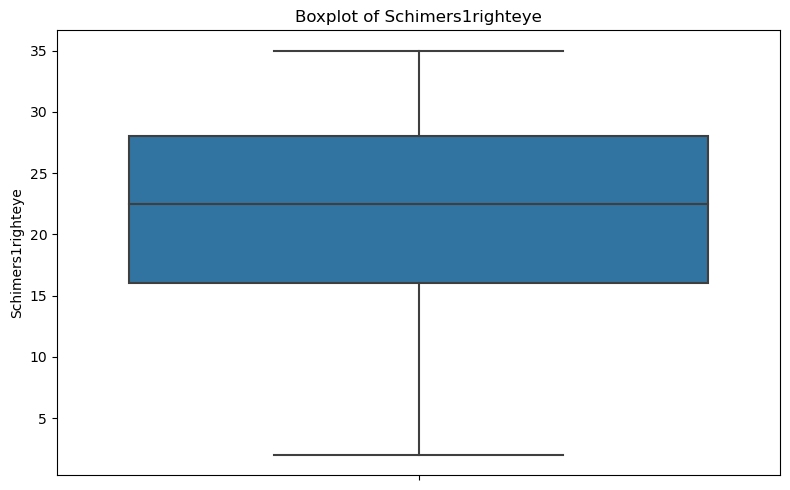

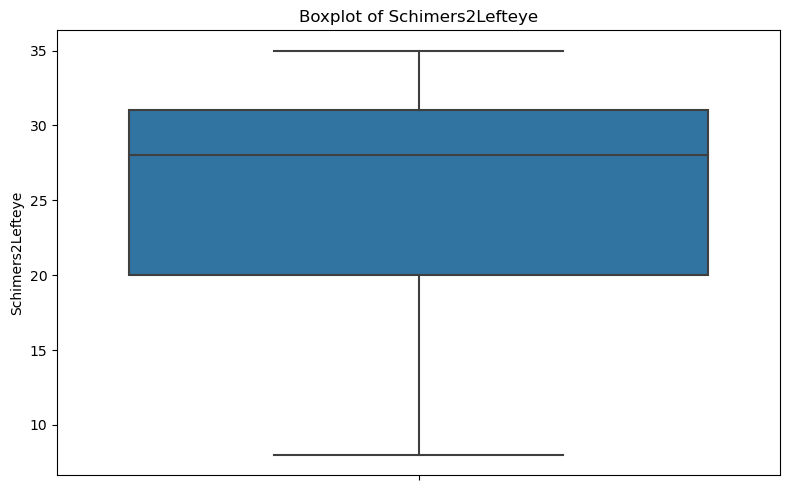

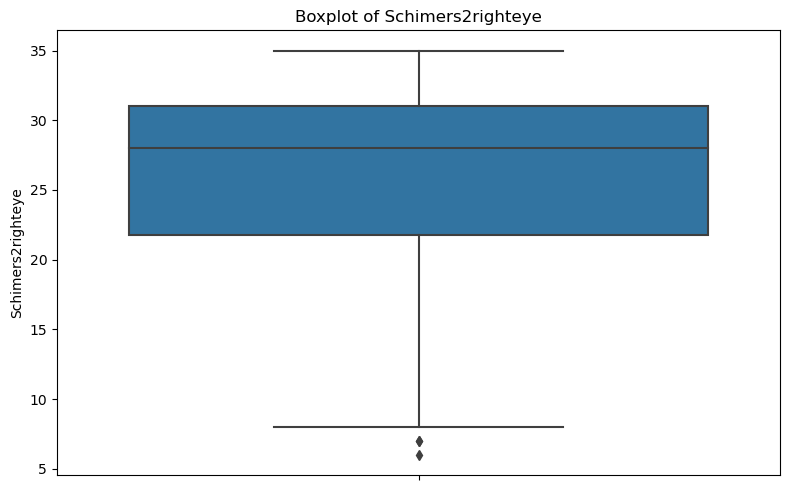

In [41]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division
# Create separate box plots for each numerical variable
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

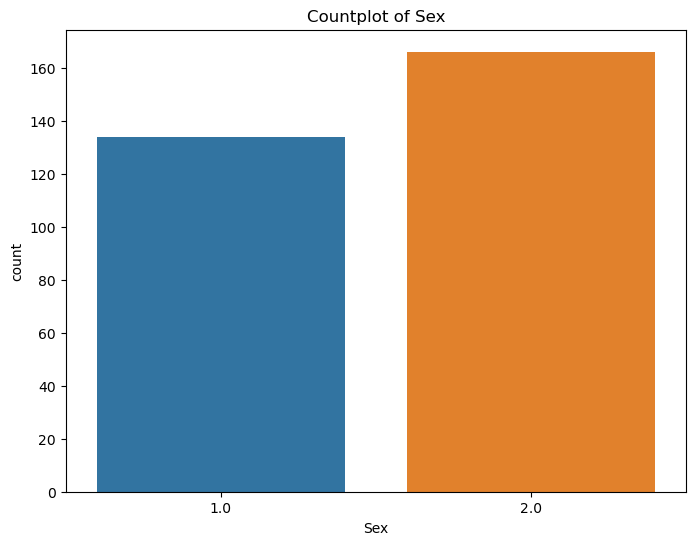

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Countplot of Sex')
plt.show()

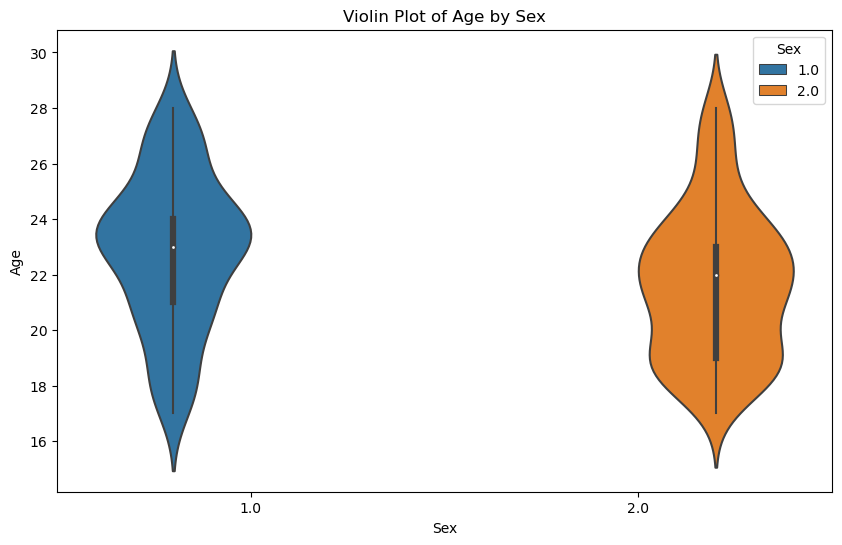

In [43]:
# Violin Plot with different colors for each category of 'Sex'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Sex', data=df)
plt.title('Violin Plot of Age by Sex')
plt.show()

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

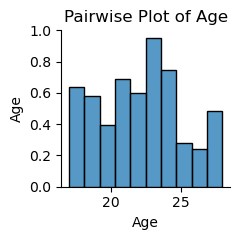

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

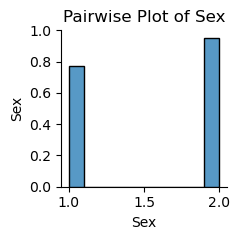

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

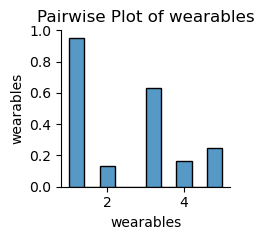

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

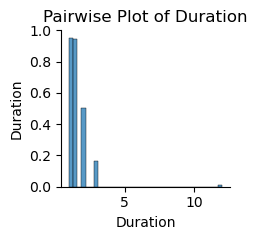

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

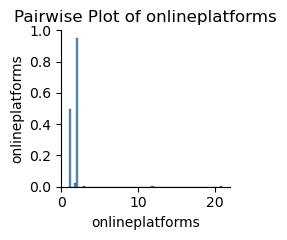

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

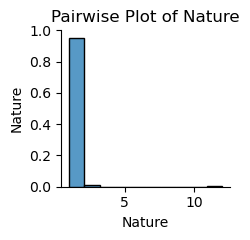

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

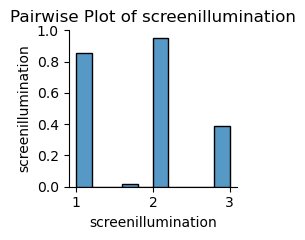

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

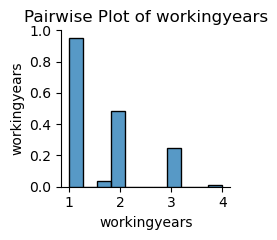

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

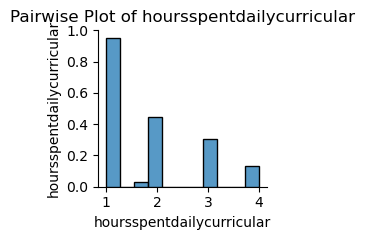

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

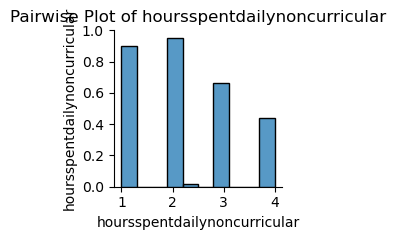

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

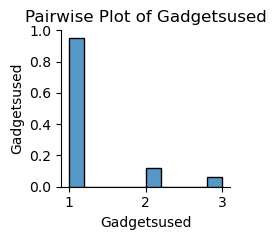

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

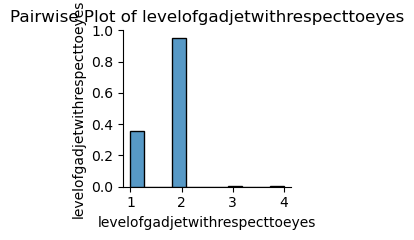

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

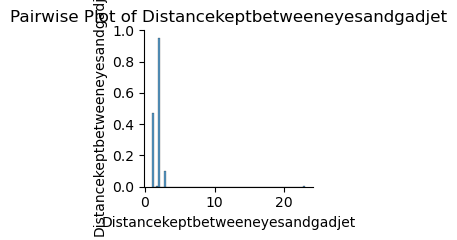

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

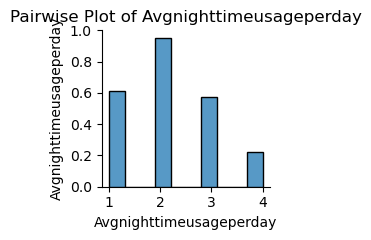

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

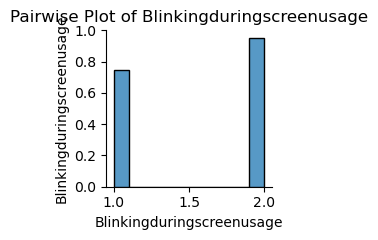

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

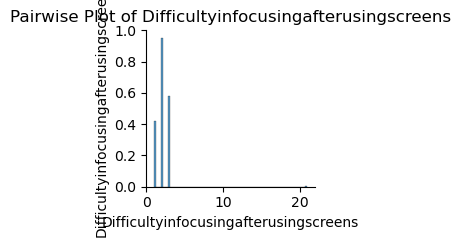

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

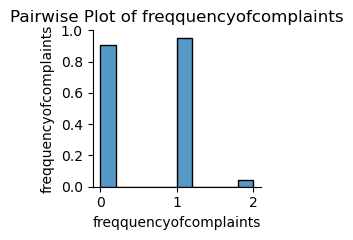

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

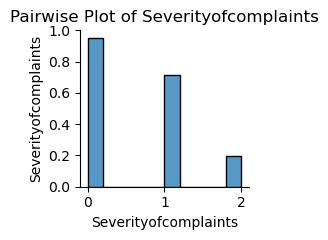

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

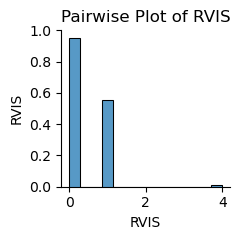

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

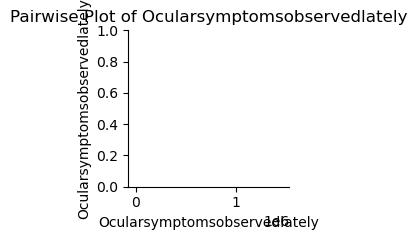

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

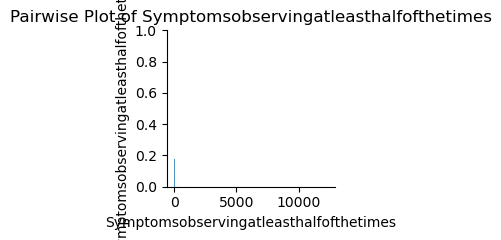

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

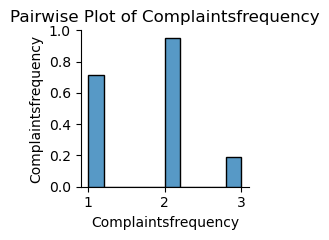

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

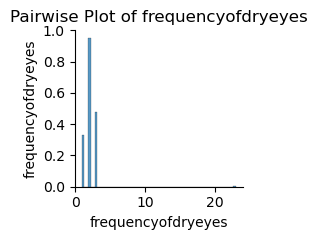

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

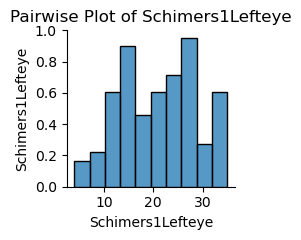

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

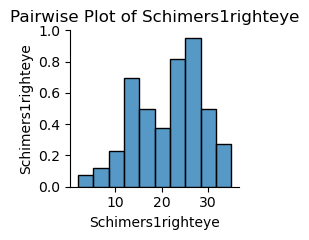

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

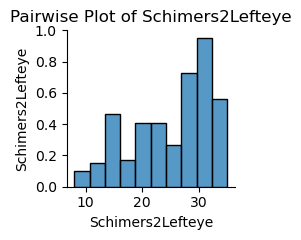

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3265167689.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

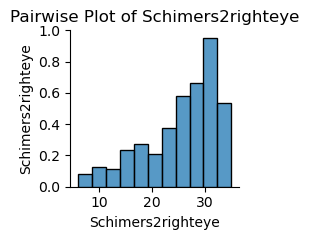

In [44]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create pairwise scatter plots for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(10,8))  # Adjust the figure size as needed
    sns.pairplot(df[[col]])
    plt.title(f'Pairwise Plot of {col}')
    plt.tight_layout()
    plt.show()

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

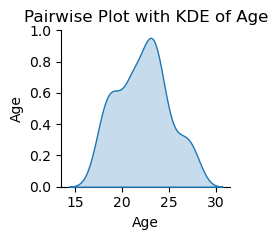

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

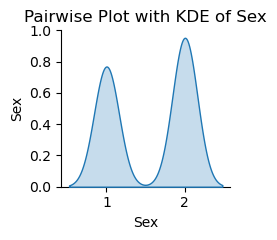

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

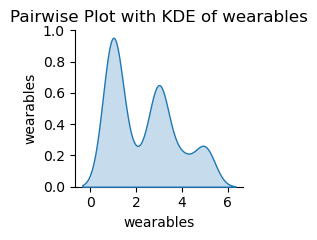

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

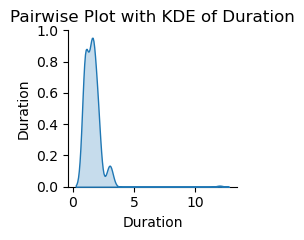

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

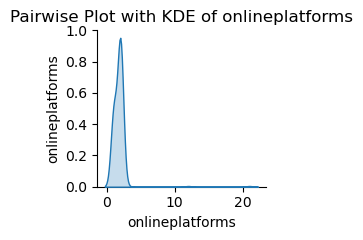

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

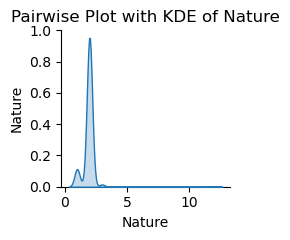

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

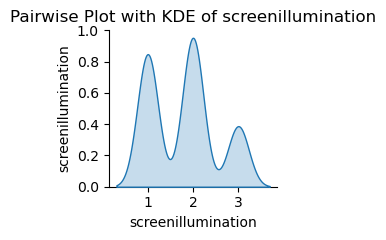

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

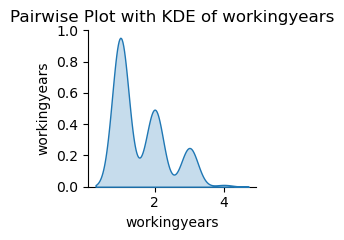

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

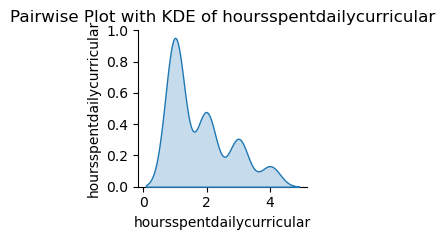

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

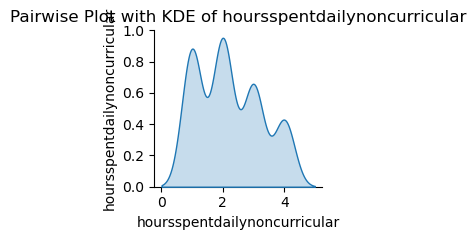

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

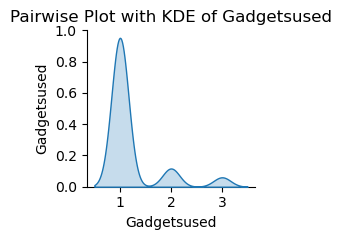

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

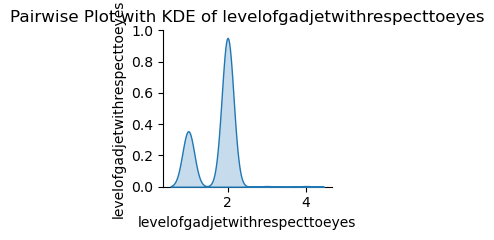

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

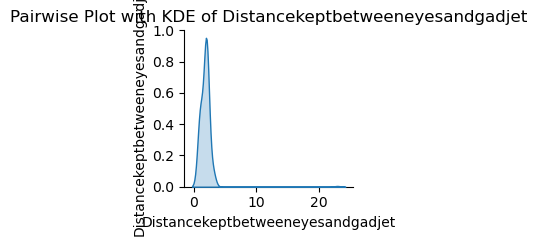

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

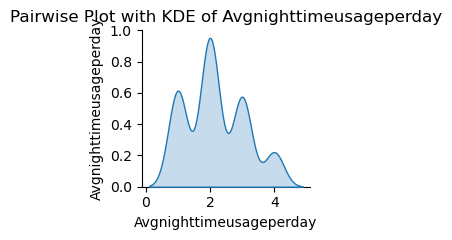

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

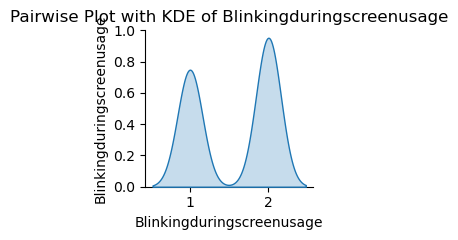

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

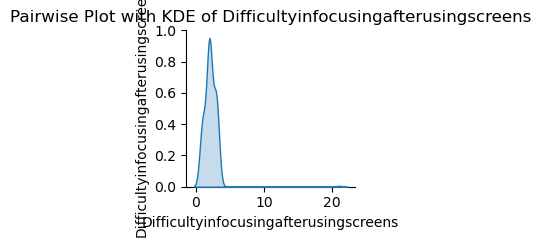

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

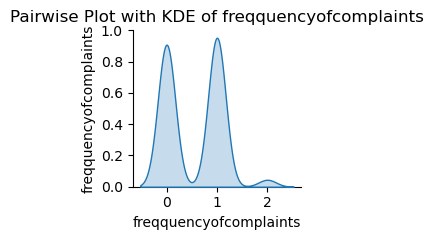

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

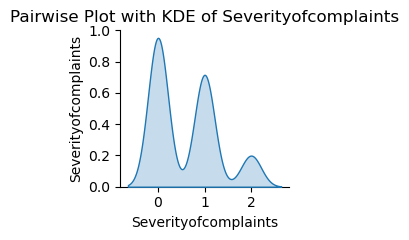

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

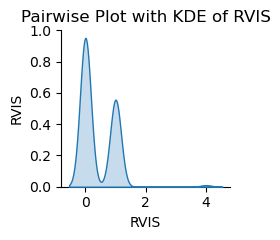

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

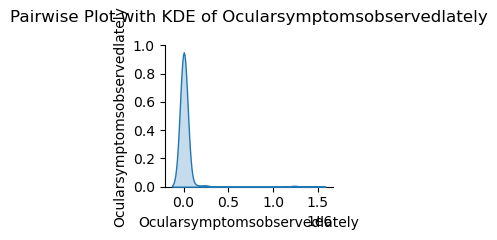

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

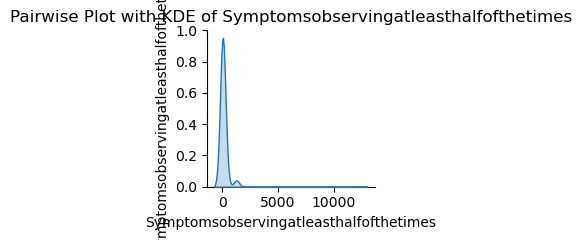

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

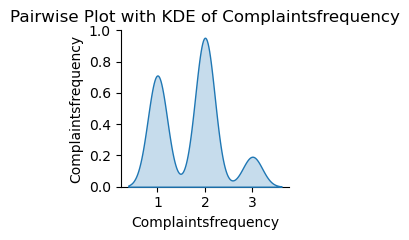

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

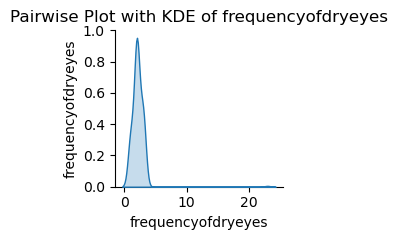

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

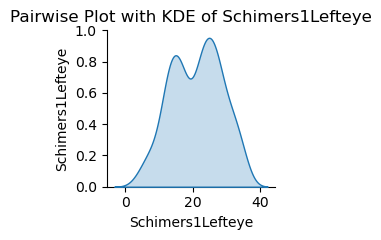

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

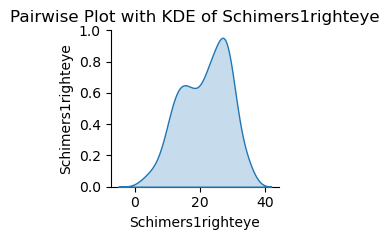

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

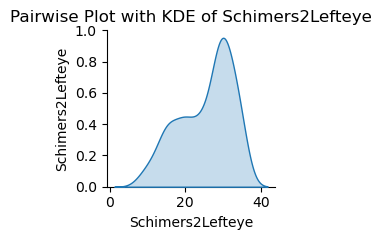

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\101768391.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

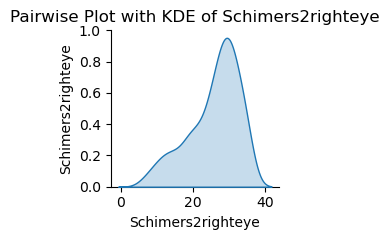

In [45]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create pairwise scatter plots with KDE along the diagonal for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(10,8))  # Adjust the figure size as needed
    sns.pairplot(df[[col]], diag_kind='kde')
    plt.title(f'Pairwise Plot with KDE of {col}')
    plt.tight_layout()
    plt.show()

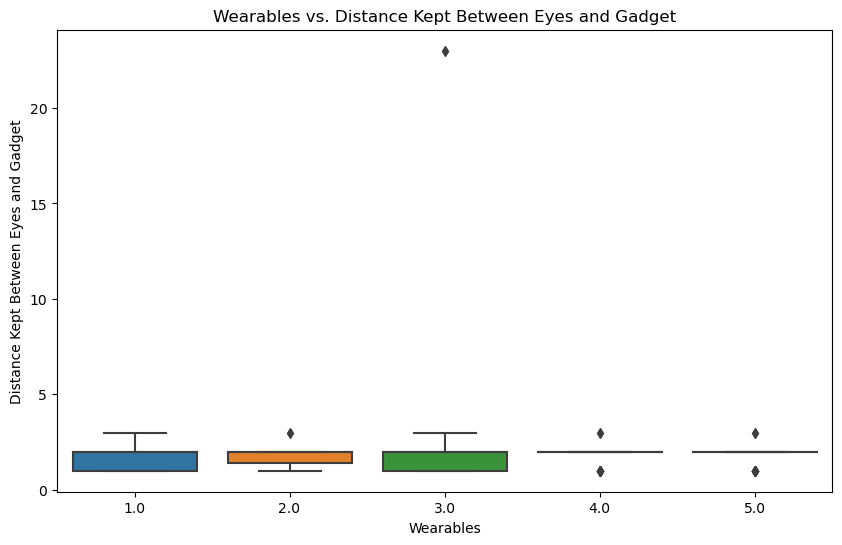

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wearables', y='Distancekeptbetweeneyesandgadjet', data=df)
plt.title('Wearables vs. Distance Kept Between Eyes and Gadget')
plt.xlabel('Wearables')
plt.ylabel('Distance Kept Between Eyes and Gadget')
plt.show()

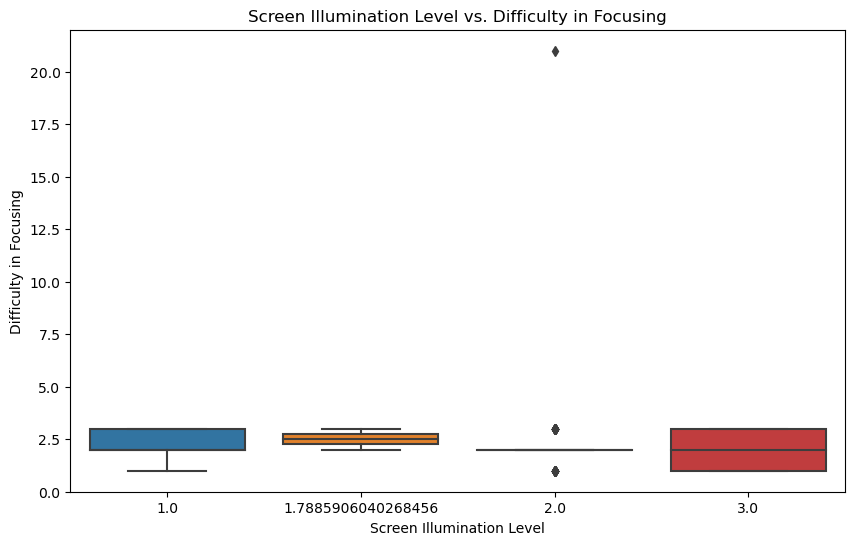

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='screenillumination', y='Difficultyinfocusingafterusingscreens', data=df)
plt.title('Screen Illumination Level vs. Difficulty in Focusing')
plt.xlabel('Screen Illumination Level')
plt.ylabel('Difficulty in Focusing')
plt.show()

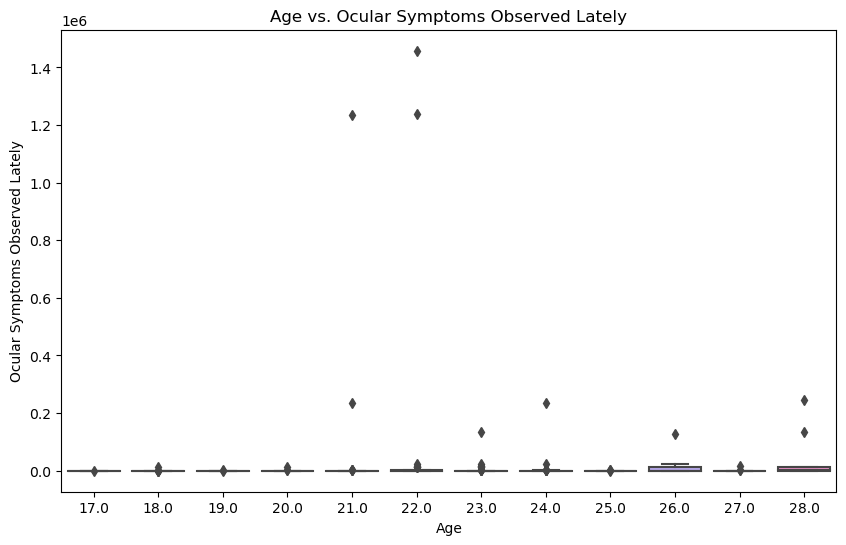

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Ocularsymptomsobservedlately', data=df)
plt.title('Age vs. Ocular Symptoms Observed Lately')
plt.xlabel('Age')
plt.ylabel('Ocular Symptoms Observed Lately')
plt.show()

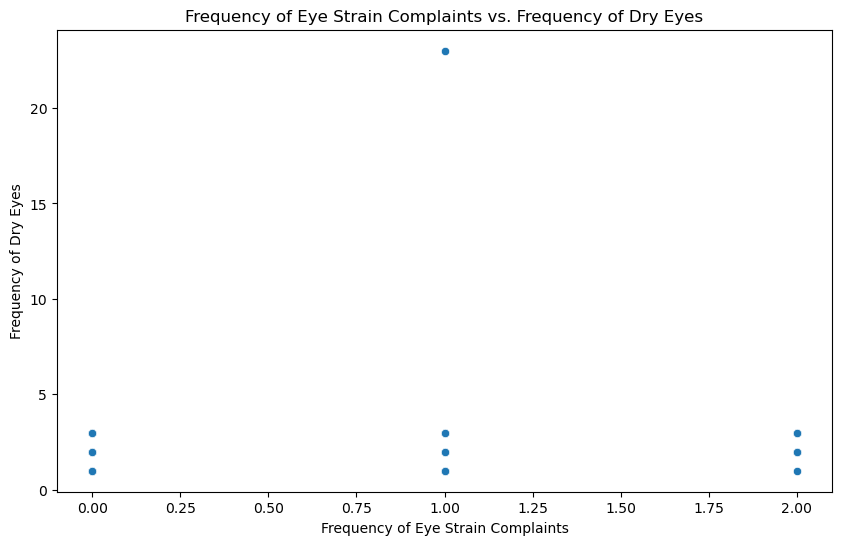

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freqquencyofcomplaints', y='frequencyofdryeyes', data=df)
plt.title('Frequency of Eye Strain Complaints vs. Frequency of Dry Eyes')
plt.xlabel('Frequency of Eye Strain Complaints')
plt.ylabel('Frequency of Dry Eyes')
plt.show()

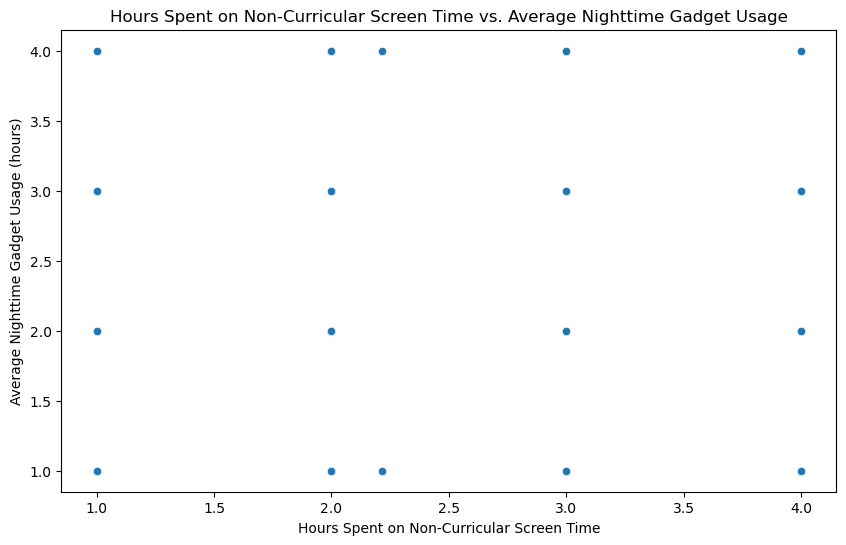

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hoursspentdailynoncurricular', y='Avgnighttimeusageperday', data=df)
plt.title('Hours Spent on Non-Curricular Screen Time vs. Average Nighttime Gadget Usage')
plt.xlabel('Hours Spent on Non-Curricular Screen Time')
plt.ylabel('Average Nighttime Gadget Usage (hours)')
plt.show()

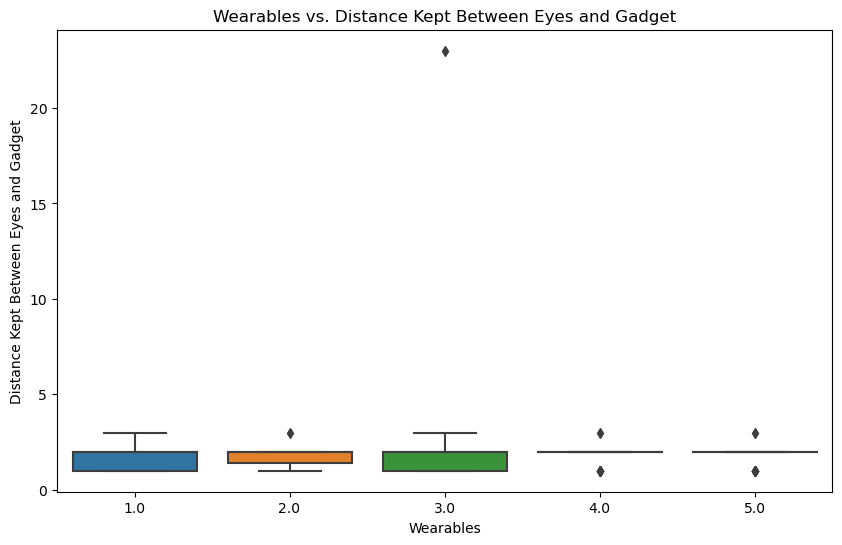

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wearables', y='Distancekeptbetweeneyesandgadjet', data=df)
plt.title('Wearables vs. Distance Kept Between Eyes and Gadget')
plt.xlabel('Wearables')
plt.ylabel('Distance Kept Between Eyes and Gadget')
plt.show()

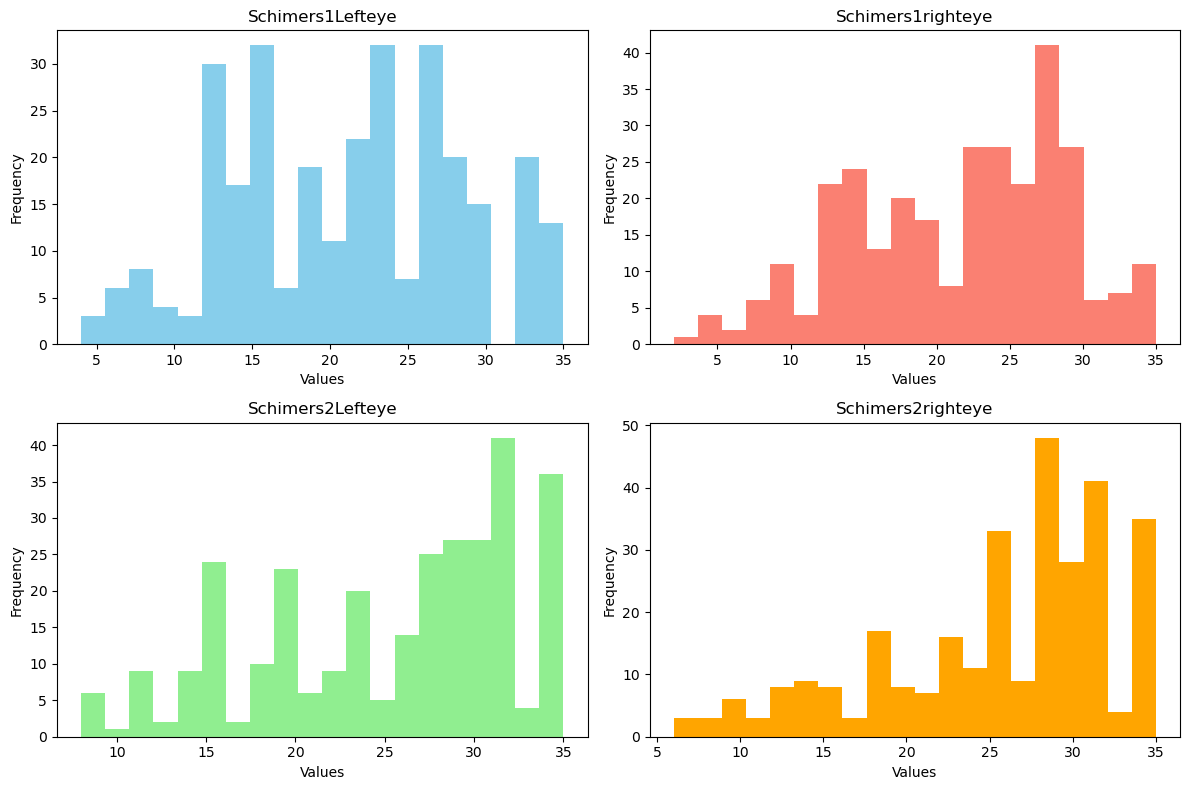

In [52]:
fig,axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(df['Schimers1Lefteye'], bins=20, color='skyblue')
axs[0, 0].set_title('Schimers1Lefteye')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['Schimers1righteye'], bins=20, color='salmon')
axs[0, 1].set_title('Schimers1righteye')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['Schimers2Lefteye'], bins=20, color='lightgreen')
axs[1, 0].set_title('Schimers2Lefteye')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Schimers2righteye'], bins=20, color='orange')
axs[1, 1].set_title('Schimers2righteye')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

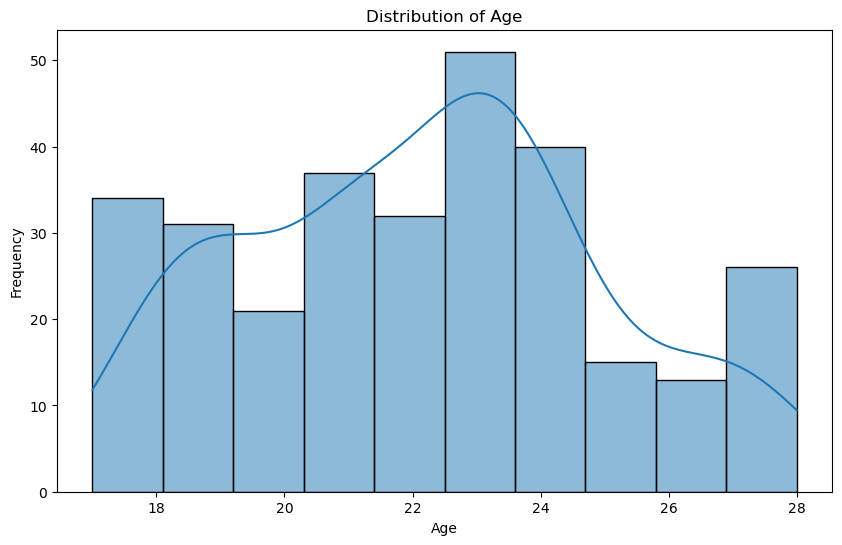

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

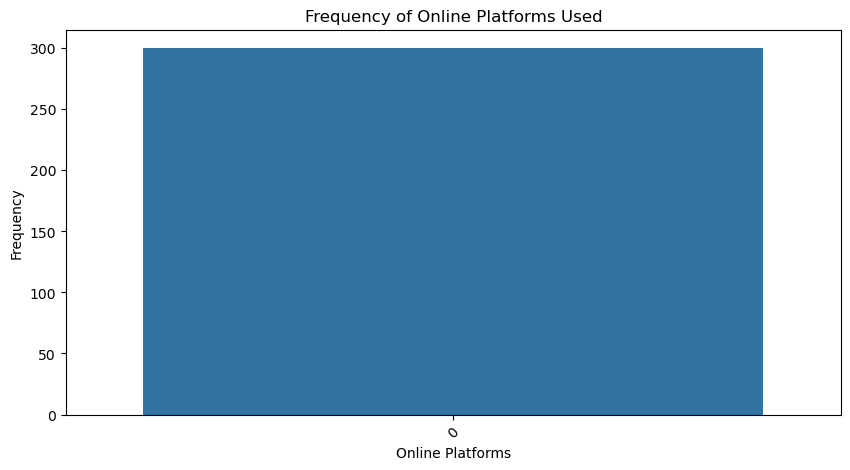

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(df['onlineplatforms'])
plt.title('Frequency of Online Platforms Used')
plt.xlabel('Online Platforms')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

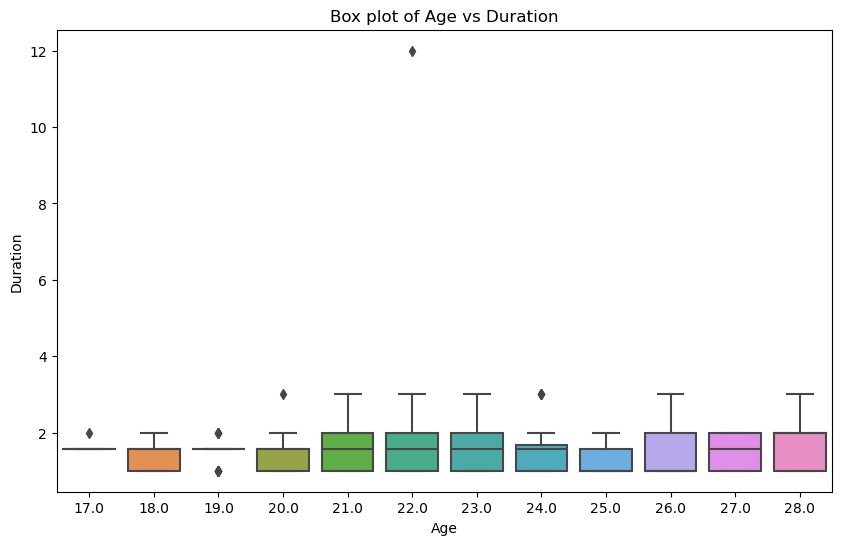

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Duration', data=df)
plt.title('Box plot of Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

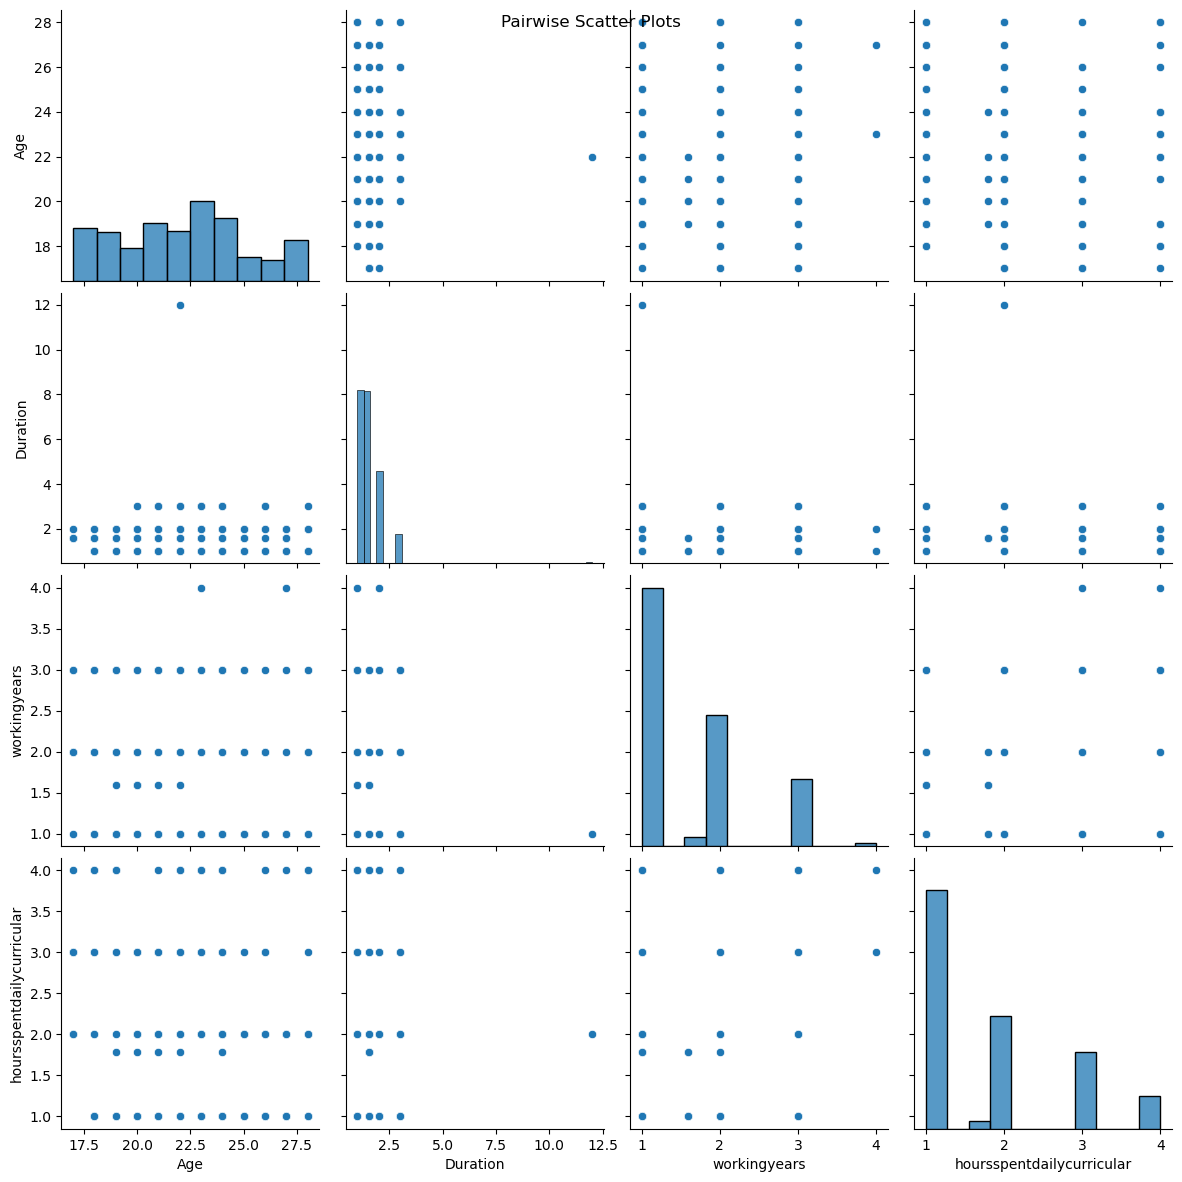

In [56]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Age', 'Duration', 'workingyears', 'hoursspentdailycurricular']], height=3)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

<Axes: xlabel='Duration', ylabel='Count'>

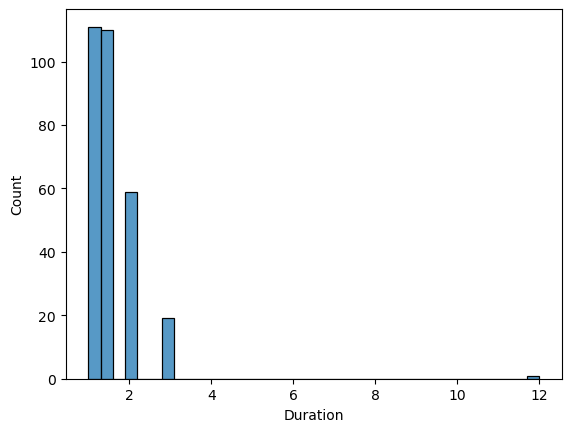

In [57]:
# Analyze screen usage duration
sns.histplot(x='Duration', data=df)

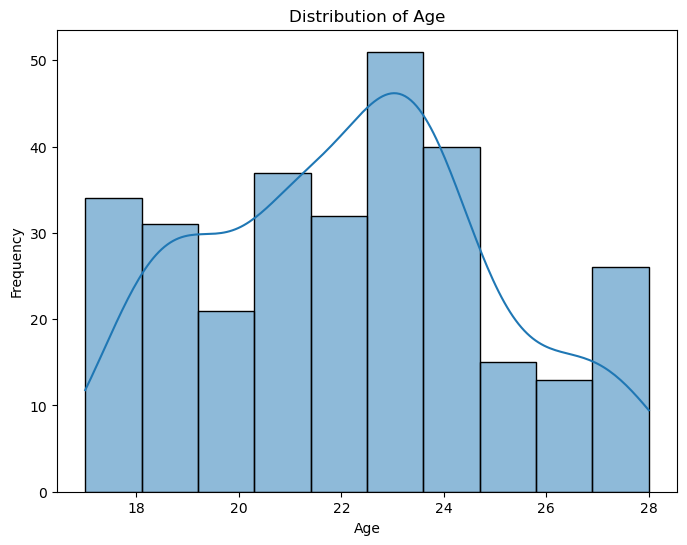

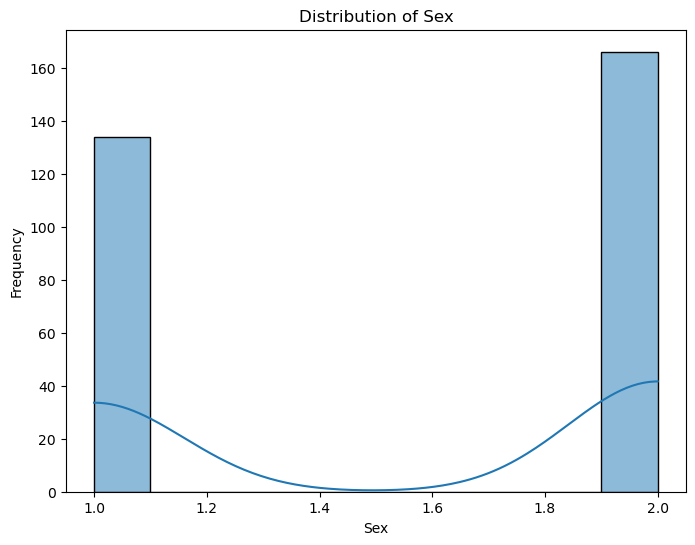

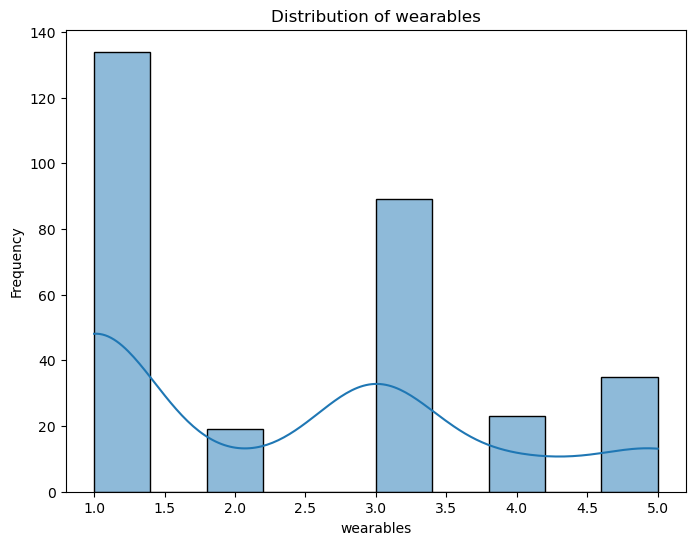

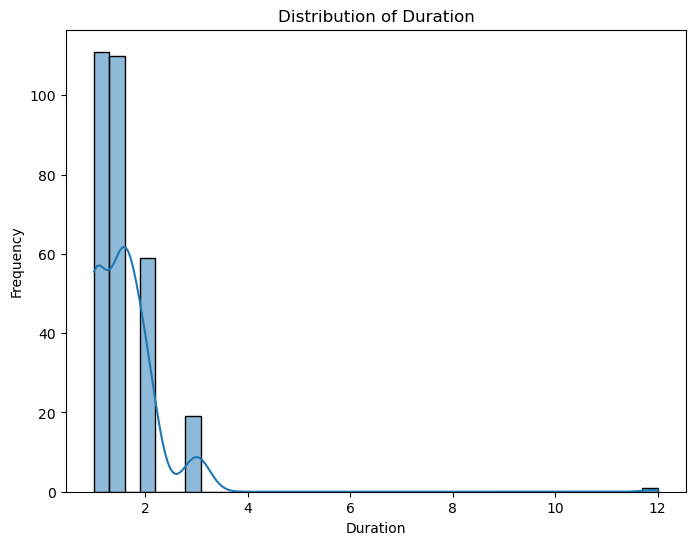

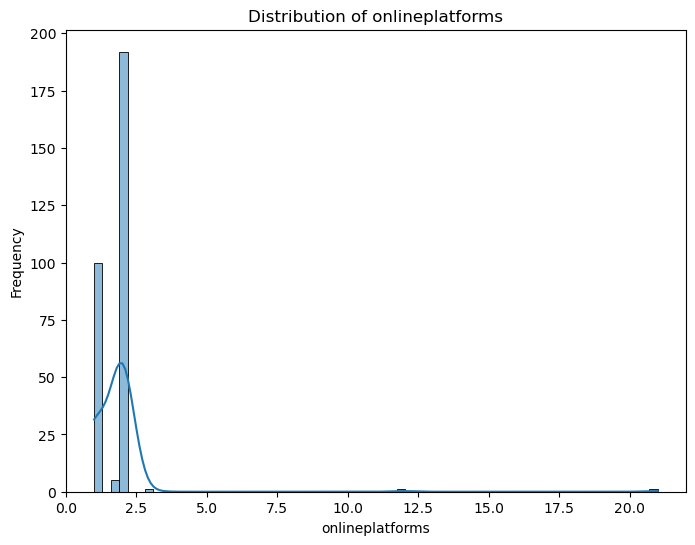

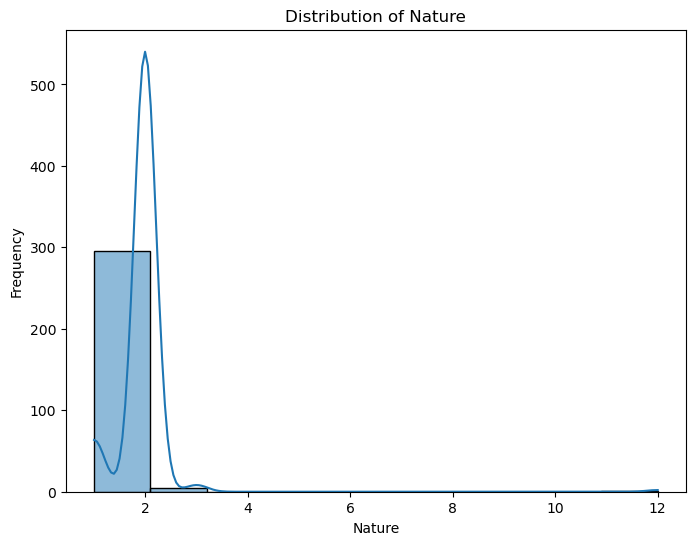

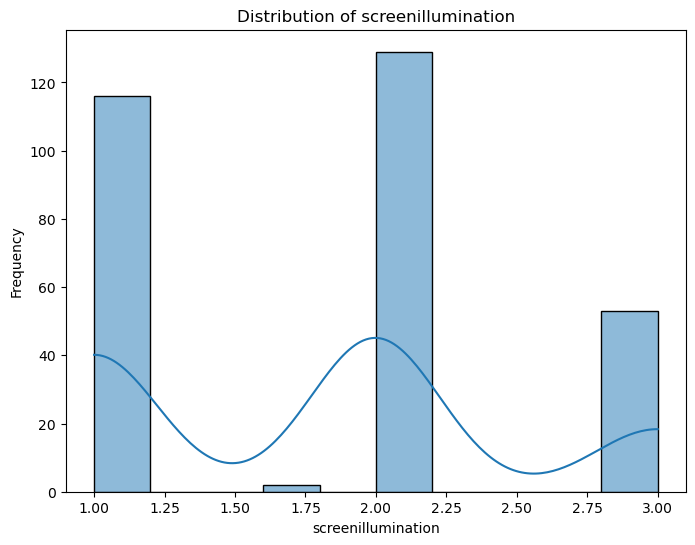

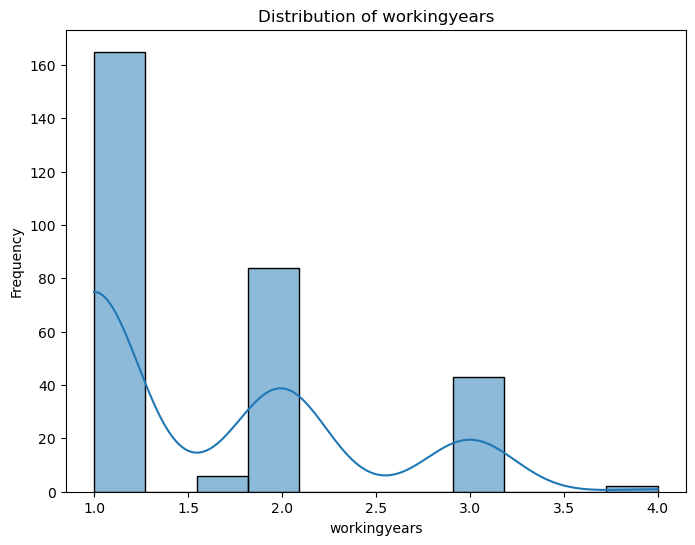

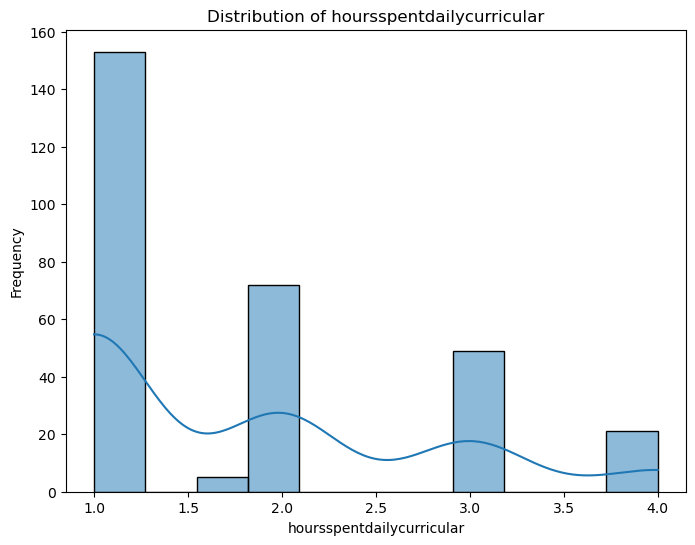

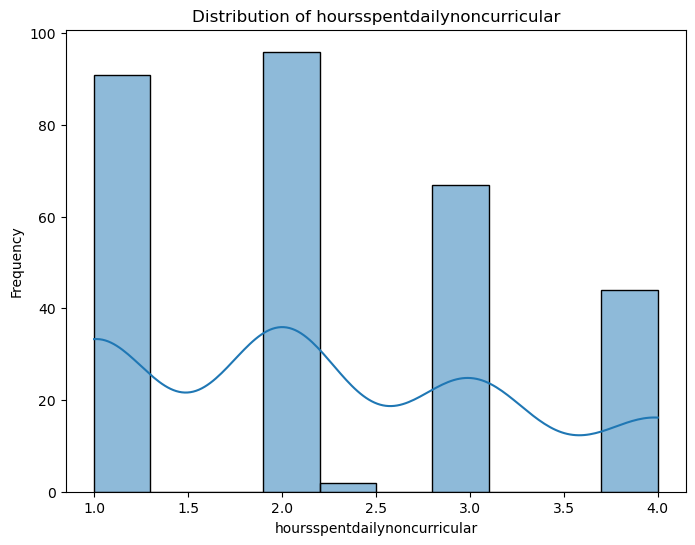

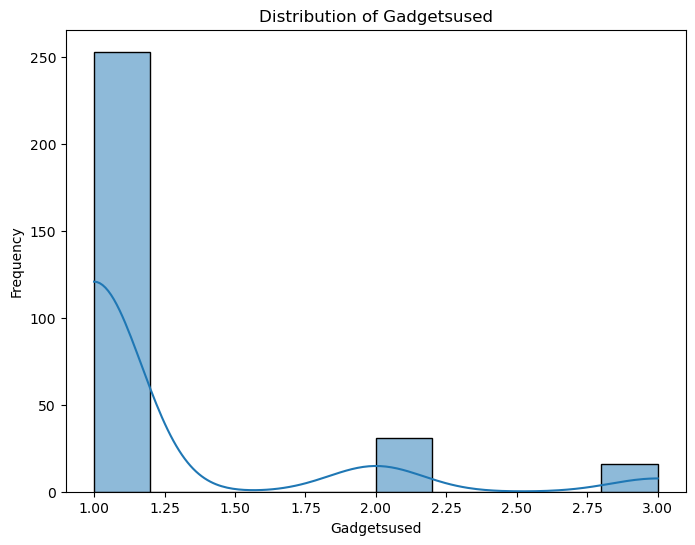

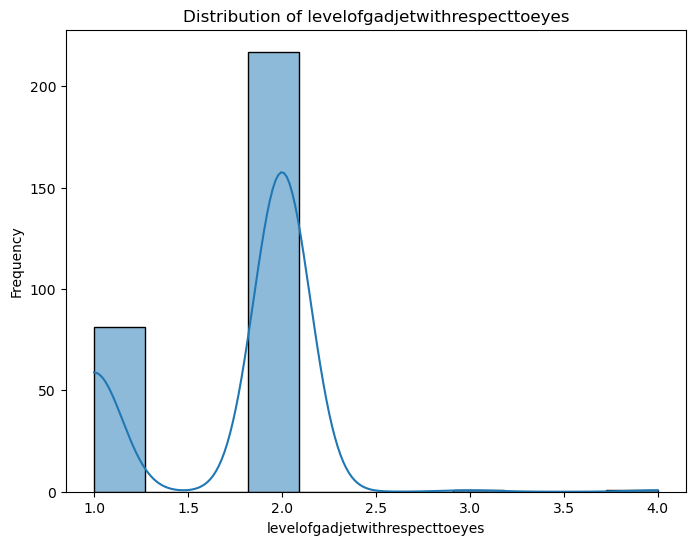

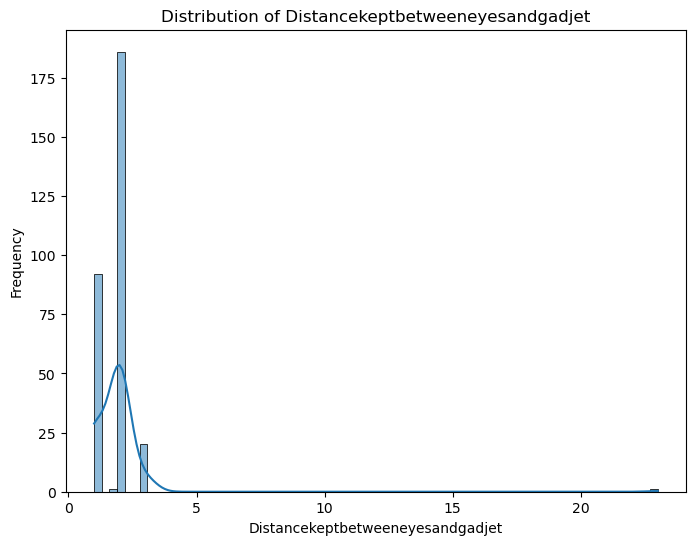

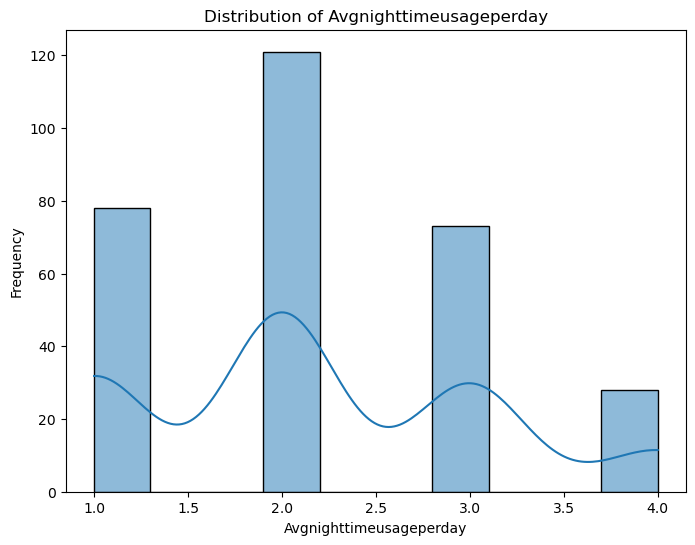

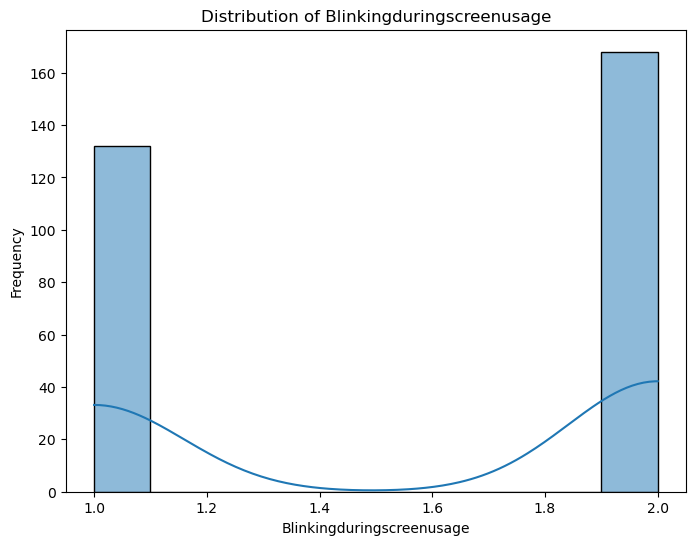

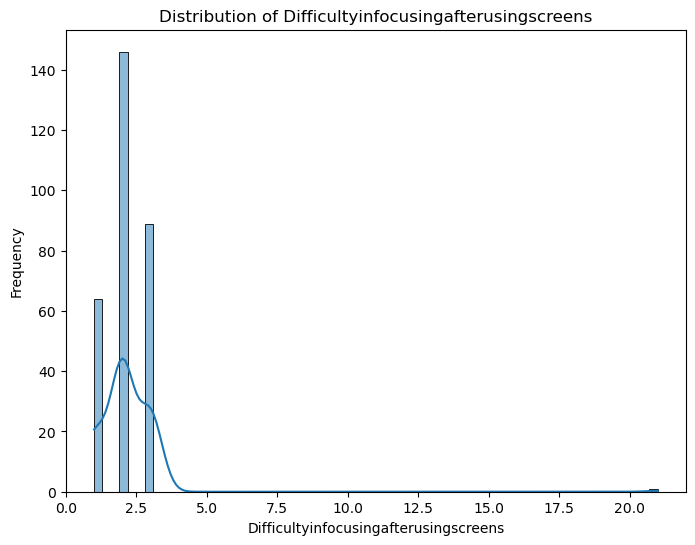

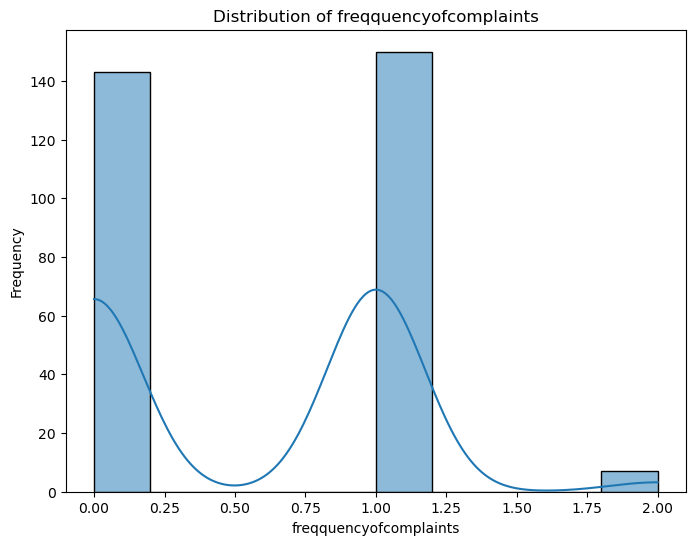

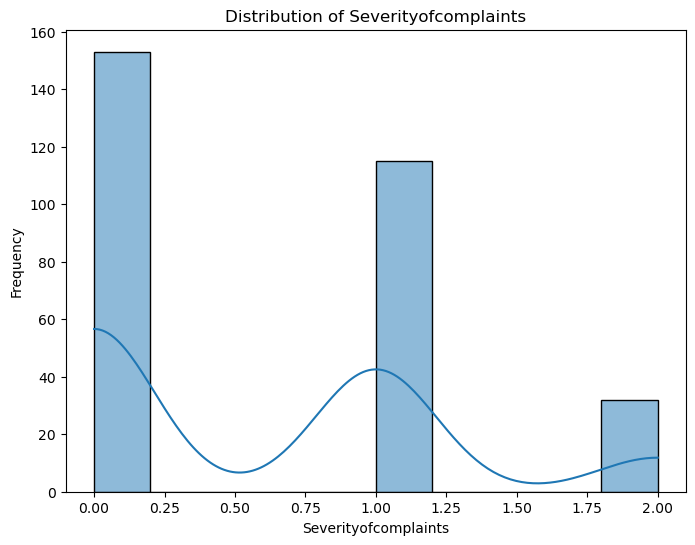

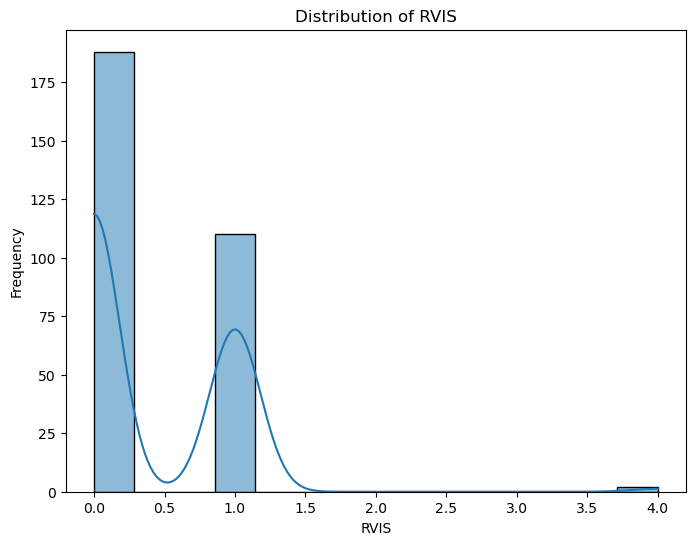

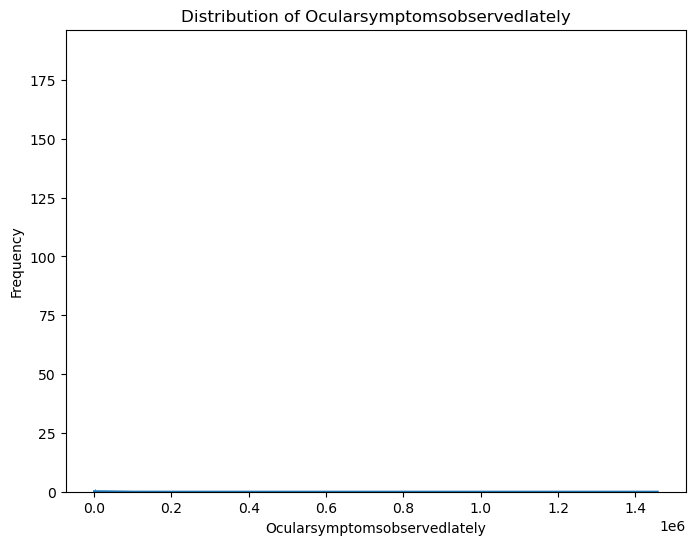

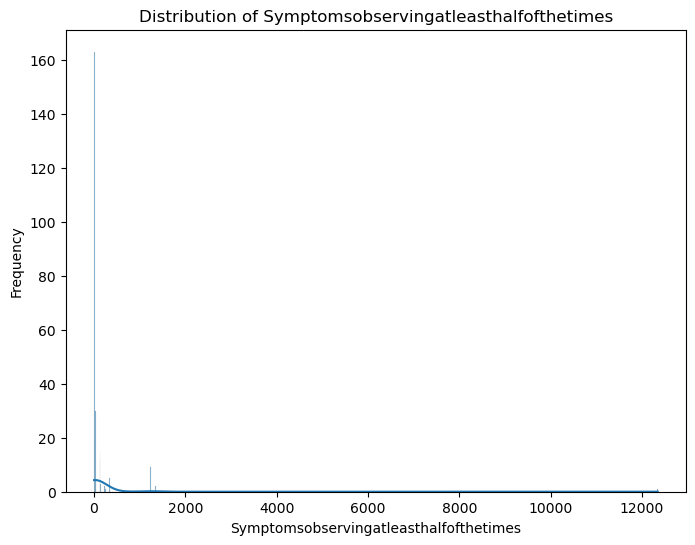

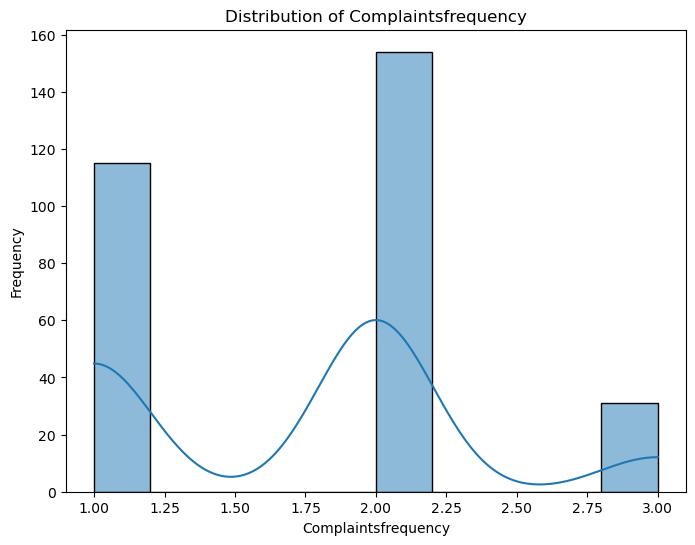

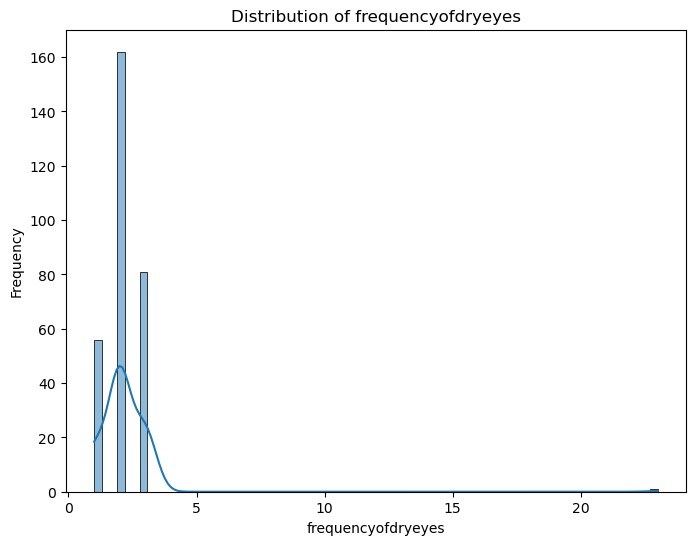

In [58]:
# Define the list of input variables to analyze
input_variables = ['Age', 'Sex', 'wearables', 'Duration', 'onlineplatforms', 
                   'Nature', 'screenillumination', 'workingyears', 
                   'hoursspentdailycurricular', 'hoursspentdailynoncurricular',
                   'Gadgetsused', 'levelofgadjetwithrespecttoeyes', 
                   'Distancekeptbetweeneyesandgadjet', 'Avgnighttimeusageperday', 
                   'Blinkingduringscreenusage', 'Difficultyinfocusingafterusingscreens',
                   'freqquencyofcomplaints', 'Severityofcomplaints', 'RVIS', 
                   'Ocularsymptomsobservedlately', 'Symptomsobservingatleasthalfofthetimes',
                   'Complaintsfrequency', 'frequencyofdryeyes']

# Loop through each input variable for univariate analysis
for variable in input_variables:
    # Create a figure and axis
    plt.figure(figsize=(8, 6))
    
    # Plot the univariate analysis using appropriate plot type
    if df[variable].dtype == 'int64' or df[variable].dtype == 'float64':
        sns.histplot(df[variable], kde=True)
        plt.title(f'Distribution of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    else:
        sns.countplot(data=df, x=variable)
        plt.title(f'Count of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Count')
    
    # Show the plot
    plt.show()

<Axes: xlabel='Gadgetsused', ylabel='Schimers1Lefteye'>

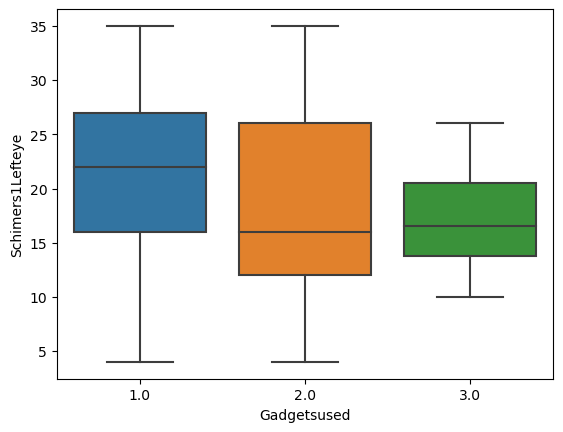

In [59]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers1Lefteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers2Lefteye'>

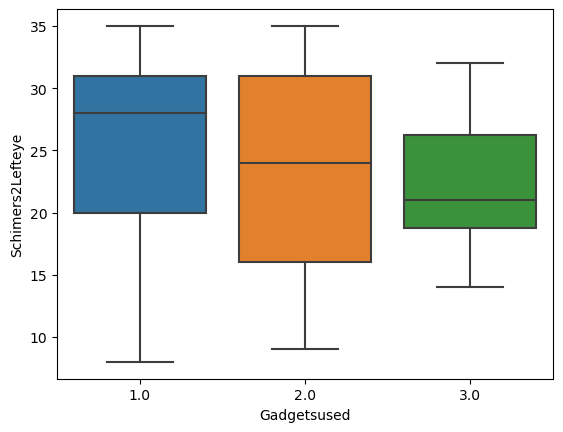

In [60]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers2Lefteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers1righteye'>

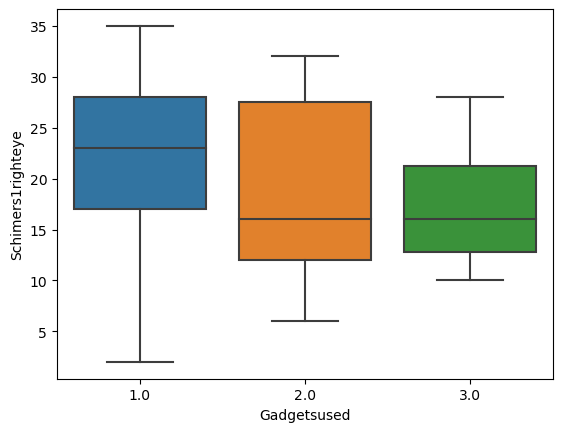

In [61]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers1righteye', data=df)

<Axes: xlabel='Gadgetsused', ylabel='Schimers2righteye'>

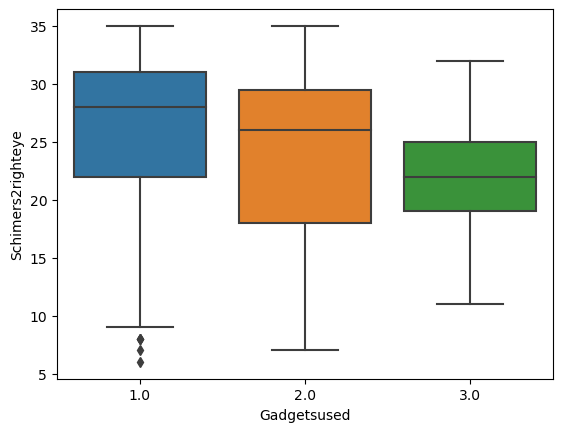

In [62]:
# Analyze Schirmer's Test results
sns.boxplot(x='Gadgetsused', y='Schimers2righteye', data=df)

In [64]:
# Histograms for numerical variables
numerical_columns = ['Age', 'Duration', 'workingyears', 'hoursspentdailycurricular', 
                     'hoursspentdailynoncurricular', 'Avgnighttimeusageperday', 'Blinkingduringscreenusage', 
                     'Difficultyinfocusingafterusingscreens', 'freqquencyofcomplaints', 'Severityofcomplaints', 
                     'RVIS', 'frequencyofdryeyes', 'Schimers1Lefteye', 'Schimers1righteye', 
                     'Schimers2Lefteye', 'Schimers2righteye']
categorical_columns = ['Sex', 'wearables', 'onlineplatforms', 'Nature', 'Gadgetsused']

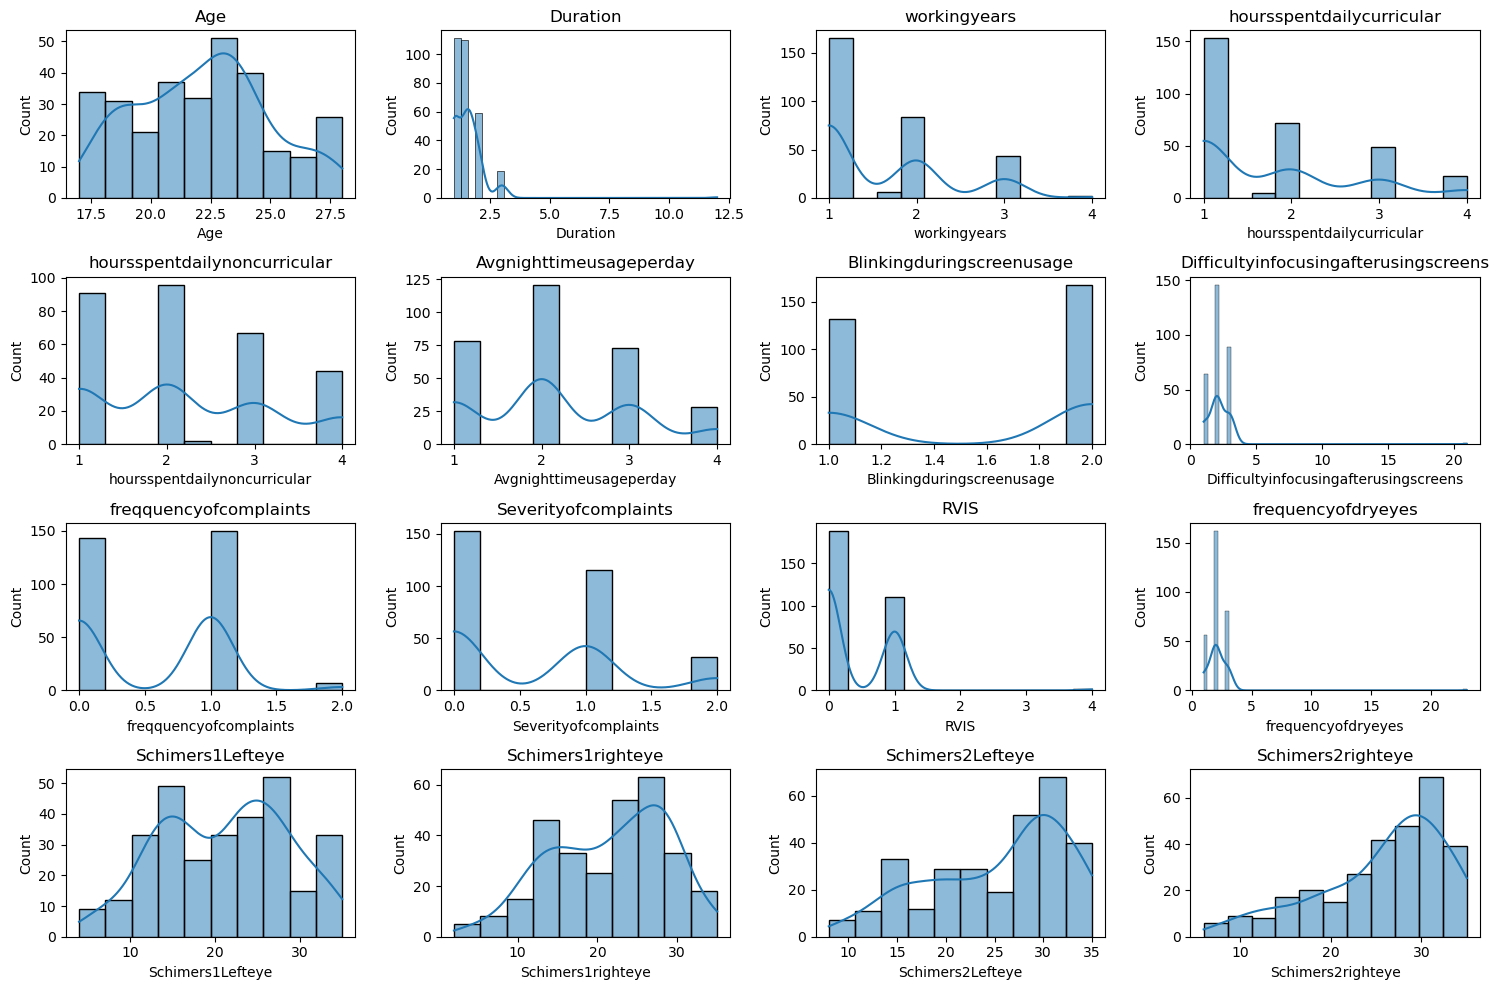

In [65]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

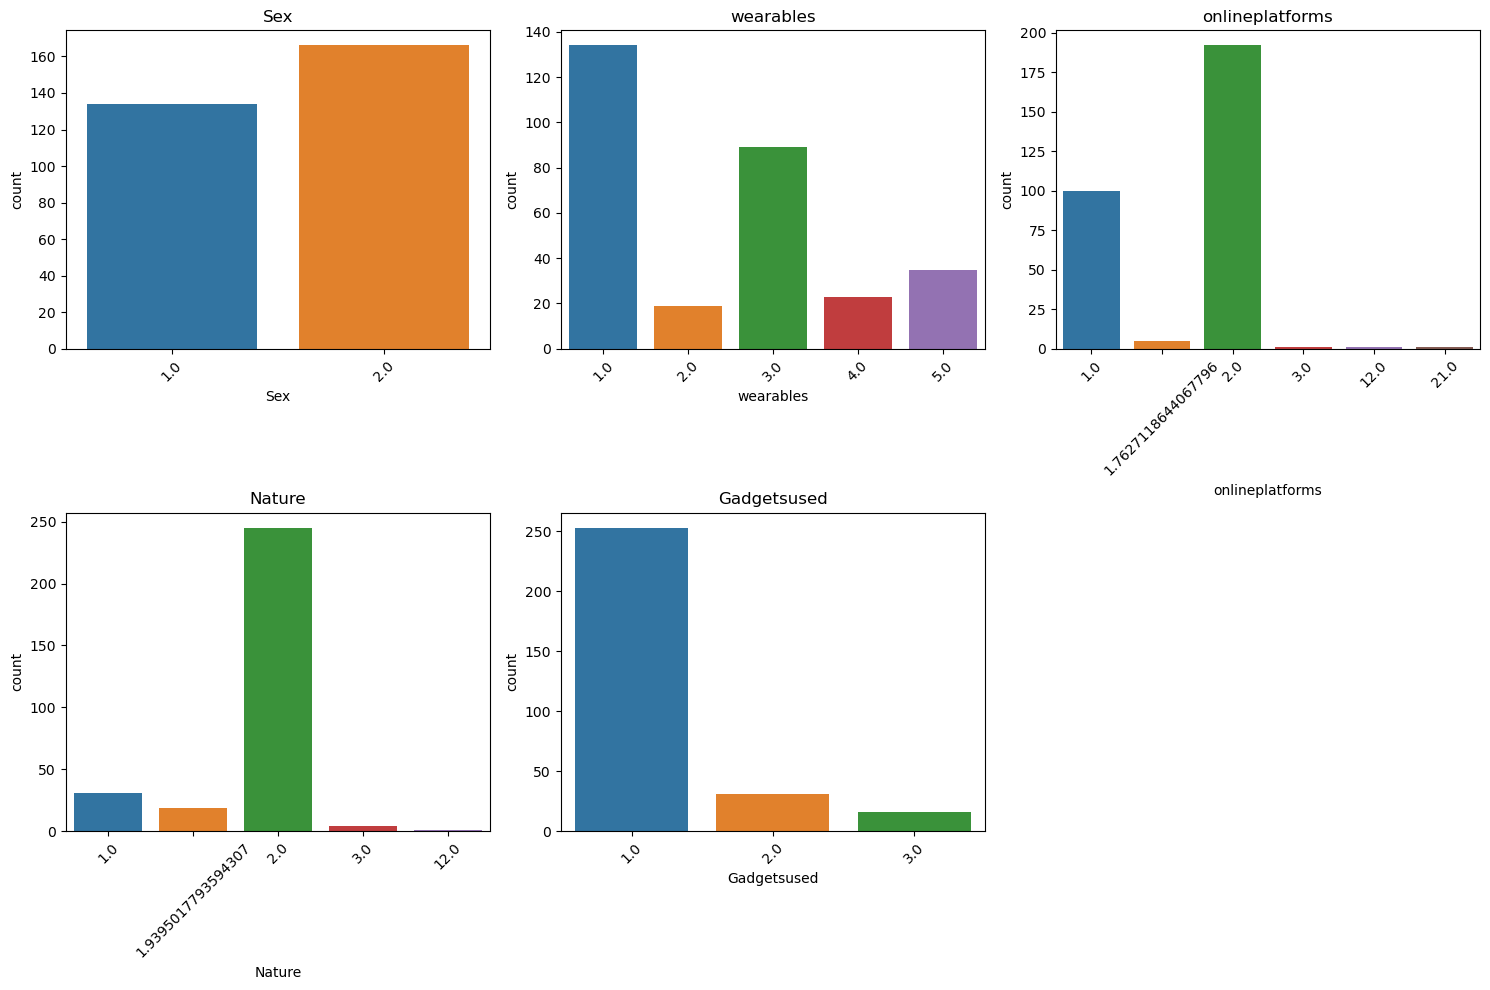

In [66]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

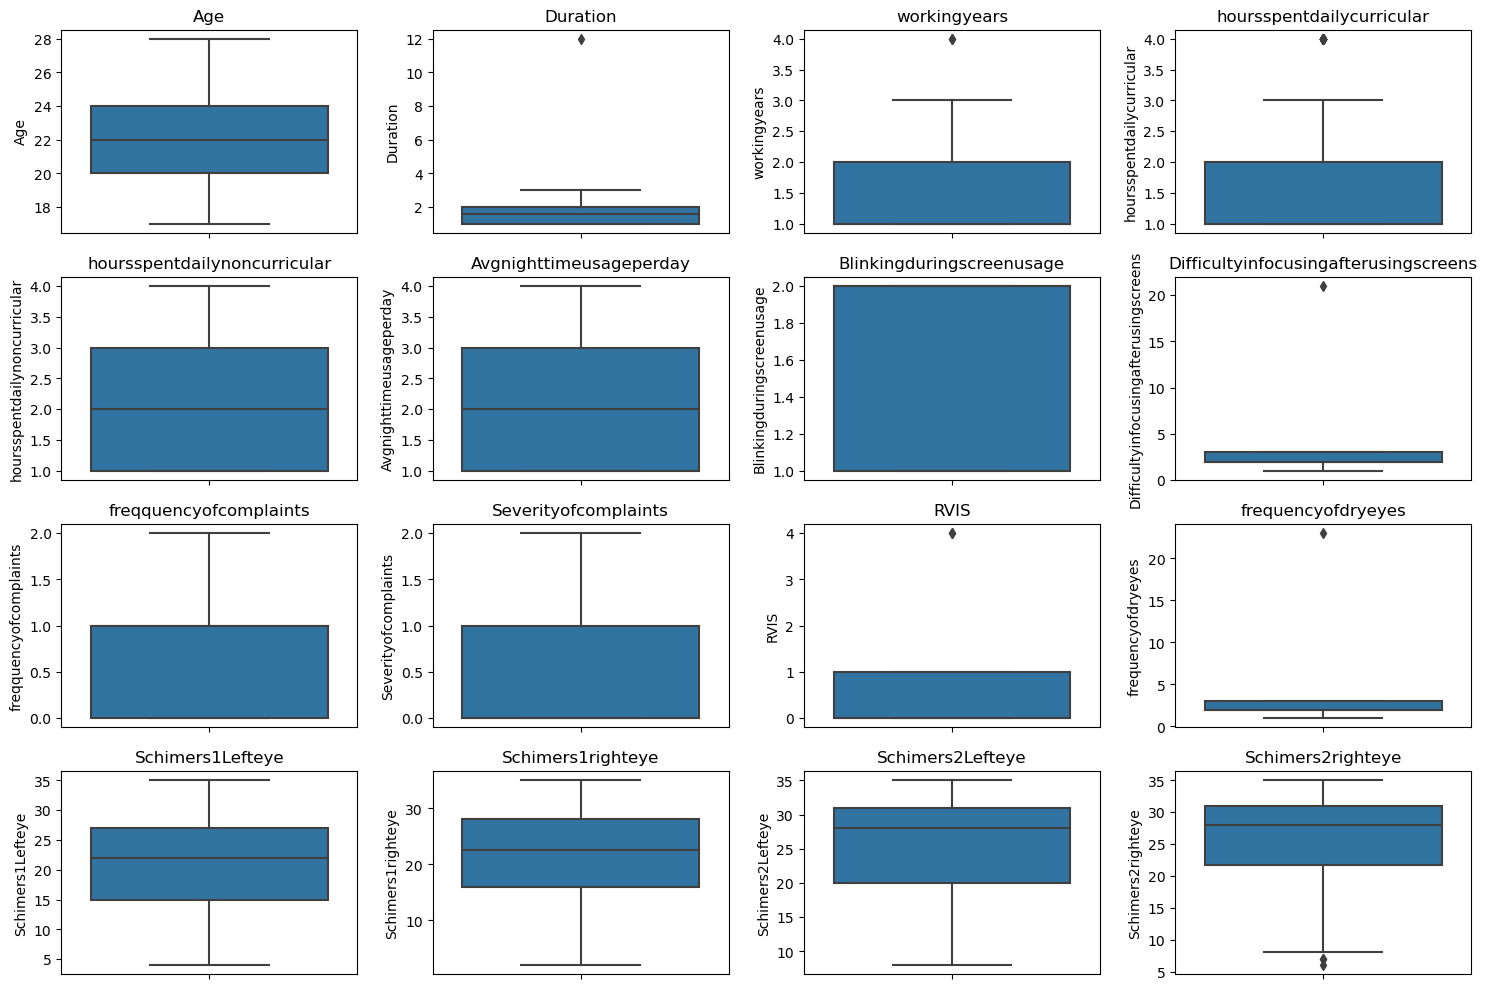

In [67]:
# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

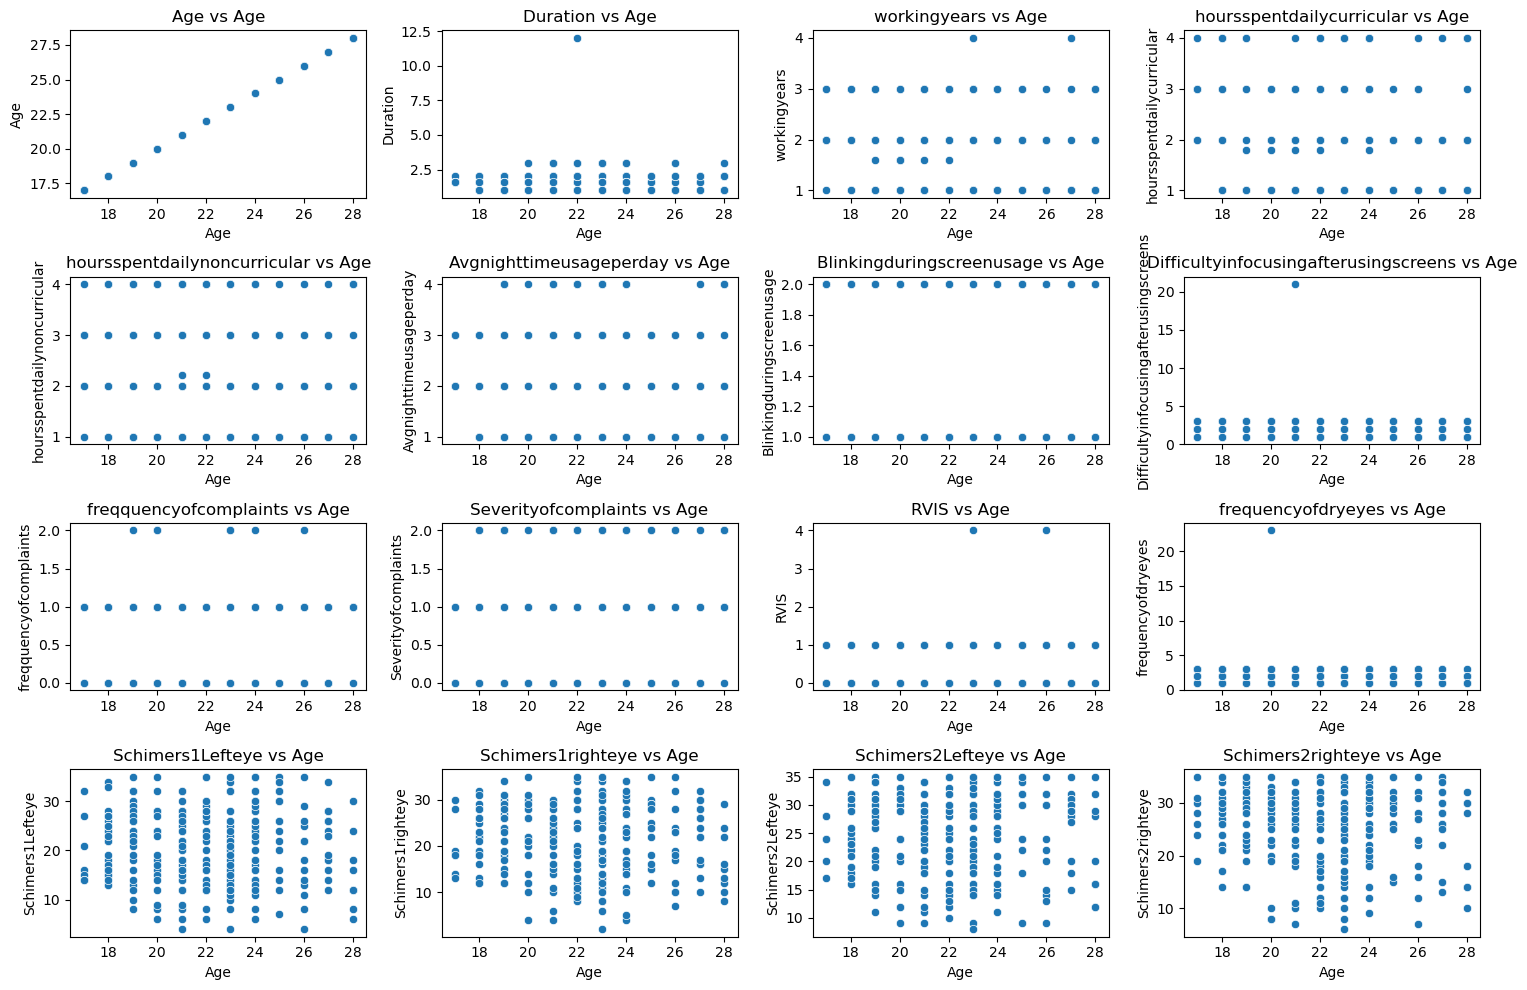

In [68]:
# Scatter plots for numerical variables against Age
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x='Age', y=col)
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

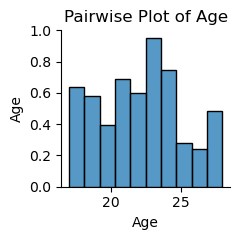

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

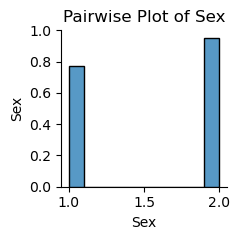

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

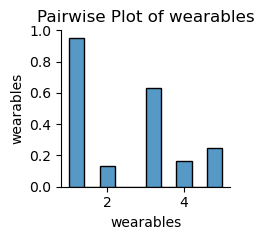

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

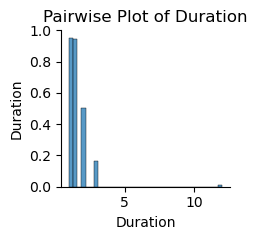

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

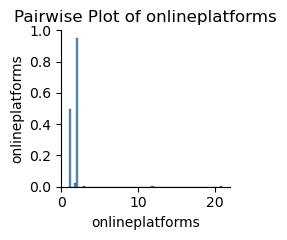

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

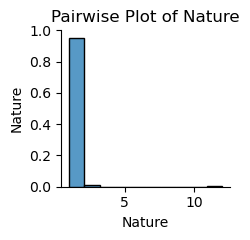

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

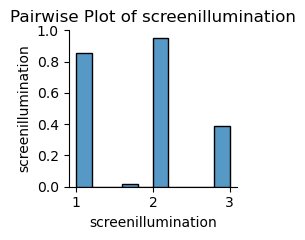

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

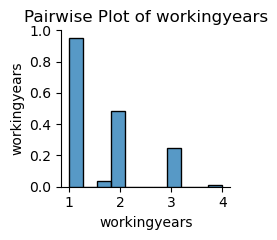

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

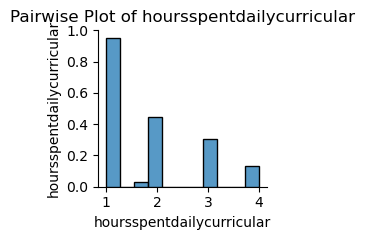

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

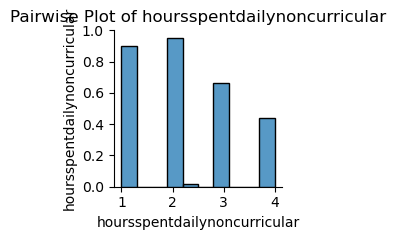

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

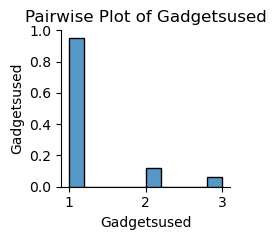

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

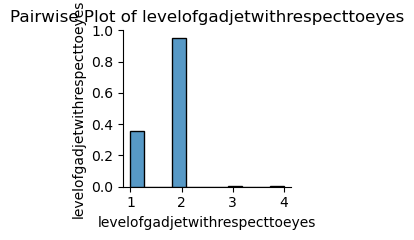

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

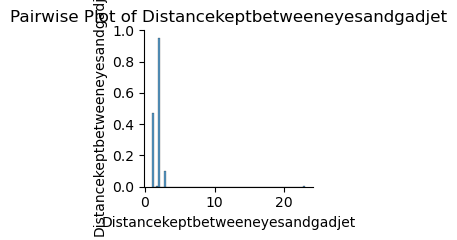

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

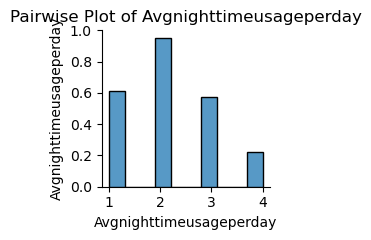

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

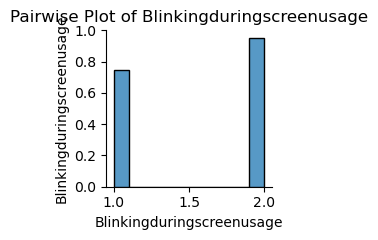

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

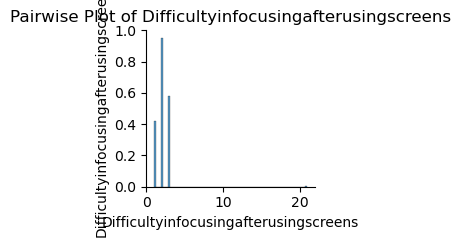

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

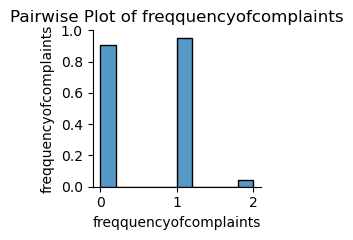

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

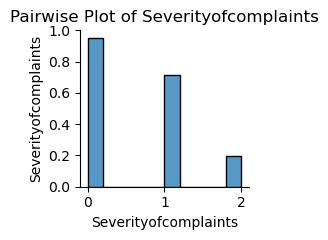

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

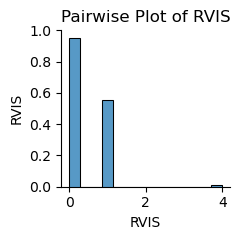

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

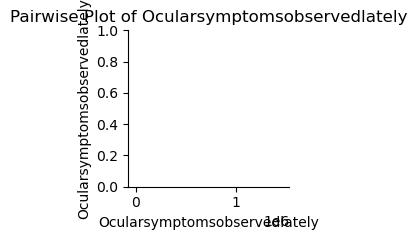

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

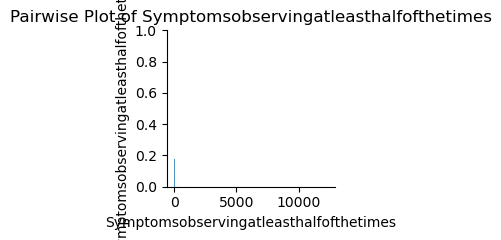

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

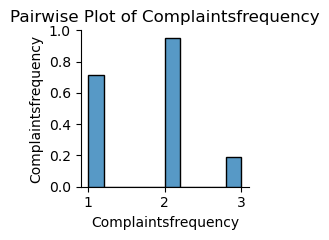

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

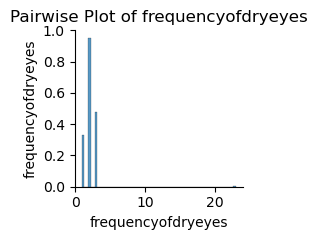

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

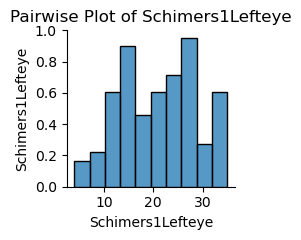

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

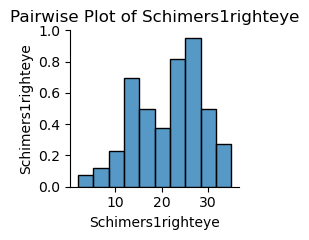

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

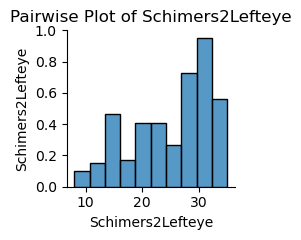

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anush\AppData\Local\Temp\ipykernel_11248\3483347571.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

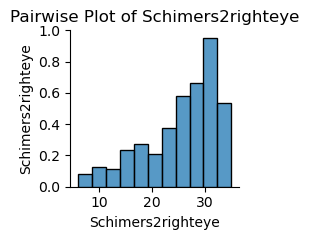

In [69]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10,8))
    sns.pairplot(df[[col]])
    plt.title(f'Pairwise Plot of {col}')
    plt.tight_layout()
    plt.show()

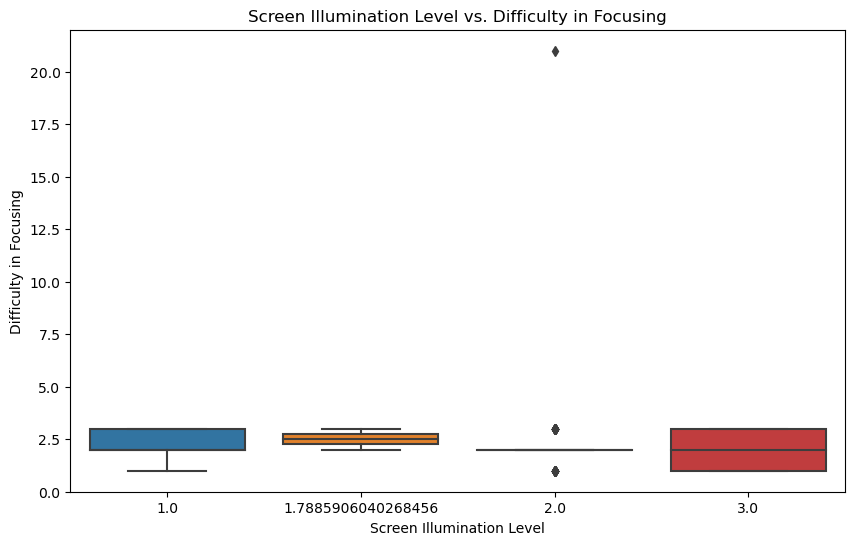

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='screenillumination', y='Difficultyinfocusingafterusingscreens', data=df)
plt.title('Screen Illumination Level vs. Difficulty in Focusing')
plt.xlabel('Screen Illumination Level')
plt.ylabel('Difficulty in Focusing')
plt.show()

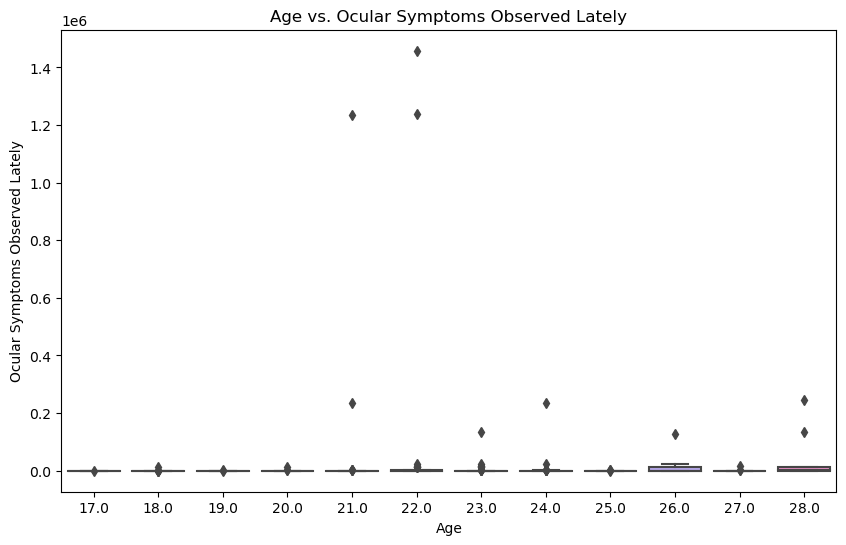

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Ocularsymptomsobservedlately', data=df)
plt.title('Age vs. Ocular Symptoms Observed Lately')
plt.xlabel('Age')
plt.ylabel('Ocular Symptoms Observed Lately')
plt.show()

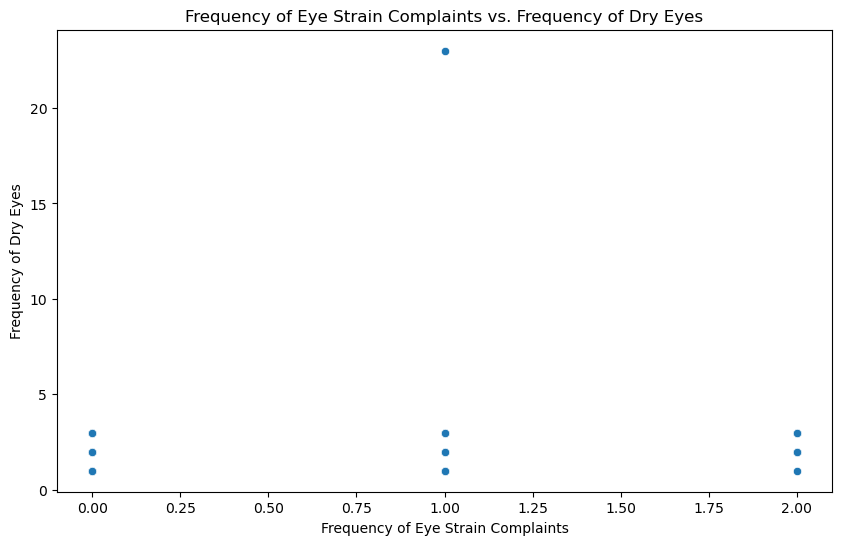

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freqquencyofcomplaints', y='frequencyofdryeyes', data=df)
plt.title('Frequency of Eye Strain Complaints vs. Frequency of Dry Eyes')
plt.xlabel('Frequency of Eye Strain Complaints')
plt.ylabel('Frequency of Dry Eyes')
plt.show()

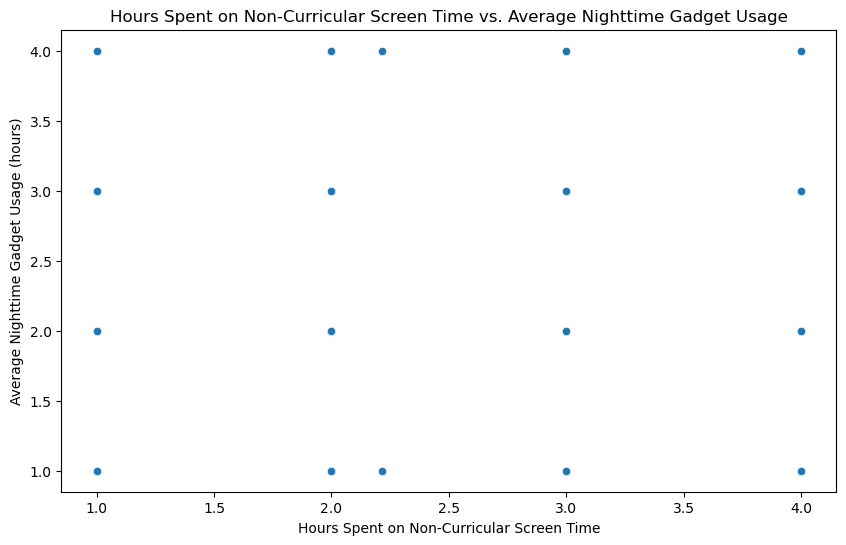

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hoursspentdailynoncurricular', y='Avgnighttimeusageperday', data=df)
plt.title('Hours Spent on Non-Curricular Screen Time vs. Average Nighttime Gadget Usage')
plt.xlabel('Hours Spent on Non-Curricular Screen Time')
plt.ylabel('Average Nighttime Gadget Usage (hours)')
plt.show()

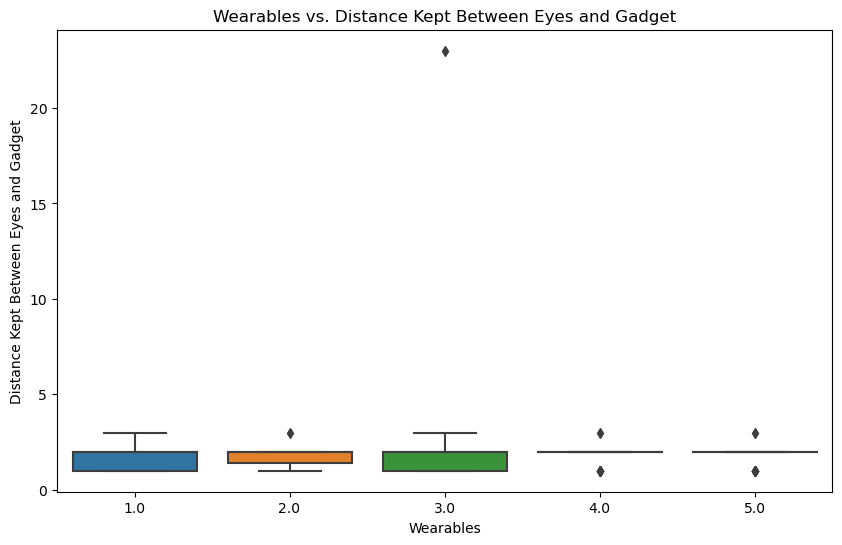

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wearables', y='Distancekeptbetweeneyesandgadjet', data=df)
plt.title('Wearables vs. Distance Kept Between Eyes and Gadget')
plt.xlabel('Wearables')
plt.ylabel('Distance Kept Between Eyes and Gadget')
plt.show()